# **CSE572: DATA MINING**
## Final project code

1.   *Abhijeet Ghildiyal*    *aghildiy@asu.edu*
2.   *Prateek Parashar*      *pparash7@asu.edu*


In [21]:
import pandas as pagedo
import numpy as norepo
import matplotlib.pyplot as plut
import seaborn as seasalt
import shap
from scipy.stats import skew
from IPython.display import display
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
!pip install optuna --quiet
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as stumo
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
!pip install scikit-posthocs --quiet
import scikit_posthocs as spoc
from scipy.stats import normaltest
import warnings
warnings.filterwarnings("ignore")
pagedo.set_option("display.max_columns", 500) 
pagedo.set_option("max_colwidth", None) 
show = print


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
training_dta = pagedo.read_csv("train.csv")
testing_dta = pagedo.read_csv("test.csv")
show("Data-Shape for Training", training_dta.shape)
show("\nData-Shape for Testing:", testing_dta.shape)

Data-Shape for Training (1200000, 21)

Data-Shape for Testing: (800000, 20)


In [23]:

show("Here is the training data")
display(training_dta.head())

show("\nHere is the testing data")
display(testing_dta.head())

Here is the training data


id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's            NaN     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's            NaN     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0           NaN                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   
1  2023-06-12 15:21:39.111551           Average            Yes   
2  2023-09-30 15:21:39.221386              Good            Yes   
3  2024-06-12 15:21:39.226954              Poor            Yes   
4  2021-12-01 15:21:39.252145              Poor            Yes   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0  
1            Monthly         House          1483.0  
2             Weekly         House           567.0  
3              Daily     Apartment           765.0  
4             Weekly         House          2022.0


Here is the testing data


id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN         19.0           NaN                 1.0   
1              NaN         14.0         372.0                 8.0   
2              NaN         16.0         819.0                 9.0   
3              1.0          3.0         770.0                 5.0   
4              NaN         14.0         755.0                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

In [24]:

training_dta.columns = training_dta.columns.str.strip().str.replace(" ", "_")
testing_dta.columns = testing_dta.columns.str.strip().str.replace(" ", "_")

In [25]:

show("Data-Info for Training:")
training_dta.info()

show("\nData-Info for Testing:")
testing_dta.info()

Data-Info for Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual_Income         1155051 non-null  float64
 4   Marital_Status        1181471 non-null  object 
 5   Number_of_Dependents  1090328 non-null  float64
 6   Education_Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health_Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy_Type           1200000 non-null  object 
 11  Previous_Claims       835971 non-null   float64
 12  Vehicle_Age           1199994 non-null  float64
 13  Credit_Score          1062118 non-null  float64
 14  Insurance_

In [26]:
training_dta["Customer_Feedback"].value_counts()

Customer_Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64

In [27]:
training_dta.drop("id", axis=1, inplace=True)
l_tes_id = testing_dta["id"].copy().to_list()
testing_dta.drop("id", axis=1, inplace=True)

In [28]:
# Convert Policy_Start_Date to to_datetime.
training_dta["Policy_Start_Date"] = pagedo.to_datetime(training_dta["Policy_Start_Date"], format="mixed")
testing_dta["Policy_Start_Date"] = pagedo.to_datetime(testing_dta["Policy_Start_Date"], format="mixed")
numerical_feats = ["Age", "Annual_Income", "Health_Score", "Credit_Score", "Vehicle_Age"]
cat_features = ["Gender", "Marital_Status", "Education_Level", "Occupation", "Location", "Policy_Type",
                "Smoking_Status", "Exercise_Frequency", "Property_Type", "Customer_Feedback", "Number_of_Dependents", "Previous_Claims", "Insurance_Duration"]
show("Data-Description Training:")
cmap = seasalt.light_palette("red", as_cmap=True)
display(training_dta.drop(columns=["Number_of_Dependents", "Previous_Claims", "Insurance_Duration",
                               "Policy_Start_Date"], axis=1).describe().T.style.background_gradient(cmap=cmap))

show("\nData-Description Testing:")
display(testing_dta.drop(columns=["Number_of_Dependents", "Previous_Claims", "Insurance_Duration",
                               "Policy_Start_Date"], axis=1).describe().T.style.background_gradient(cmap=cmap))

Data-Description Training:



Data-Description Testing:


In [29]:
def catu_convo(df, cat_features= cat_features):
    for feat in cat_features:
        if feat in df.columns:
            df[feat] = df[feat].astype("category")
        else:
            pass
catu_convo(df=training_dta)
catu_convo(df=testing_dta)

# Display information about the DataFrames
show("Data-Info Training:")
training_dta.info()

show("\nData-Info Testing:")
testing_dta.info()

Data-Info Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Age                   1181295 non-null  float64       
 1   Gender                1200000 non-null  category      
 2   Annual_Income         1155051 non-null  float64       
 3   Marital_Status        1181471 non-null  category      
 4   Number_of_Dependents  1090328 non-null  category      
 5   Education_Level       1200000 non-null  category      
 6   Occupation            841925 non-null   category      
 7   Health_Score          1125924 non-null  float64       
 8   Location              1200000 non-null  category      
 9   Policy_Type           1200000 non-null  category      
 10  Previous_Claims       835971 non-null   category      
 11  Vehicle_Age           1199994 non-null  float64       
 12  Credit_Score          

In [30]:
show("Description of Training Data :")
training_dta.describe(include=["category", "object"]).T

Description of Training Data :


count unique       top      freq
Gender                  1200000      2      Male    602571
Marital_Status          1181471      3    Single    395391
Number_of_Dependents  1090328.0    5.0       3.0  221475.0
Education_Level         1200000      4  Master's    303818
Occupation               841925      3  Employed    282750
Location                1200000      3  Suburban    401542
Policy_Type             1200000      3   Premium    401846
Previous_Claims        835971.0   10.0       0.0  305433.0
Insurance_Duration    1199999.0    9.0       9.0  137781.0
Customer_Feedback       1122176      3   Average    377905
Smoking_Status          1200000      2       Yes    601873
Exercise_Frequency      1200000      4    Weekly    306179
Property_Type           1200000      3     House    400349

In [31]:
show("\num__num Description of Testing data:")
testing_dta.describe(include=["category", "object"]).T


um__num Description of Testing data:


count unique       top      freq
Gender                  800000      2      Male    401089
Marital_Status          787664      3    Single    263705
Number_of_Dependents  726870.0    5.0       3.0  147745.0
Education_Level         800000      4  Master's    202552
Occupation              560875      3  Employed    188574
Location                800000      3  Suburban    267190
Policy_Type             800000      3   Premium    267629
Previous_Claims       557198.0   10.0       0.0  202806.0
Insurance_Duration    799998.0    9.0       9.0   92185.0
Customer_Feedback       747724      3   Average    251217
Smoking_Status          800000      2       Yes    401859
Exercise_Frequency      800000      4    Weekly    204514
Property_Type           800000      3     House    267151

## MISSING-VALUES HERE

In [32]:
# Function tocalcculate missing values, percentages, and data types
def tab_miss_val(df):
    count_mis = df.isnull().sum()
    perc_mis = 100 * count_mis / len(df)
    return pagedo.DataFrame({
        "Missing Values": count_mis,
        "Percentage (%)": perc_mis
    })

# Create tables for train and test sets_d
mis_table_train = tab_miss_val(training_dta)
mis_table_tes = tab_miss_val(testing_dta)

# Display the tables
show("Training_Dataset Missing Val:\num__num")
display(mis_table_train[mis_table_train["Missing Values"] > 0]) 
show("\num__num")

show("Testing_Dataset Missing Val:\num__num")
display(mis_table_tes[mis_table_tes["Missing Values"] > 0])

Training_Dataset Missing Val:
um__num


Missing Values  Percentage (%)
Age                            18705        1.558750
Annual_Income                  44949        3.745750
Marital_Status                 18529        1.544083
Number_of_Dependents          109672        9.139333
Occupation                    358075       29.839583
Health_Score                   74076        6.173000
Previous_Claims               364029       30.335750
Vehicle_Age                        6        0.000500
Credit_Score                  137882       11.490167
Insurance_Duration                 1        0.000083
Customer_Feedback              77824        6.485333


um__num
Testing_Dataset Missing Val:
um__num


Missing Values  Percentage (%)
Age                            12489        1.561125
Annual_Income                  29860        3.732500
Marital_Status                 12336        1.542000
Number_of_Dependents           73130        9.141250
Occupation                    239125       29.890625
Health_Score                   49449        6.181125
Previous_Claims               242802       30.350250
Vehicle_Age                        3        0.000375
Credit_Score                   91451       11.431375
Insurance_Duration                 2        0.000250
Customer_Feedback              52276        6.534500

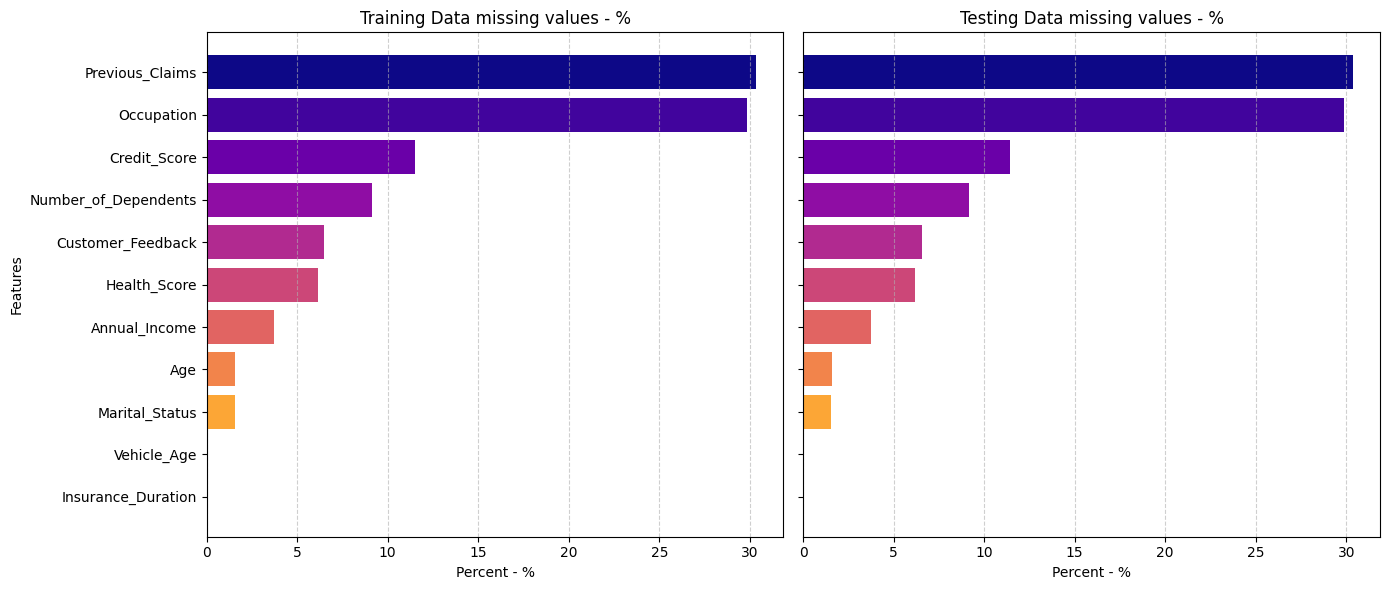

In [33]:
from matplotlib import cm
mis_train = mis_table_train[mis_table_train["Missing Values"] > 0].sort_values(by="Percentage (%)", ascending=False)
mis_tes = mis_table_tes[mis_table_tes["Missing Values"] > 0].sort_values(by="Percentage (%)", ascending=False)
# Set up the figure and subplots
fuga1, ax = plut.subplots(1, 2, figsize=(14, 6), sharey=True)

# Bar plot for train dataset
colors_training = cm.get_cmap("plasma", len(mis_train))(range(len(mis_train)))
ax[0].barh(mis_train.index, mis_train["Percentage (%)"], color=colors_training)
ax[0].set_title("Training Data missing values - %", fontsize=12)
ax[0].set_xlabel("Percent - %", fontsize=10)
ax[0].set_ylabel("Features", fontsize=10)
ax[0].grid(axis="x", linestyle="--", alpha=0.6)
ax[0].invert_yaxis()

# Bar plot for test dataset
test_colors = cm.get_cmap("plasma", len(mis_tes))(range(len(mis_tes)))
ax[1].barh(mis_tes.index, mis_tes["Percentage (%)"], color=test_colors)
ax[1].set_title("Testing Data missing values - %", fontsize=12)
ax[1].set_xlabel("Percent - %", fontsize=10)
ax[1].grid(axis="x", linestyle="--", alpha=0.6)
plut.tight_layout()
plut.show()

## DUPLICATE-VALUE CHECK FROM HERE 

In [34]:
def dup_repo_check(df, dataset_name):
    dup_count = df.duplicated().sum()
    row_tot = len(df)

    show("**" * 14)
    show(f" {dataset_name} Dup-analysis")
    show("**" * 14)

    if dup_count == 0:
        show(f"   There are no duplicates in {row_tot:,} rows")
    else:
        show(f"  {dup_count} duplicates found :  ({dup_count/row_tot:.2%})")
        show(f"    Number of rows that are effected are : {dup_count:,}/{row_tot:,}")

sets_d = {
    "Data-Training": training_dta,
    "Data-Tes": testing_dta
}

dup_sum = {}
for name_2, data in sets_d.items():
    dup_repo_check(data, name_2)
    dup_sum[name_2] = {
        "duplicates": data.duplicated().sum(),
        "row_tot": len(data)
    }
    show()

****************************
 Data-Training Dup-analysis
****************************
   There are no duplicates in 1,200,000 rows

****************************
 Data-Tes Dup-analysis
****************************
   There are no duplicates in 800,000 rows



## Checking Outlier Value

In [35]:
def outlier_repo(list_feature, df, dataset_name):
    show("**" * 16)
    show(f" {dataset_name} Checking outlier")
    show("**" * 16)
    out_info = []
    for feat in list_feature:
        Ques1 = df[feat].quantile(0.25)
        Ques3 = df[feat].quantile(0.75)
        IQR = Ques3 - Ques1

        l_bou = Ques1 - 1.5 * IQR
        u_bou = Ques3 + 1.5 * IQR

        oul = df[(df[feat] < l_bou) | (df[feat] > u_bou)][feat]
        if len(oul) == 0:
            pass
        else:
            out_info.append({
            "Feature": feat,
            "Outlier Count": len(oul),
            })
    return pagedo.DataFrame(out_info)

outlier_repo(list_feature=numerical_feats, df=training_dta, dataset_name="Training data")

********************************
 Training data Checking outlier
********************************


Feature  Outlier Count
0  Annual_Income          67132

In [36]:
outlier_repo(list_feature=numerical_feats, df=testing_dta, dataset_name="Test data")

********************************
 Test data Checking outlier
********************************


Feature  Outlier Count
0  Annual_Income          44937

In [37]:
def color(n_colors=2):
    cmap = seasalt.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = norepo.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [38]:
def cs_test(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    show(f"\num__num ChiSquare Test for Ind. : '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    ctab = pagedo.crosstab(df[cat_feature], df[target_feature])
    chii, p, doofdoof, exp = chi2_contingency(ctab)

    show(f"ChiSq Stats: {chii:.3f}")
    show(f"DOF : {doofdoof}")
    show(f"PValue: {p:.6f}")

    if p < 0.05:
        show("   When Pvalue is less than 0.05 , we reject the null hypothesis (H₀): ")
        show(f"-> There is a significant association between '{cat_feature}' and '{target_feature}'.")
    else:
        show(" When Pvalue is greater than or equal to 0.05 , we fail to reject Ho:")
        show(f"→ No significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show exp frequencies
    if show_expected:
        show("\num__num Frequencies Expected :")
        show(pagedo.DataFrame(exp, index=ctab.index, columns=ctab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = "coolwarm"
        residuals = (ctab - exp) / norepo.sqrt(exp)
        show("\num__num Reisduals ( Standardization ):")
        show(round(residuals, 2))

        # Heatmap of residuals
        plut.figure(figsize=(6, 4))
        seasalt.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plut.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", pad=15, weight = "bold")
        plut.ylabel(cat_feature)
        plut.xlabel(target_feature)
        plut.tight_layout()
        plut.show()
    else:
        pass

def calc_shapiro(cat_feature, num_feature, df, plot_result=False):


    show(f"  SHAPIRO-WILK Normality Test for {num_feature} across {cat_feature} grpo")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        num__num = len(data)

        if num__num < 3:
            show(f" Group {group} has very less values ({num__num}) to do Shapiro-Wilk test.")
        elif num__num > 5000:
            show(f" Group {group} has {num__num} samples. SHAPIRO-WILK may not be reliable for num__num > 5000.")
        else:
            strut, p = shapiro(data)
            show(f"Group: {group}")
            show(f"  Shapiro-Wilk statistic: {strut:.3f}")
            show(f"  p-value: {p}")
            if p > 0.05:
                show(f" Group '{group}'  follow a normal distribution.\nnum__num")
            else:
                show(f"  Group '{group}' does not follow a normal distribution.\nnum__num")

            if plot_result:
                probplot(data, dist="norm", plot=plut)
                plut.title(f"QQ Plot - {group}")
                plut.show()
            else:
                pass

def calc_levene(dataframe, categorical_feature, num_feature, center="mean"):

    show(f" Levene’s test: {num_feature} ~ {categorical_feature}")
    grpo = dataframe[categorical_feature].unique()
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in grpo]
    strut, p = levene(*data_groups, center=center)

    show(f"Levene statistic: {strut:.3f}")
    show(f"p-value: {p}")
    if p > 0.05:
        show("  Equal variance across groups  .")
    else:
        show(" Different variance across groups .")

def cal_manwhi(dataframe, categorical_feature, num_feature):


    grpo = dataframe[categorical_feature].dropna().unique()

    if len(grpo) != 2:
        show(f"Mann-Whitney U test needs 2 groups, but found {len(grpo)}.")
        return

    show(f" Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\num__num")
    show("H₀: The distributions are equal.")
    show("H₁: The distributions are different.\num__num")

    grp_1 = dataframe[dataframe[categorical_feature] == grpo[0]][num_feature].dropna()
    grp_2 = dataframe[dataframe[categorical_feature] == grpo[1]][num_feature].dropna()

    strut, p = mannwhitneyu(grp_1, grp_2, alternative="two-sided")

    show(f"U statistic : {strut}")
    show(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        show("\nnum__num  Result: Significant difference between the two groups (Rejecting H₀).")
        median1 = grp_1.median()
        median2 = grp_2.median()
        if median1 > median2:
            show(f"  Group '{grpo[0]}' has a higher median '{num_feature}' than Group '{grpo[1]}'.")
        elif median1 < median2:
            show(f"  Group '{grpo[1]}' has a higher median '{num_feature}' than Group '{grpo[0]}'.")
        else:
            show(" The medians are equal, but distributions may still differ.")
    else:
        show("\nnum__num Result: No statistically significant difference between the two groups (Fails to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):


    # Extract unique grpo
    grpo = data[categorical_feature].dropna().unique()

    if len(grpo) > 2:
        show(f" Error: Independent T-Test requires 2 grpo.")
        return
    else:
        show(f" Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == grpo[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == grpo[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        #calcculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = norepo.sqrt(((nx1 - 1)*norepo.var(x1, ddof=1) + (nx2 - 1)*norepo.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (norepo.mean(x1) - norepo.mean(x2)) / pooled_std

        # Output
        show(f"\num__num T-Test between group'{grpo[0]}' and group '{grpo[1]}':")
        show(f"t-statistic: {t_stat:.3f}")
        show(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            show("\num__num  Significant difference found (p < 0.05)")
            show(f"\num__num Cohen's d: {cohens_d:.3f}")
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            show(f" Effect size interpretation: {size} effect")
        else:
            show("\num__num No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):


    # Extract unique grpo
    grpo = df[categorical_feature].dropna().unique()

    if len(grpo) < 3:
        show(f" Error: ANOVA requires 3 or more grpo.")
        return
    else:
        show(f"\num__num ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        show("\num__num ANOVA Table:")
        show(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            show("\num__num  Significant difference found (p < 0.05)")
            show(" Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            show(tukey.summary())
        else:
            show("\num__num No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):


    df_clean = df[[categorical_feature, numeric_feature]].dropna()

    # Extract values
    grpo = df_clean[categorical_feature].dropna().unique()
    if len(grpo) < 3:
        show(f" Error: Kruskal-Wallis H-test requires 3 or more grpo.")
        return
    else:
        show(f"\num__num Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df_clean[df_clean[categorical_feature] == g][numeric_feature].dropna() for g in grpo]

        # Perform kruskal
        strut, p = kruskal(*data_groups)

        show(f"Kruskal-Wallis H-statistic: {strut:.3f}")
        show(f"p-value: {p}")

        if p < 0.05:
            show(" Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = spoc.posthoc_dunn(df_clean, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            show(dunn_result)
        else:
            show("\num__num No significant difference found (p >= 0.05)")

def calc_Anderson(df, numerical_col, group_col):


    grpo = df[group_col].dropna().unique()

    show(f" Checking normality of '{numerical_col}' across grpo of '{group_col}' using Anderson-Darling Test:\nnum__num")
    show("  H₀: The data follows a normal distribution.")
    show("  If test statistic > critical value →  Reject H₀ → Not normally distributed.\nnum__num")

    for group in grpo:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")

        show(f"Group = {group}")
        show(f"  - Sample size: {len(data)}")
        show(f"  - Test statistic: {result.statistic:.4f}")

        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = " Reject H₀ → Not normal" if result.statistic > cv else "  Fail to reject H₀ → Possibly normal"
            show(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        show()


def calc_normaltest(cat_feature, num_feature, df):


    show(f" D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' grpo\nnum__num")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        num__num = len(data)

        show(f" Group: {group} (num__num = {num__num})")

        if num__num < 8:
            show(f" Too few observations (< 8) to perform the test.\nnum__num")
            continue

        strut, p = normaltest(data)

        show(f"  Statistic : {strut:.3f}")
        show(f"  p-value   : {p:.5f}")

        if p > 0.05:
            show(f"  Interpretation: Data appears to follow a normal distribution.\nnum__num")
        else:
            show(f"  : Interpretation: Data does not appear to follow a normal distribution.\nnum__num")

##  Premium_Amount Distribution

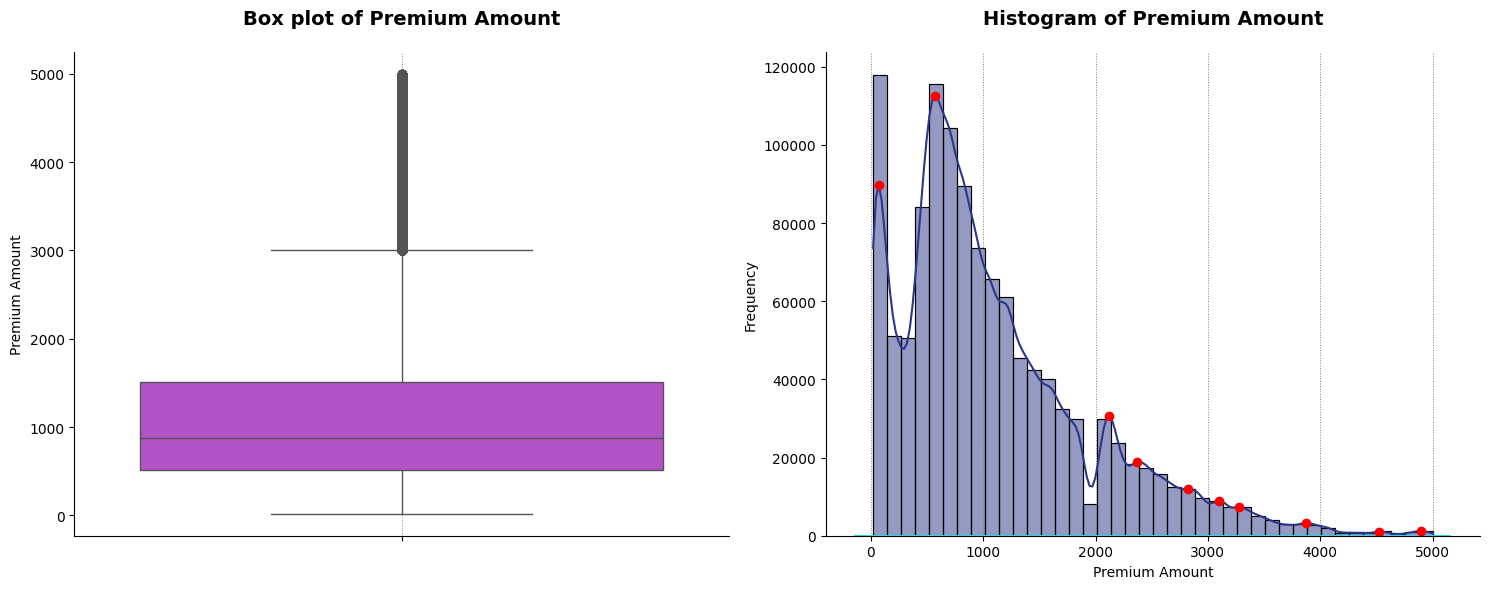

In [39]:
from scipy.signal import find_peaks
fuga1, ax = plut.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

seasalt.boxplot(data=training_dta, y = "Premium_Amount", ax=ax[0], color="#C13EDB")
ax[0].set_title(f"Box plot of Premium Amount", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("Premium Amount")
seasalt.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

seasalt.histplot(data=training_dta, x = "Premium_Amount", ax=ax[1], color="#2D3688", kde=True, bins=40)
ax[1].set_title(f"Histogram of Premium Amount", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("Premium Amount")
ax[1].set_ylabel("Frequency")
ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
seasalt.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = seasalt.kdeplot(training_dta["Premium_Amount"], ax=ax[1], color="#3ADBEC").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plut.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  

plut.tight_layout()
plut.show()

## Numerical Feature Distributions

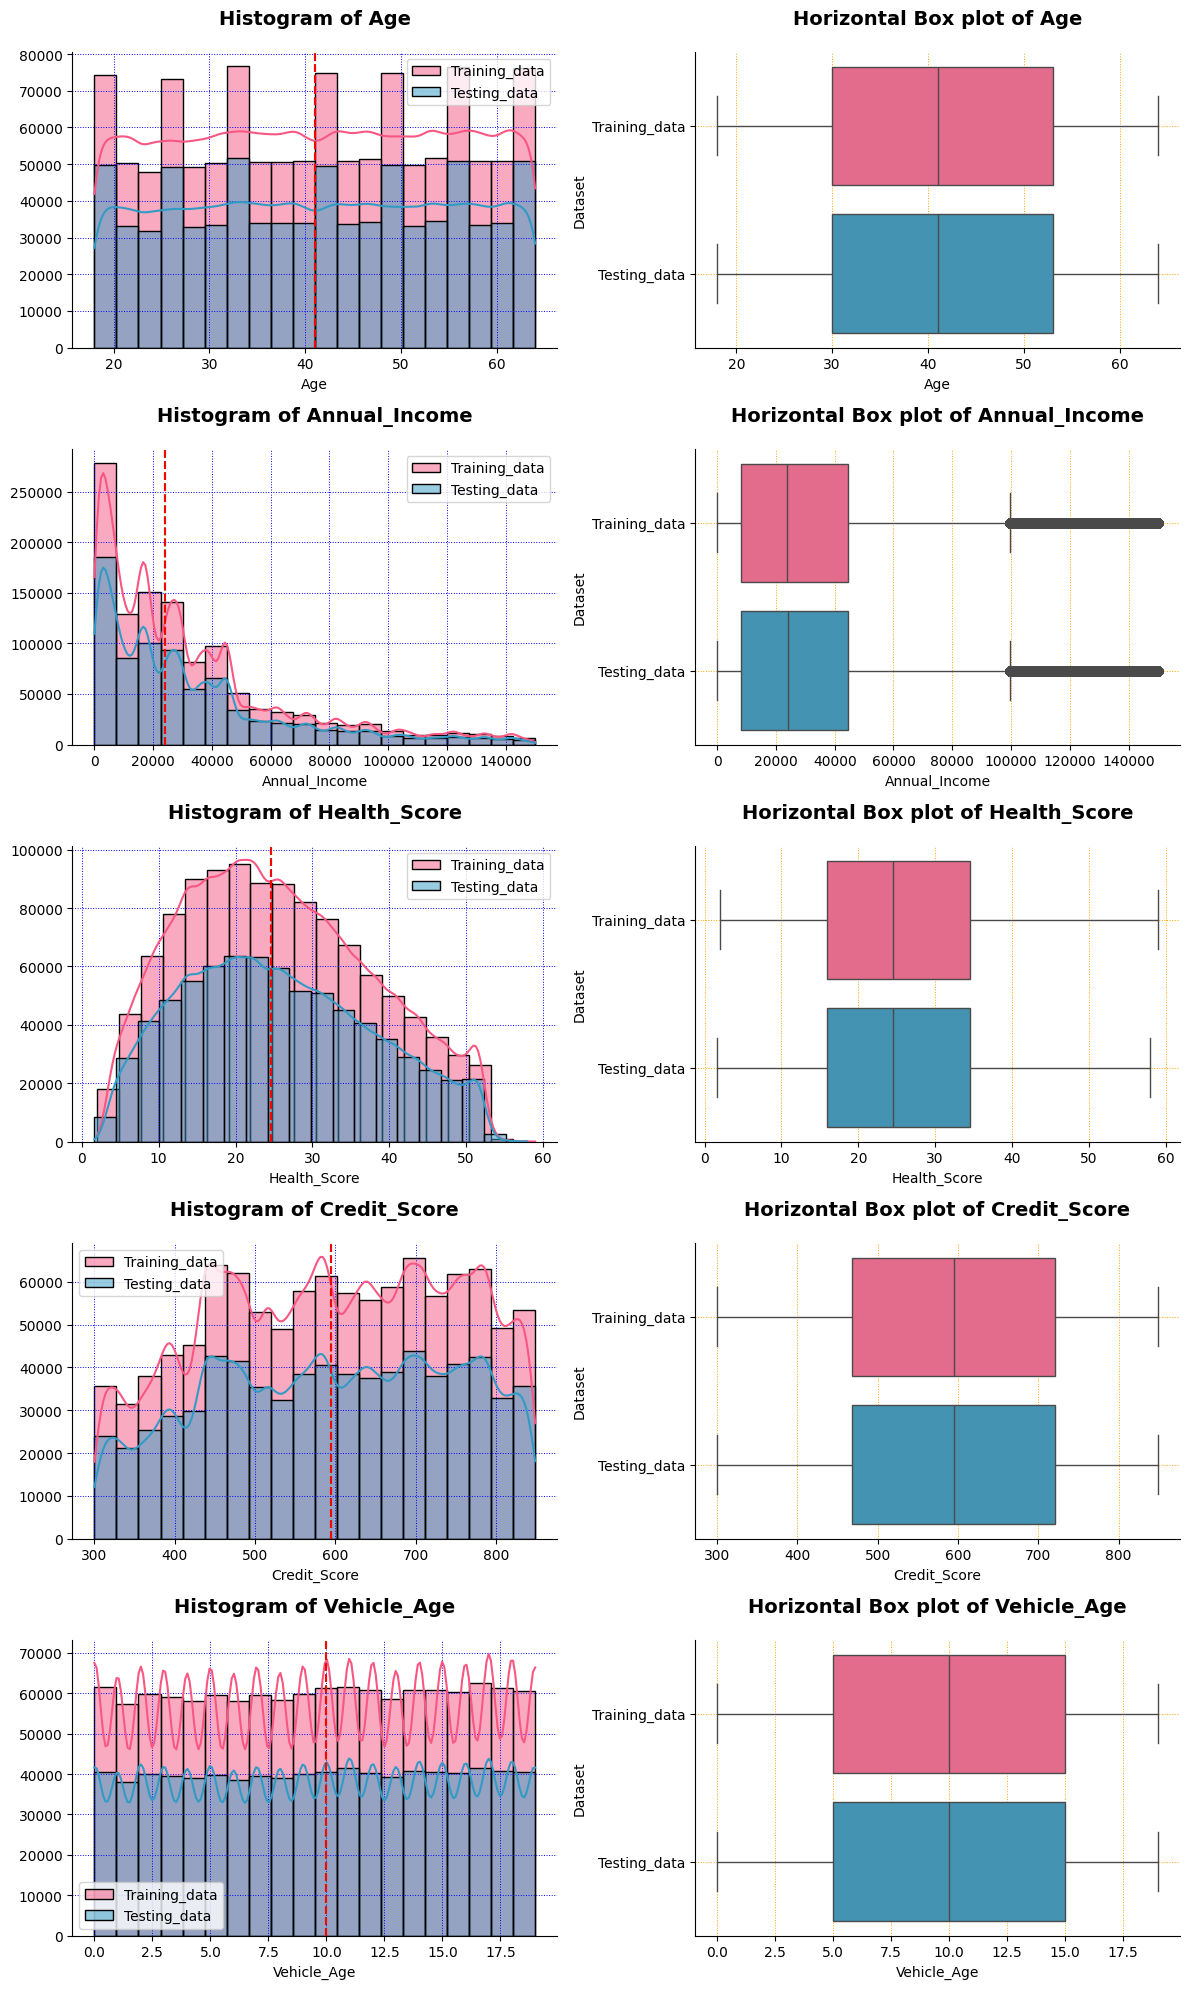

In [40]:
def pl_n_features(training_dta, testing_dta, numerical_feats):
    colors = color()
    num__num = len(numerical_feats)

    fuga1, ax = plut.subplots(num__num, 2, figsize=(12, num__num * 4))
    ax = norepo.array(ax).reshape(num__num, 2)

    for ios, feat in enumerate(numerical_feats):
        seasalt.histplot(data=training_dta[feat], color=colors[0], bins=20, kde=True, ax=ax[ios, 0], label="Training_data")
        seasalt.histplot(data=testing_dta[feat], color=colors[1], bins=20, kde=True, ax=ax[ios, 0], label="Testing_data")
        ax[ios, 0].set_title(f"Histogram of {feat}", fontsize=14, pad=20, weight="bold")
        ax[ios, 0].legend()
        ax[ios, 0].set_ylabel("")
        ax[ios, 0].grid(color="blue", linestyle=":", linewidth=0.7)
        ax[ios, 0].axvline(training_dta[feat].median(), color="green", linestyle="--", label="Median_Training")
        ax[ios, 0].axvline(testing_dta[feat].median(), color="red", linestyle="--", label="Median_Testing")
        seasalt.despine(left=False, bottom=False, ax=ax[ios, 0])

        df_plot = pagedo.concat([
            pagedo.DataFrame({"Dataset": "Training_data", feat: training_dta[feat]}),
            pagedo.DataFrame({"Dataset": "Testing_data", feat: testing_dta[feat]})
        ]).reset_index(drop=True)

        seasalt.boxplot(
            data=df_plot,
            x=feat,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=ax[ios, 1]
        )
        ax[ios, 1].set_title(f"Horizontal Box plot of {feat}", fontsize=14, pad=20, weight="bold")
        ax[ios, 1].grid(color="orange", linestyle=":", linewidth=0.7)
        seasalt.despine(left=False, bottom=False, ax=ax[ios, 1])

    plut.tight_layout()
    plut.show()

pl_n_features(training_dta = training_dta, testing_dta = testing_dta, numerical_feats=numerical_feats)

In [41]:
def check_skewness(data, dataset_name, numerical_features = numerical_feats, highlight=True, sort=True):
    sk_dict = {}
    sk_feat = []
    for feat in numerical_features:
        if feat == "Premium_Amount" and dataset_name == "Test data":
            pass 
        else:
            skew = data[feat].skew(skipna=True)
            sk_dict[feat] = skew

    skew_df = pagedo.DataFrame.from_dict(sk_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass

    show(f"\nnum__num Skewness for {dataset_name}:")
    show("*"*70)
    show(f"{'Feature':<25} | {'Skewness':<10} | {'Remark'}")
    show("*"*70)
    for feat, row in skew_df.iterrows():
        skew = row["Skewness"]
        sk_ab = abs(skew)
        if sk_ab > 1:
            title = "Highly skewed"
            color = "\033[91m"
        elif sk_ab > 0.5:
            title = "Moderately skewed"
            color = "\033[93m"
        else:
            title = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            show(f"{color}{feat:<25} | {skew:>+9.4f} | {title}{endc}")
            sk_feat.append(feat)
        else:
            show(f"{feat:<25} | {skew:>+9.4f} | {title}")
    show("-"*70)
    return sk_feat, skew_df

sk_fea_tra, sk_d_tra = check_skewness(training_dta, "Train_data")
sk_fea_tes, sk_d_tes = check_skewness(testing_dta, "Test_data")


num__num Skewness for Train_data:
**********************************************************************
Feature                   | Skewness   | Remark
**********************************************************************
Annual_Income             |   +1.4704 | Highly skewed
Health_Score              |   +0.2822 | Approximately symmetric
Credit_Score              |   -0.1136 | Approximately symmetric
Vehicle_Age               |   -0.0204 | Approximately symmetric
Age                       |   -0.0125 | Approximately symmetric
----------------------------------------------------------------------

num__num Skewness for Test_data:
**********************************************************************
Feature                   | Skewness   | Remark
**********************************************************************
Annual_Income             |   +1.4645 | Highly skewed
Health_Score              |   +0.2827 | Approximately symmetric
Credit_Score              |   -0.1139 | Approximatel

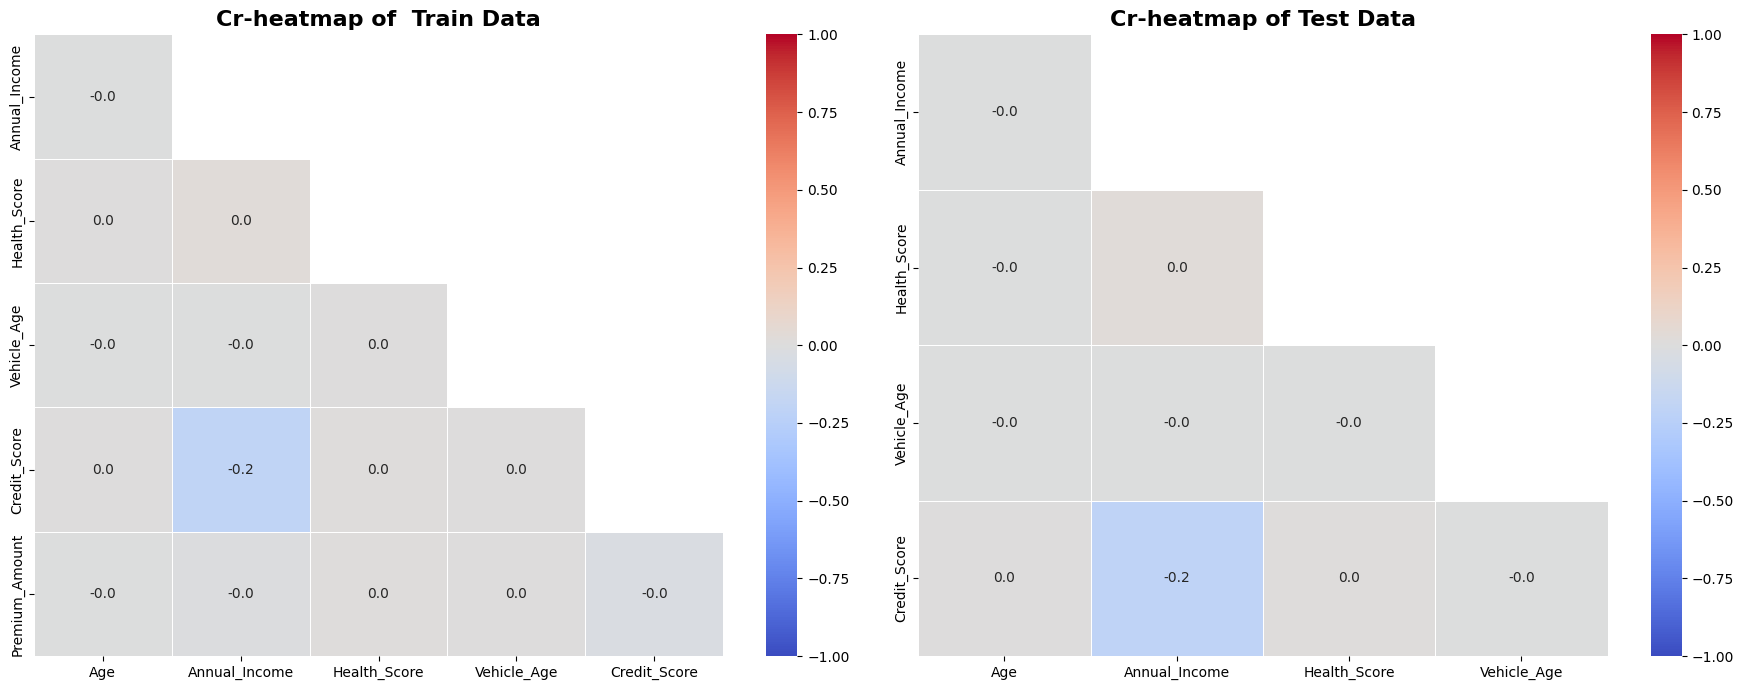

In [42]:
def pl_corr(training_dta, testing_dta, train_name="Train Data", test_name="Test Data"):
    ctrai = training_dta.corr(numeric_only=True)
    ctes = testing_dta.corr(numeric_only=True)

    mk_tra = norepo.triu(norepo.ones_like(ctrai, dtype=bool))
    ad_mk_tra = mk_tra[1:, :-1]
    ad_cereal_cr_trai = ctrai.iloc[1:, :-1]

    mk_tes = norepo.triu(norepo.ones_like(ctes, dtype=bool))
    ad_mk_tes = mk_tes[1:, :-1]
    ad_cereal_cr_tes = ctes.iloc[1:, :-1]

    cmap = "coolwarm"
    fuga1, ax = plut.subplots(1, 2, figsize=(18, 7))

    seasalt.heatmap(data=ad_cereal_cr_trai, mask=ad_mk_tra,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Cr-heatmap of  {train_name}", fontsize=16, weight="bold")

    seasalt.heatmap(data=ad_cereal_cr_tes, mask=ad_mk_tes,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Cr-heatmap of {test_name}", fontsize=16, weight="bold")

    plut.tight_layout()
    plut.show()

pl_corr(training_dta=training_dta, testing_dta=testing_dta)

## Categorical Feature Distributions

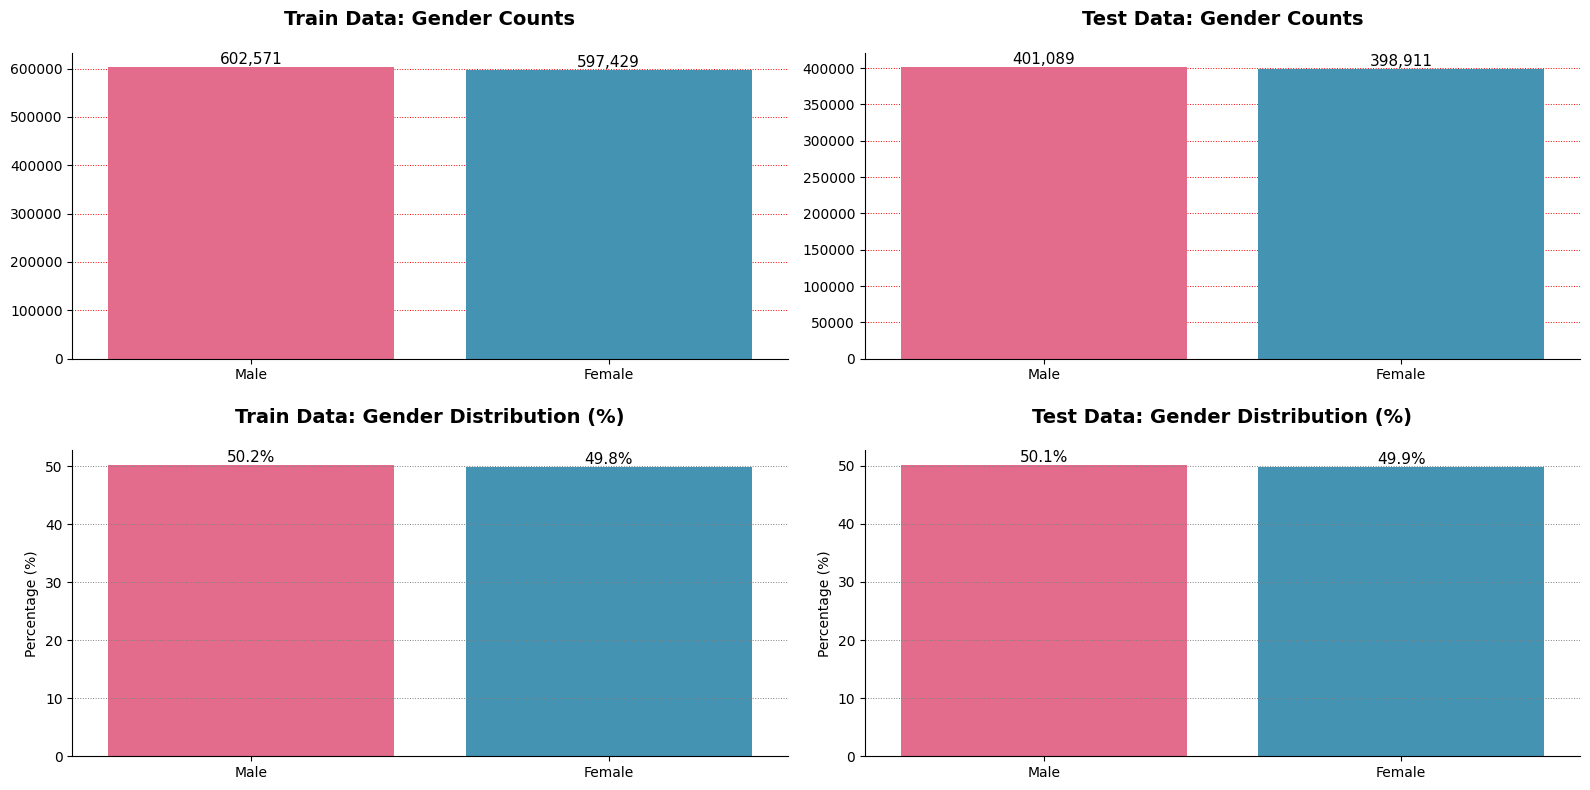

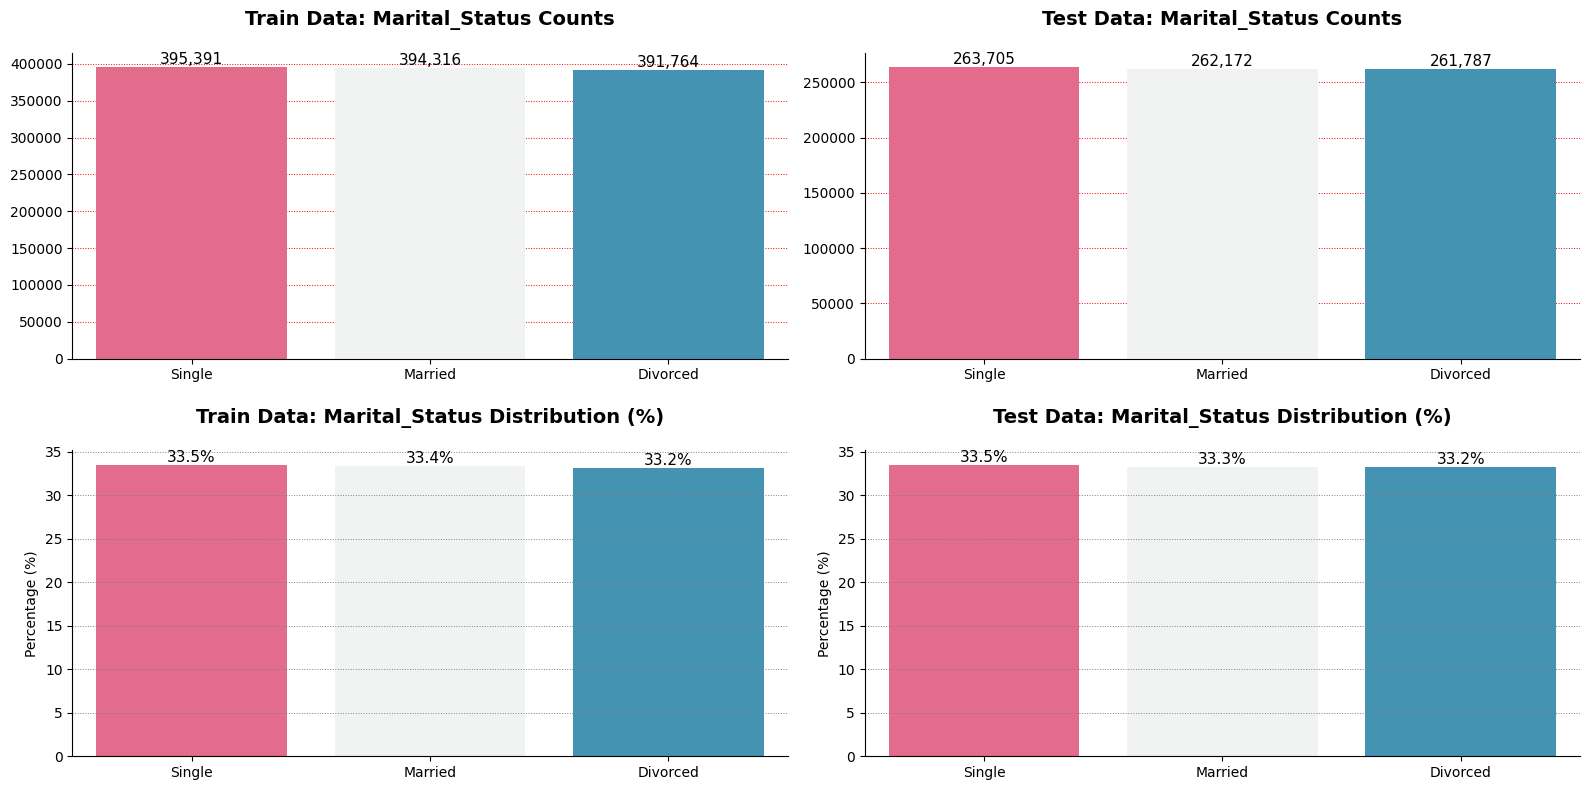

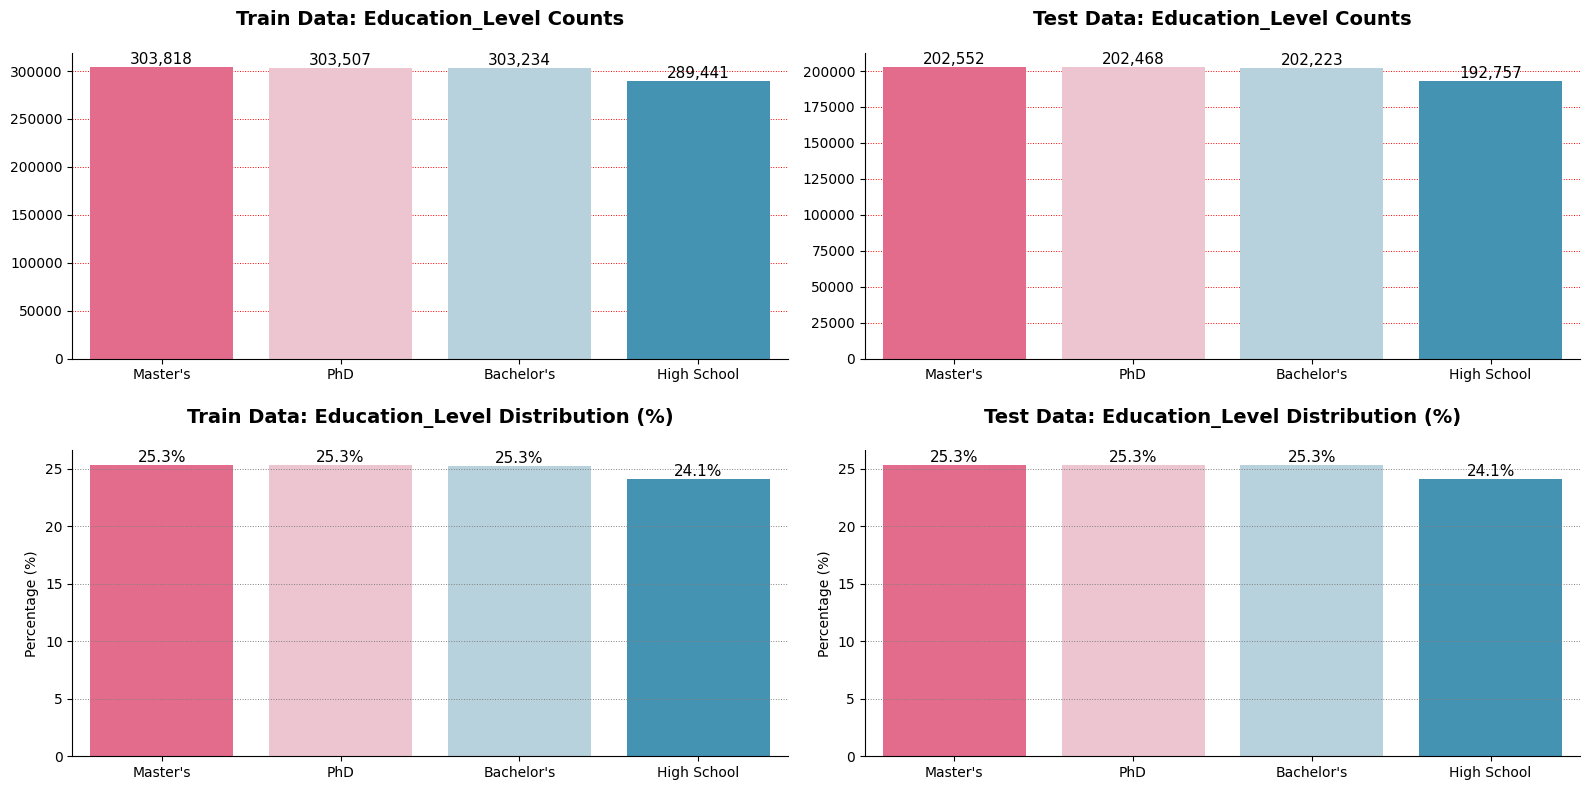

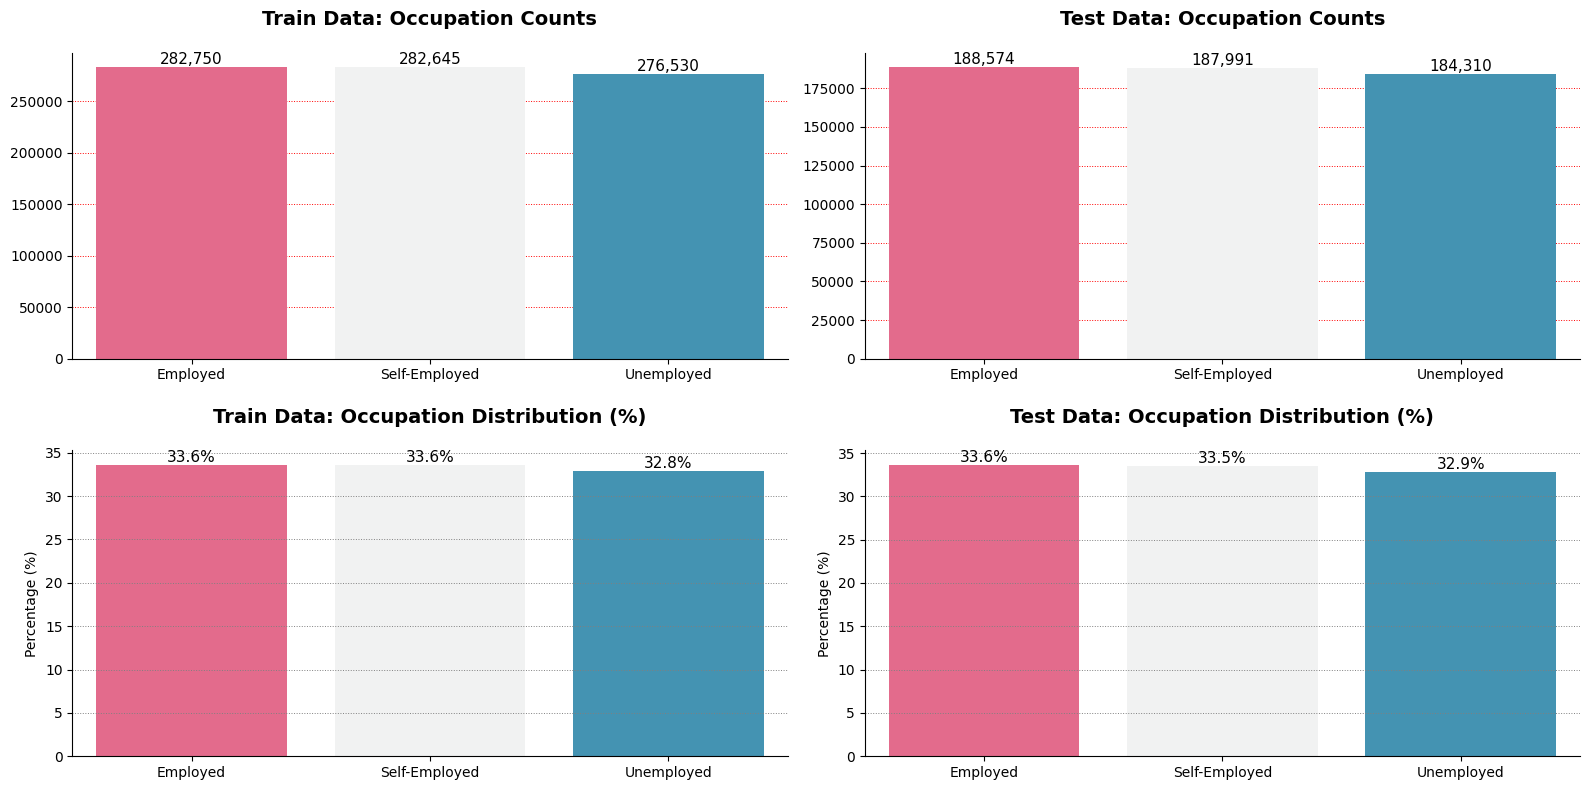

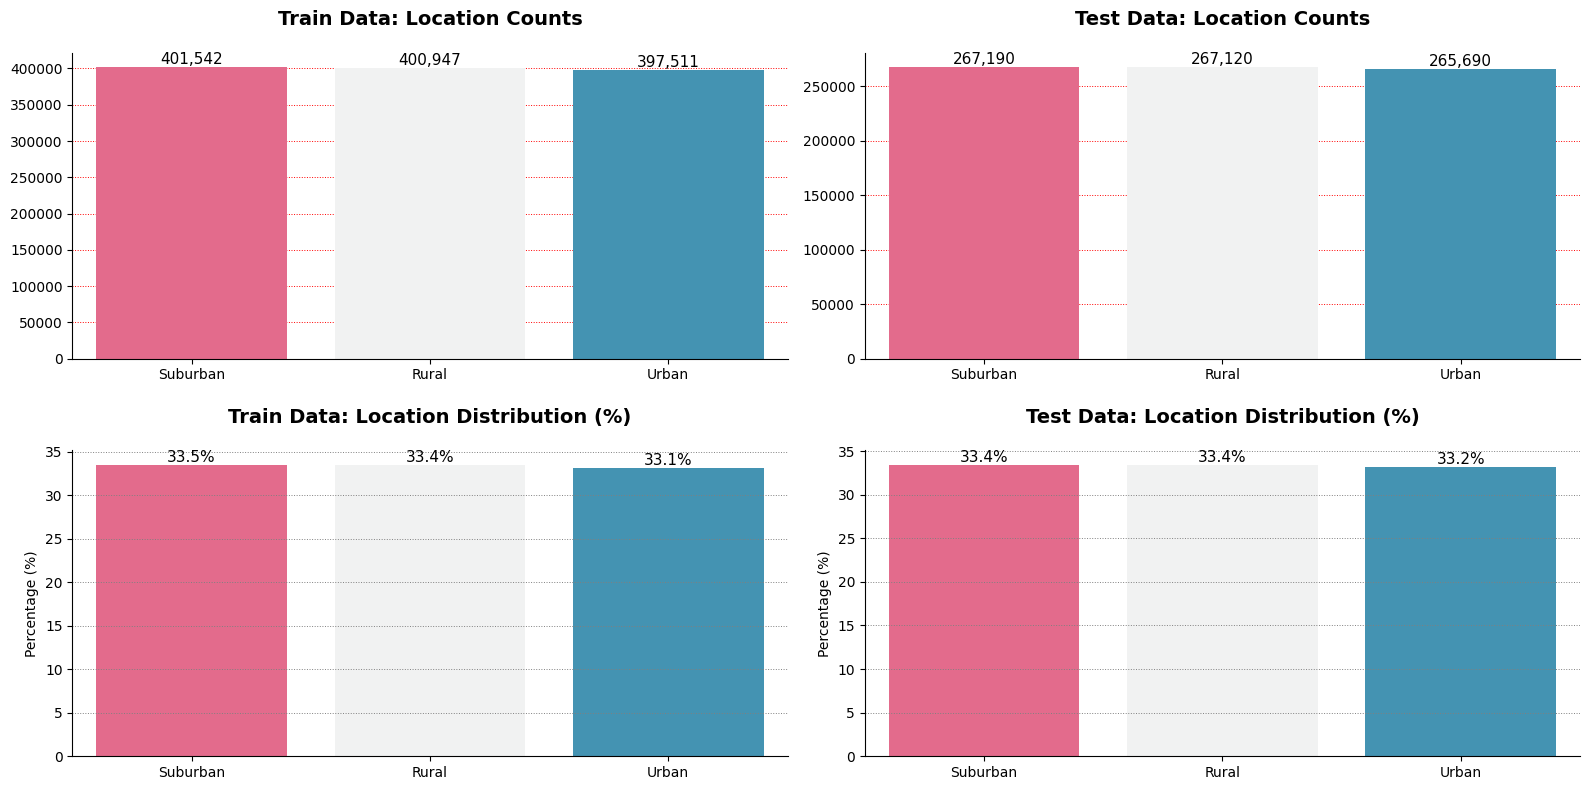

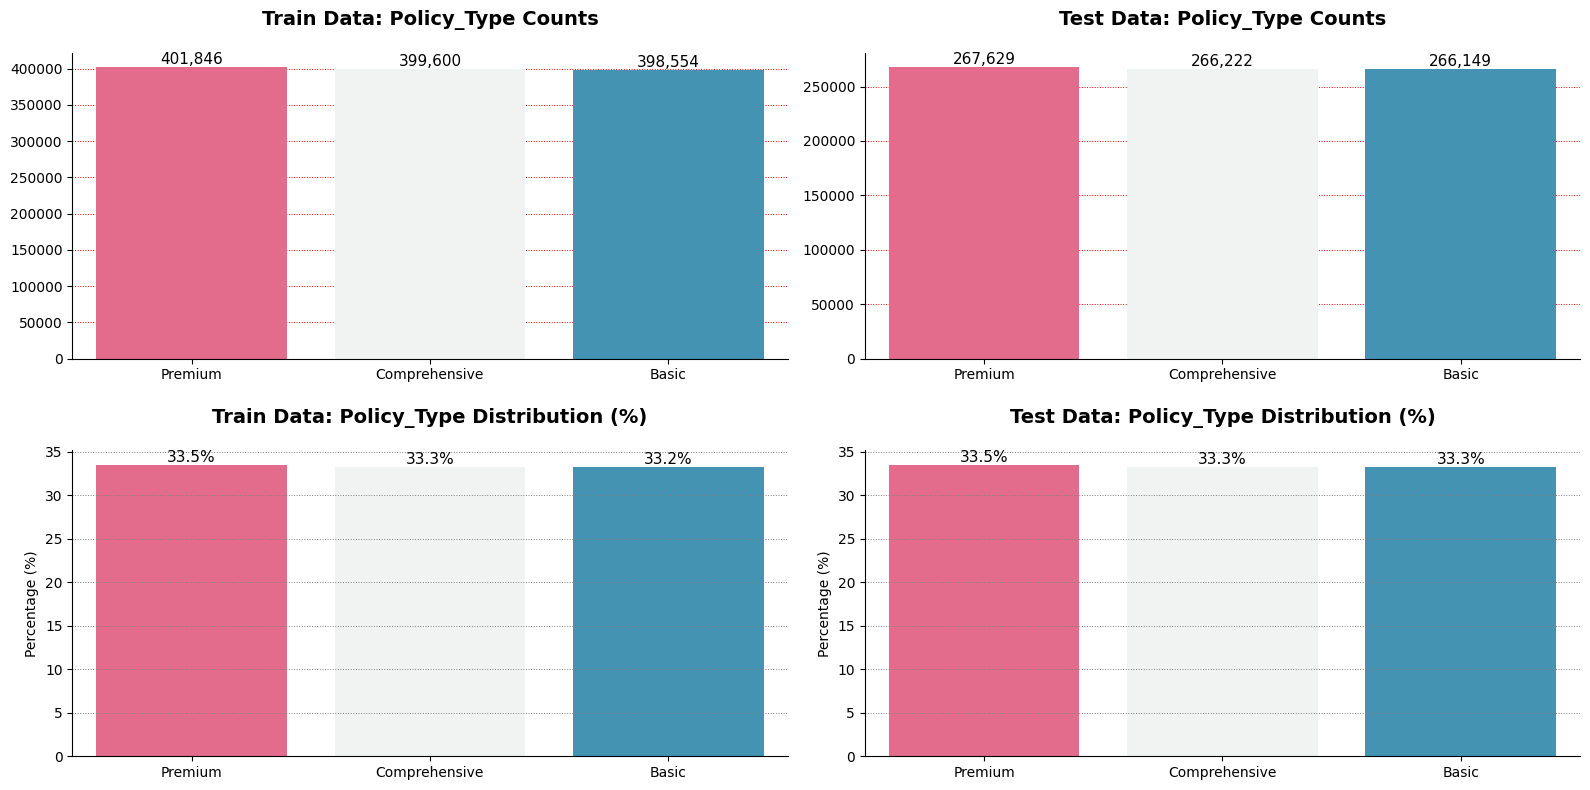

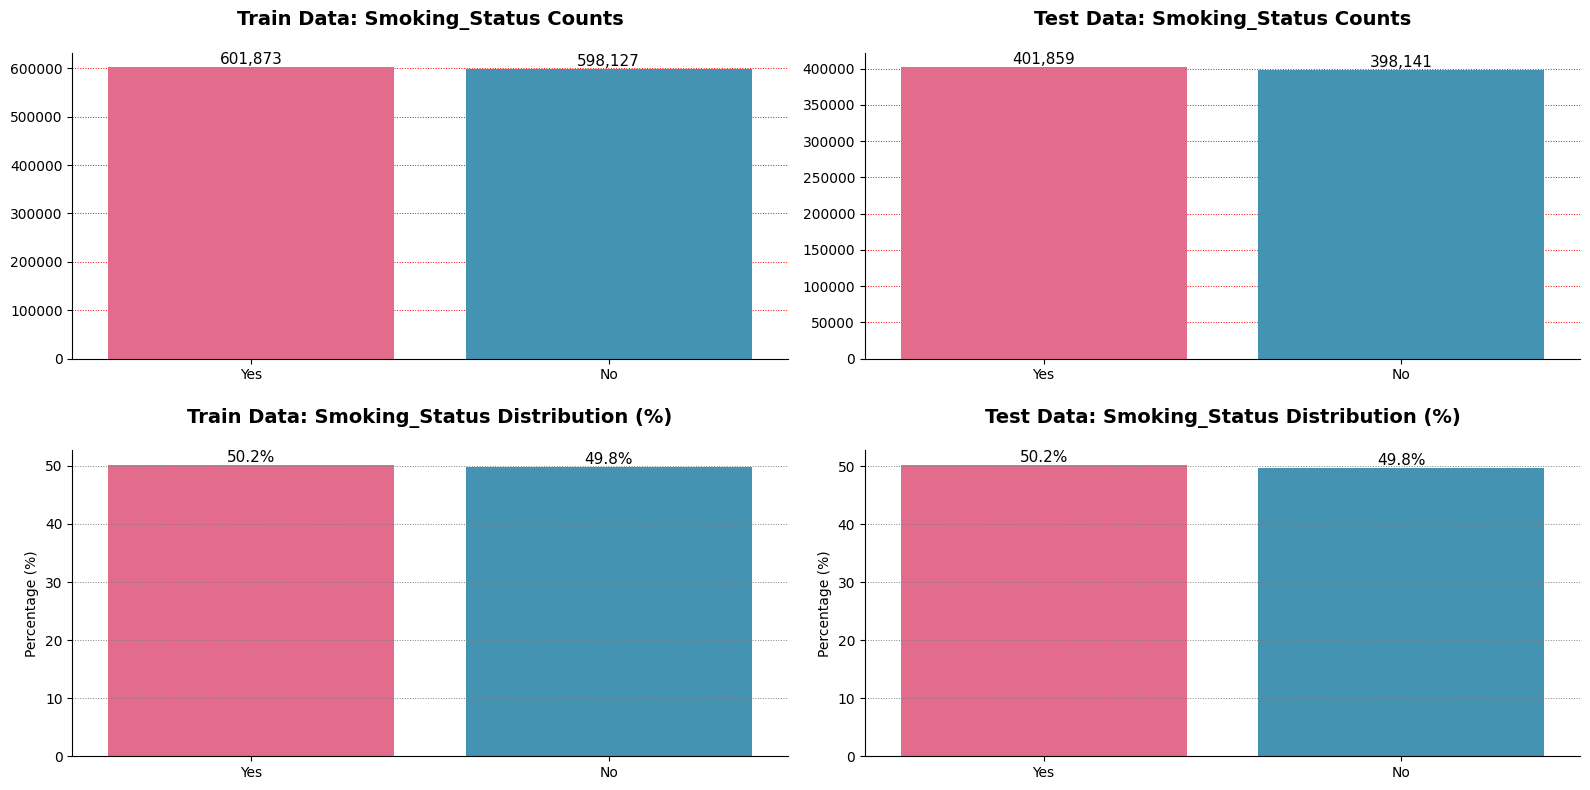

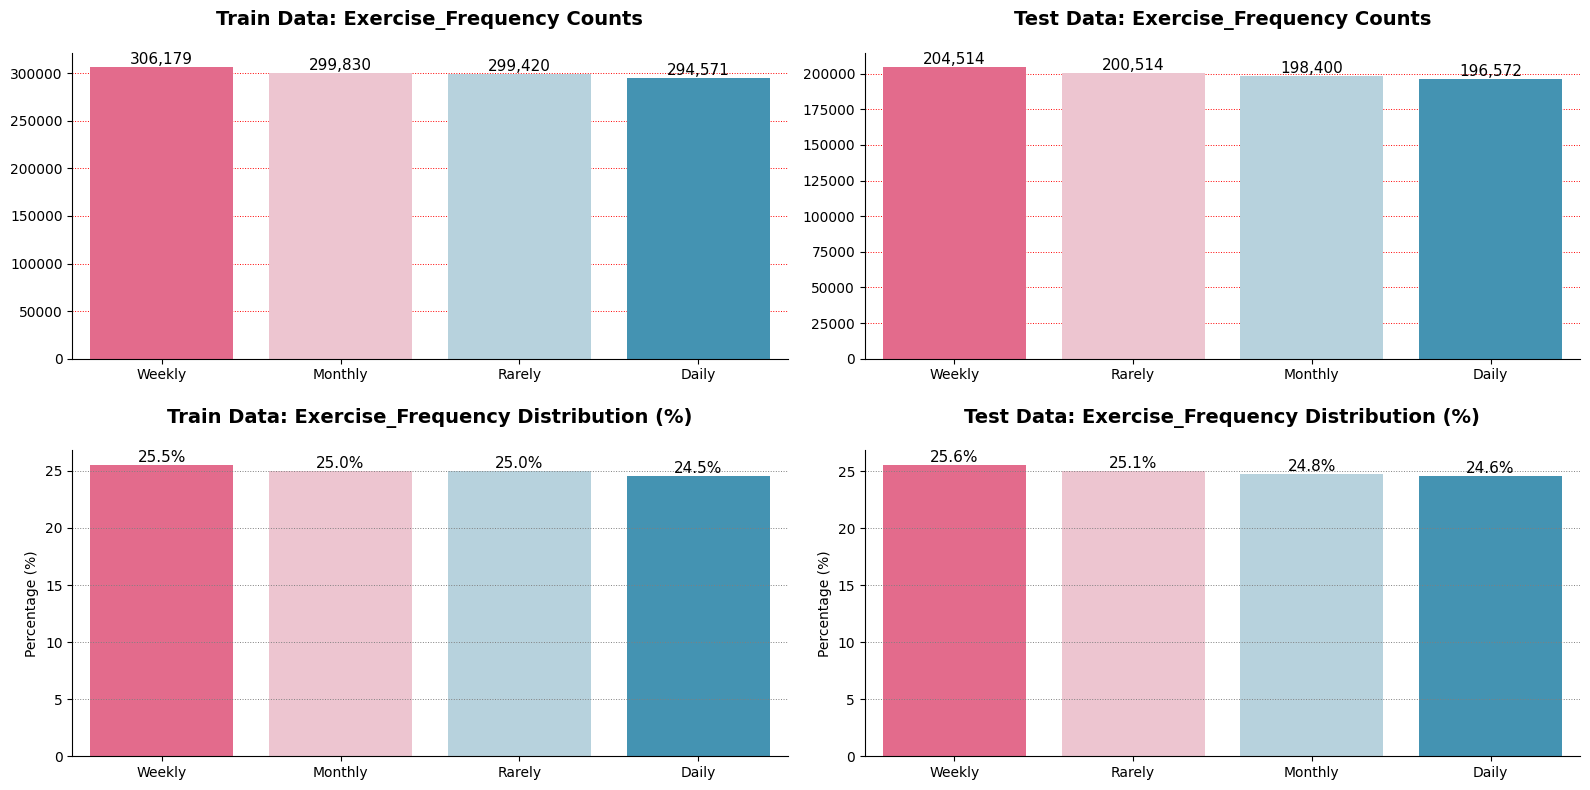

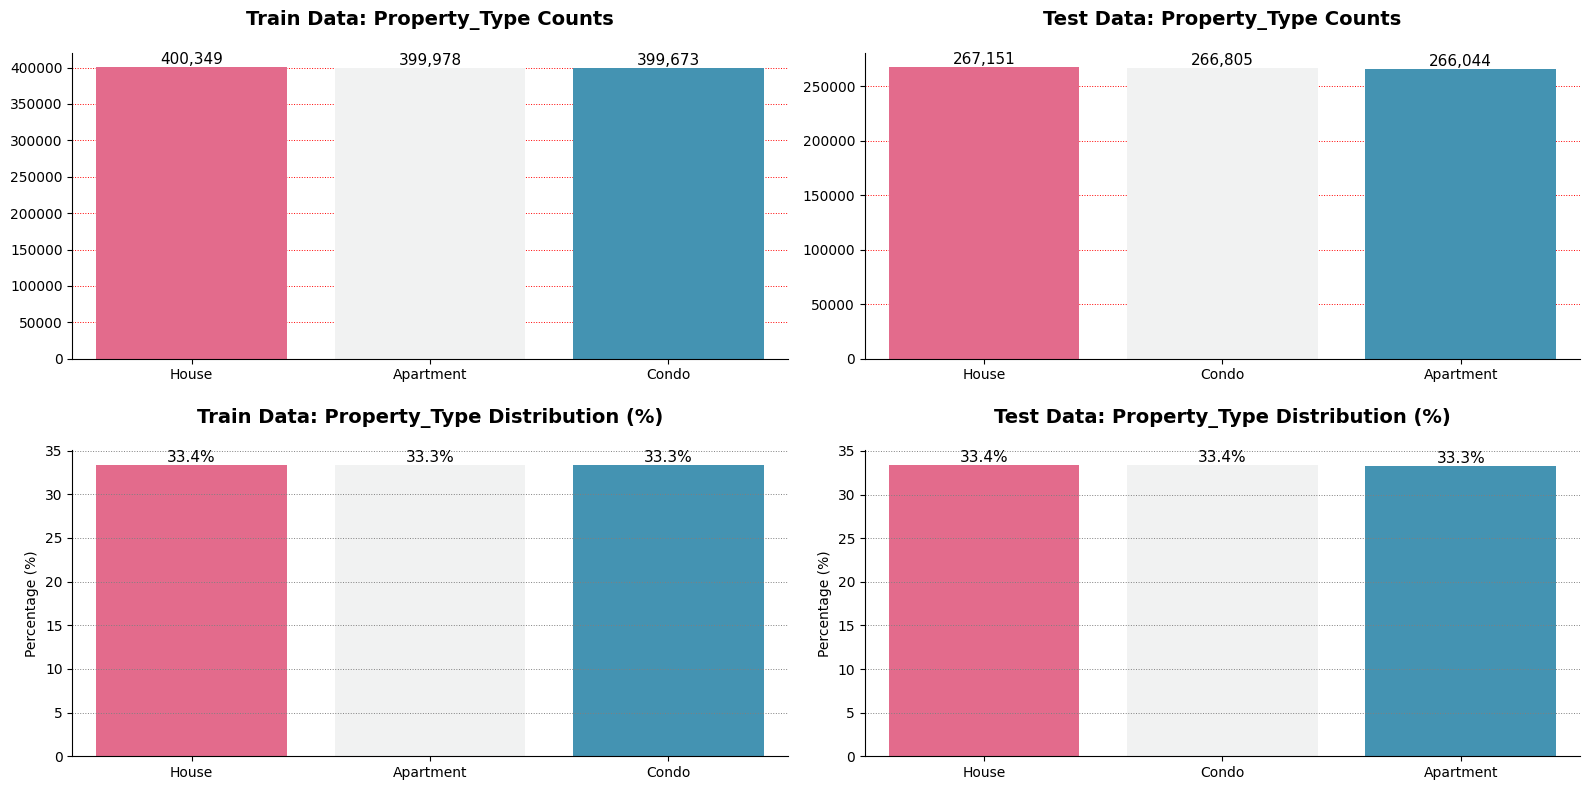

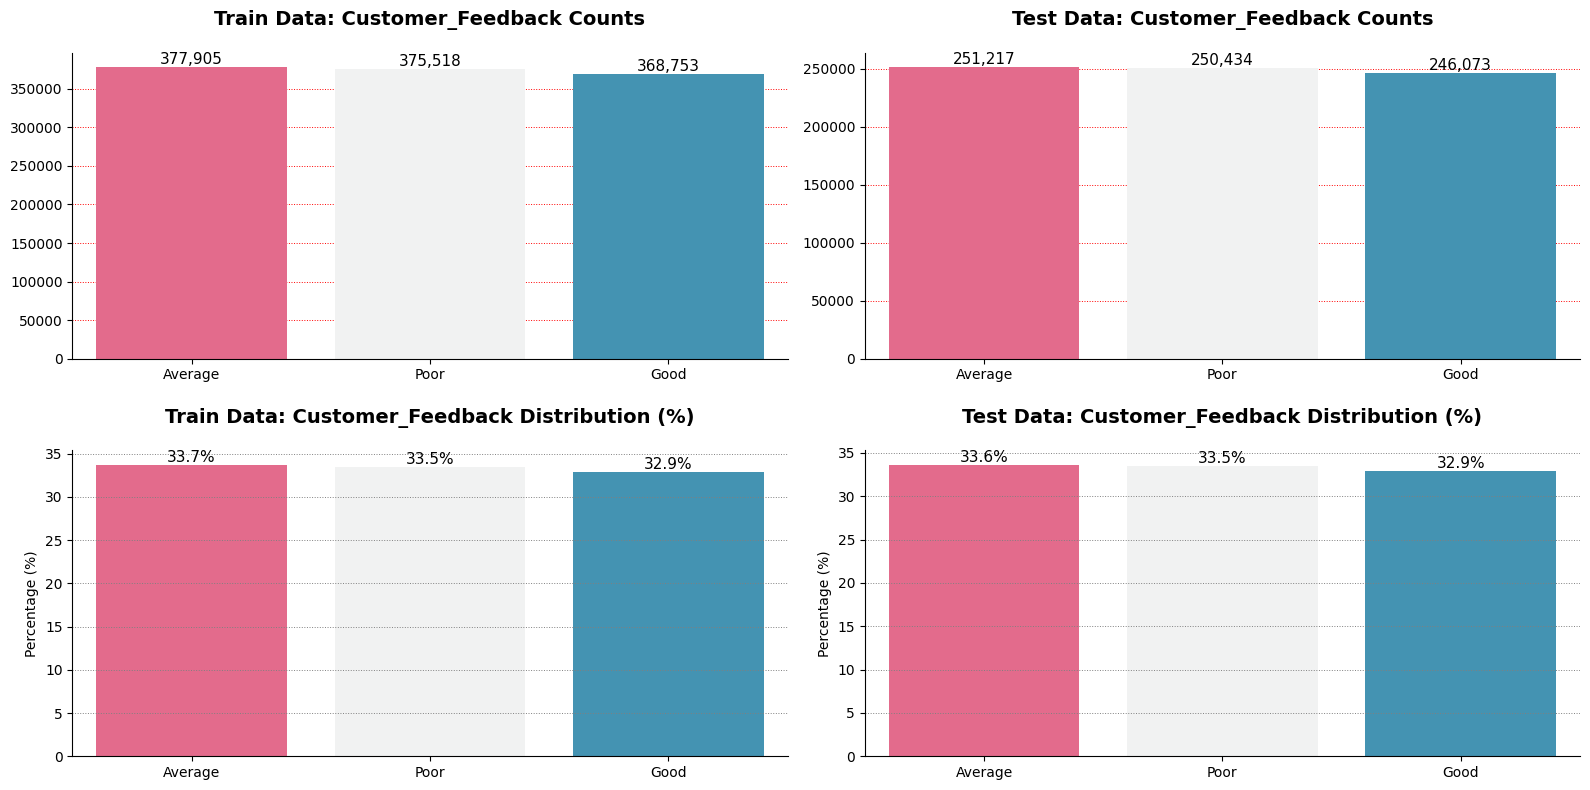

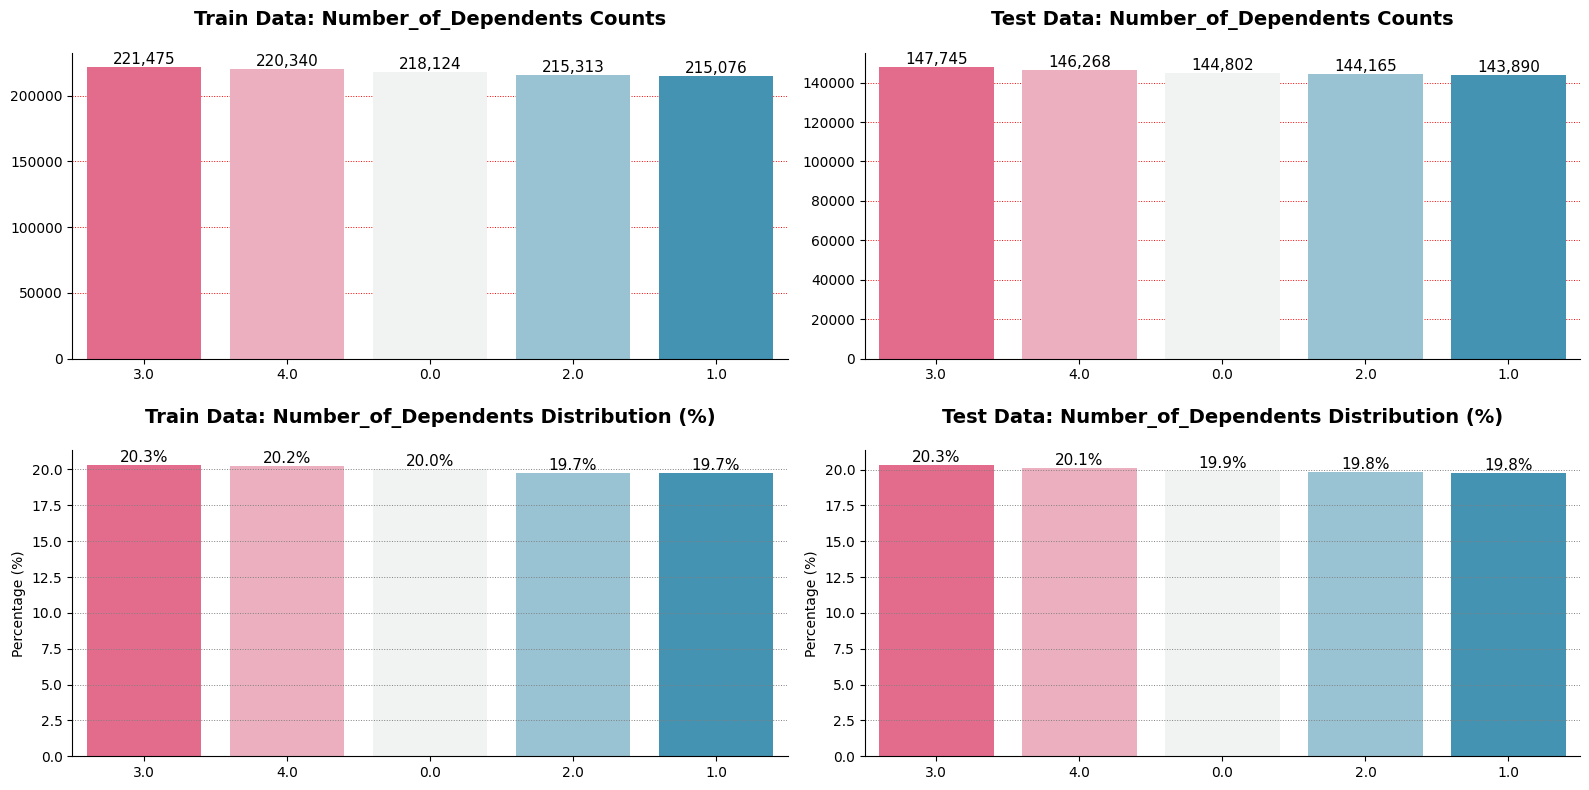

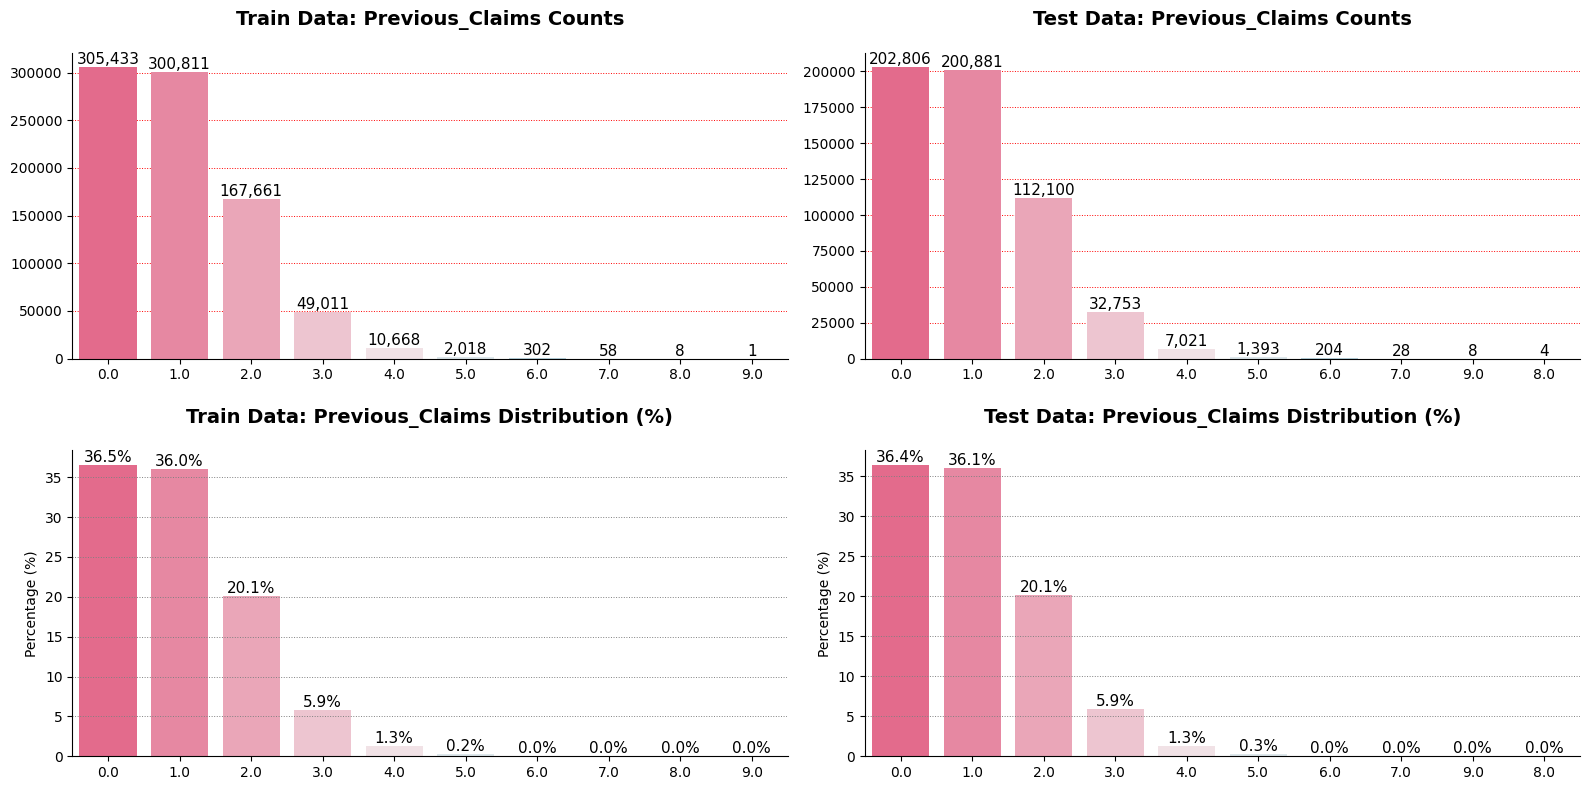

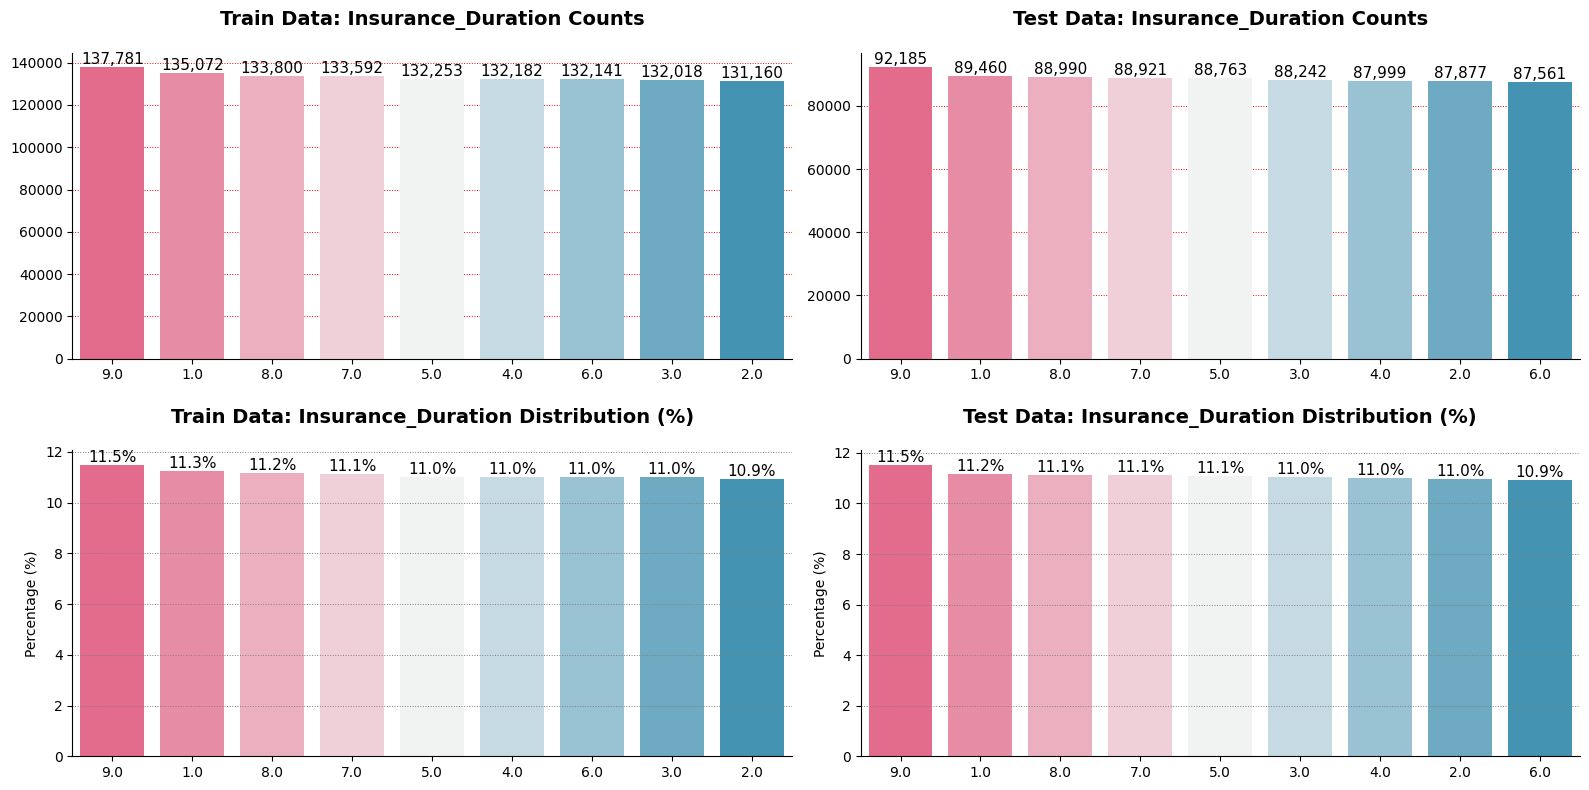

In [43]:
def pl_cr_d_a_dataset(cat_features, train_data, test_data):
    import matplotlib.pyplot as plut
    import seaborn as seasalt

    # Ensure the 'color' function is available or defined here. 
    # If not defined globally, you might need to define it or pass a standard palette.
    
    for feat in cat_features:
        d_names = ["Train", "Test"]
        sets_d = [train_data, test_data]

        fuga1, ax = plut.subplots(2, 2, figsize=(16, 8))

        # --- Plot 1: Countplot ---
        for ios, (data, name_2) in enumerate(zip(sets_d, d_names)):
            order = data[feat].value_counts(ascending=False).index
            
            # Note: Ensure 'color' function is defined in your scope
            seasalt.countplot(x=feat, data=data, ax=ax[0, ios],
                              palette=color(n_colors=train_data[feat].nunique()), order=order)

            ax[0, ios].set_title(f"{name_2} Data: {feat} Counts", fontsize=14, pad=20, weight="bold")
            ax[0, ios].set_xlabel("")
            ax[0, ios].set_ylabel("")
            
            for p in ax[0, ios].patches:
                count = int(p.get_height())
                ax[0, ios].annotate(f"{count:,}",
                                  (p.get_x() + p.get_width() / 2., p.get_height()),
                                  ha="center", va="bottom", fontsize=11, color="black")

            ax[0, ios].set_axisbelow(True)
            # FIX 1: changed ax="y" to axis="y"
            ax[0, ios].grid(axis="y", color="red", linestyle=":", linewidth=0.7)
            seasalt.despine(left=False, bottom=False, ax=ax[0, ios])

        # --- Plot 2: Percentage Barplot ---
        for ios, (data, name_2) in enumerate(zip(sets_d, d_names)):
            percent = data[feat].value_counts(normalize=True) * 100
            percent = percent.sort_values(ascending=False).reset_index()
            percent.columns = [feat, "Percent"]

            seasalt.barplot(x=feat, y="Percent", data=percent, ax=ax[1, ios],
                            palette=color(n_colors=train_data[feat].nunique()), order=percent[feat])

            ax[1, ios].set_title(f"{name_2} Data: {feat} Distribution (%)", fontsize=14, pad=20, weight="bold")
            ax[1, ios].set_ylabel("Percentage (%)")
            ax[1, ios].set_xlabel("")
            
            # FIX 2: changed ax="x" to axis="x"
            ax[1, ios].tick_params(axis="x", rotation=0)
            
            # FIX 3: changed ax="y" to axis="y"
            ax[1, ios].grid(color="gray", linestyle=":", linewidth=0.7, axis="y")
            seasalt.despine(left=False, bottom=False, ax=ax[1, ios])

            for p in ax[1, ios].patches:
                percentage = p.get_height()
                ax[1, ios].annotate(f"{percentage:.1f}%",
                                  (p.get_x() + p.get_width() / 2., percentage),
                                  ha="center", va="bottom", fontsize=11, color="black")

        plut.tight_layout()
        plut.subplots_adjust(hspace=0.3)
        plut.show()

# Call the function (Ensure training_dta, testing_dta, and cat_features are defined)
pl_cr_d_a_dataset(cat_features=cat_features, train_data=training_dta, test_data=testing_dta)

In [44]:
def tp_rat(testing_dta = testing_dta, training_dta = training_dta, cat_features = cat_features):
    d_names = ["Train", "Test"]
    sets_d = [training_dta, testing_dta]
    for ios, (data, name_2) in enumerate(zip(sets_d, d_names)):
        show(f"{name_2} Data")
        flag1 = False
        for feat in cat_features:
            freq = data[feat].value_counts(normalize=True)
            tp_rat = freq.iloc[0]
            if tp_rat > 0.99:
                flag1 = True
                show(f"  {feat}: {tp_rat:.1%} là '{freq.index[0]}'")
        if not flag1:
            show("  No feature has any category that makes up more than 99% of its values.")
        show("-" * 50)
tp_rat()

Train Data
  No feature has any category that makes up more than 99% of its values.
--------------------------------------------------
Test Data
  No feature has any category that makes up more than 99% of its values.
--------------------------------------------------


## Bivariate Analysis

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Gender' grpo
num__num
 Group: Female (num__num = 597429)
  Statistic : 116936.664
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Male (num__num = 602571)
  Statistic : 116998.367
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Mann–Whitney U Test for 'Premium_Amount' by 'Gender'
um__num
H₀: The distributions are equal.
H₁: The distributions are different.
um__num
U statistic : 179971290482.0
p-value     : 0.8934858512249965

num__num Result: No statistically significant difference between the two groups (Fails to reject H₀).


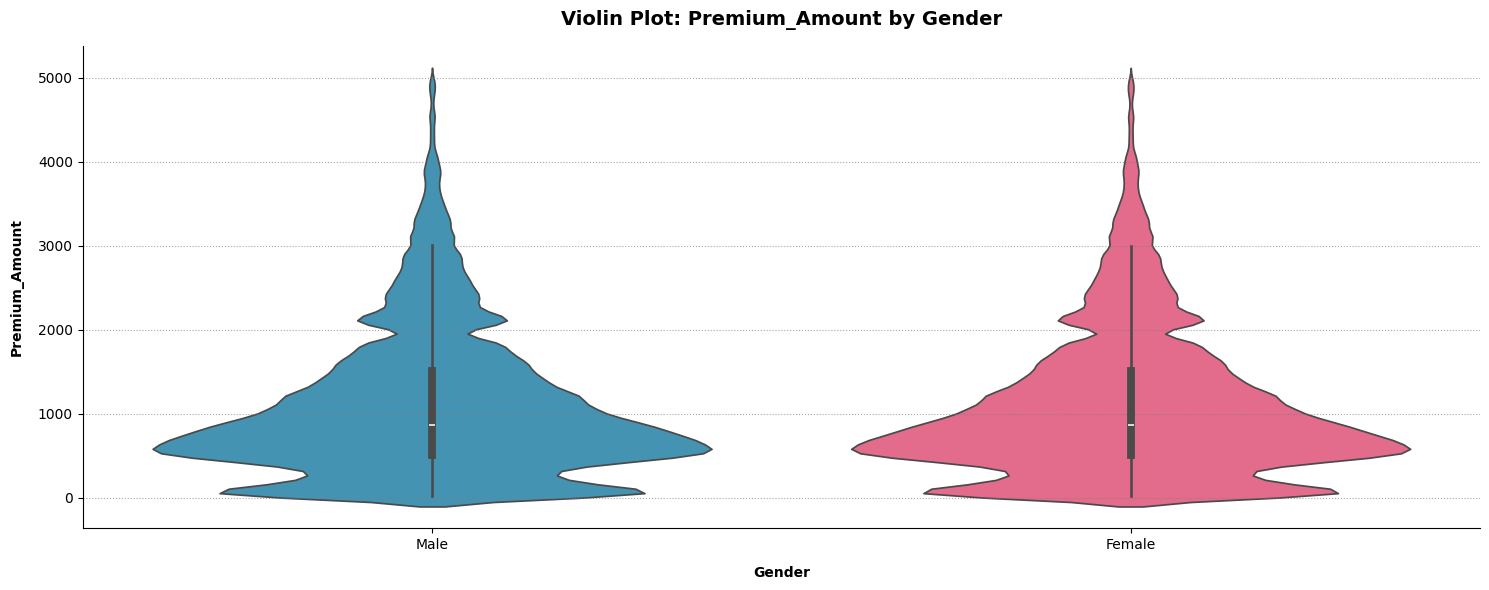

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Marital_Status' grpo
num__num
 Group: Married (num__num = 394316)
  Statistic : 77372.811
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Divorced (num__num = 391764)
  Statistic : 76332.193
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Single (num__num = 395391)
  Statistic : 77245.139
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Marital_Status
Kruskal-Wallis H-statistic: 1.168
p-value: 0.5577635077735495

um__num No significant difference found (p >= 0.05)


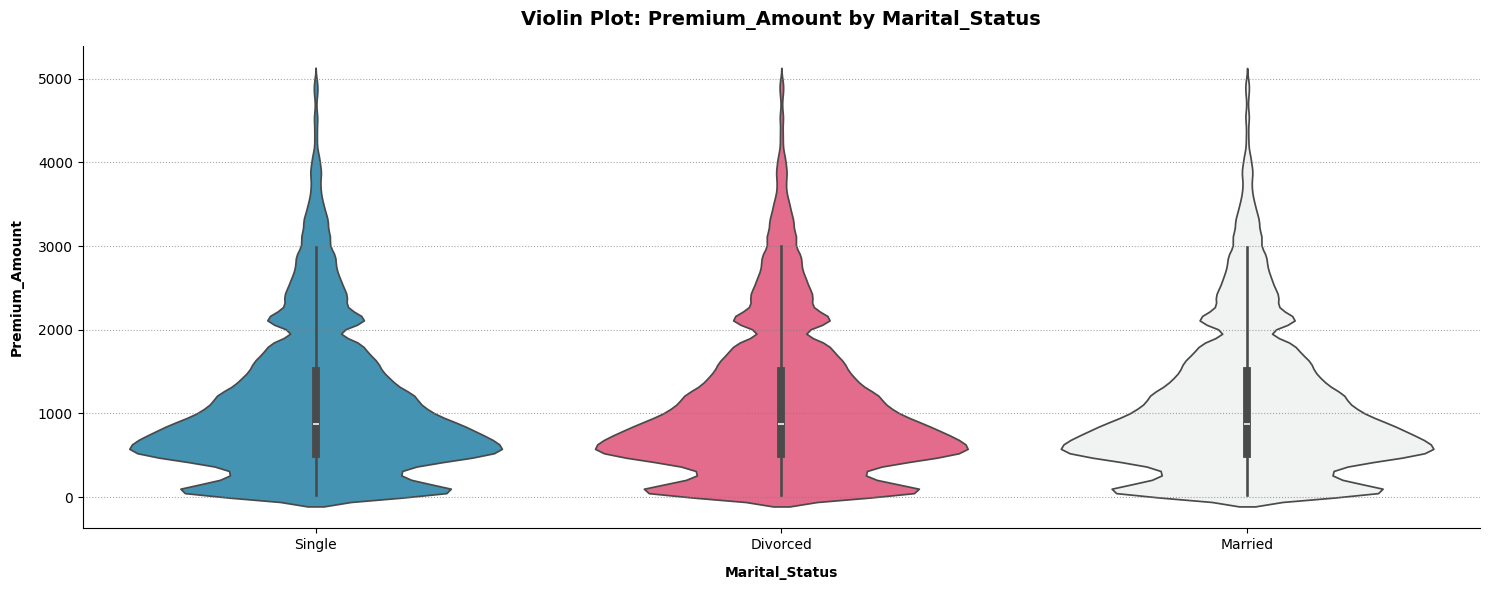

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Education_Level' grpo
num__num
 Group: Bachelor's (num__num = 303234)
  Statistic : 59323.246
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Master's (num__num = 303818)
  Statistic : 59096.248
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: High School (num__num = 289441)
  Statistic : 55676.878
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: PhD (num__num = 303507)
  Statistic : 59856.126
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Education_Level
Kruskal-Wallis H-statistic: 3.804
p-value: 0.28339037743421447

um__num No significant difference found (p >= 0.05)


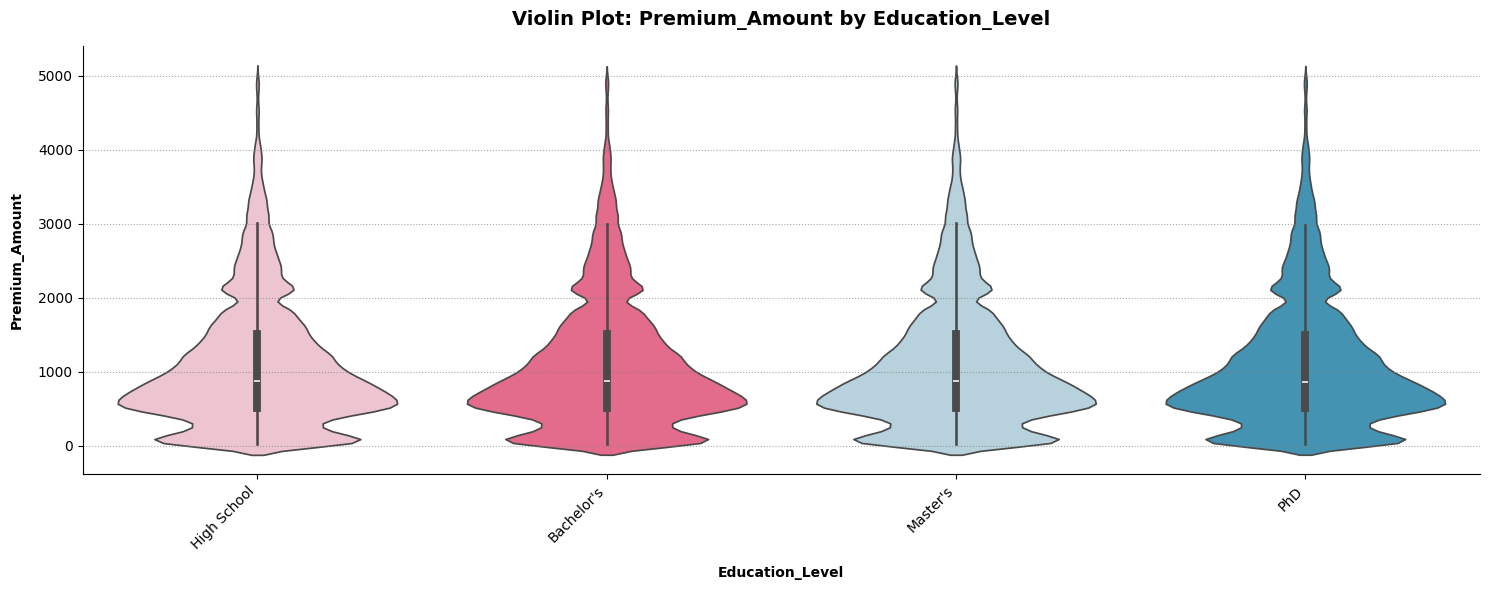

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Occupation' grpo
num__num
 Group: Self-Employed (num__num = 282645)
  Statistic : 54721.910
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Employed (num__num = 282750)
  Statistic : 54134.878
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Unemployed (num__num = 276530)
  Statistic : 54002.978
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Occupation
Kruskal-Wallis H-statistic: 6.277
p-value: 0.04335716956571707
 Significant difference found. Running Dunn's Post-Hoc Test...
               Employed  Self-Employed  Unemployed
Employed       1.000000       0.110253    0.075483
Self-Employed  0.110253       1.000000    1.000000
Unemployed     0.075483       1.000000    1.000000


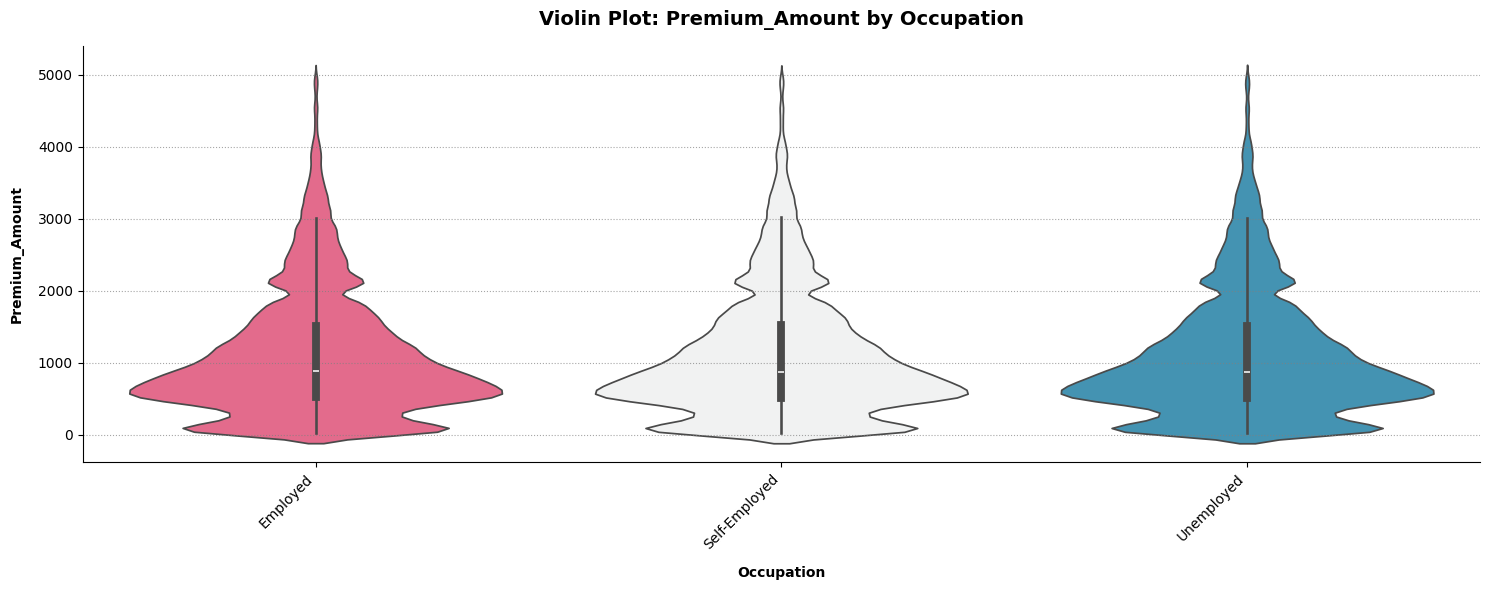

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Location' grpo
num__num
 Group: Urban (num__num = 397511)
  Statistic : 78045.902
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Rural (num__num = 400947)
  Statistic : 78298.010
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Suburban (num__num = 401542)
  Statistic : 77598.207
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Location
Kruskal-Wallis H-statistic: 3.430
p-value: 0.17999002710892853

um__num No significant difference found (p >= 0.05)


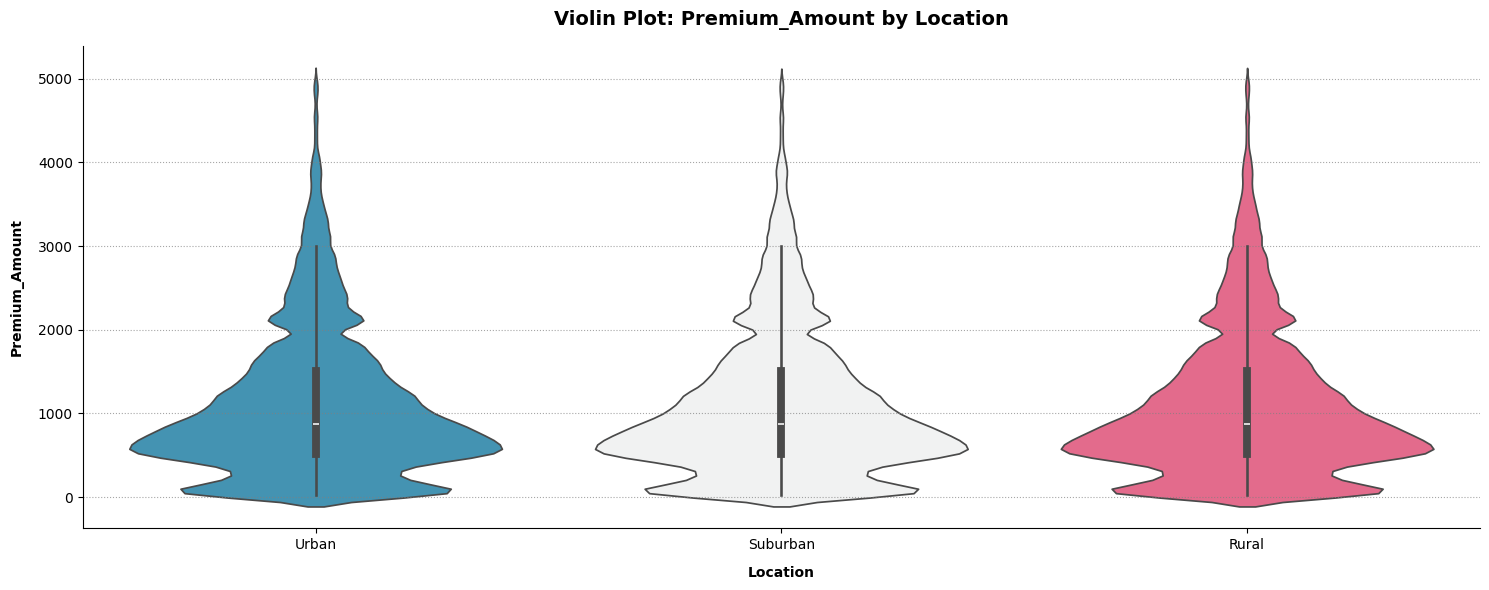

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Policy_Type' grpo
num__num
 Group: Premium (num__num = 401846)
  Statistic : 78994.035
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Comprehensive (num__num = 399600)
  Statistic : 77787.994
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Basic (num__num = 398554)
  Statistic : 77158.434
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Policy_Type
Kruskal-Wallis H-statistic: 1.907
p-value: 0.38530179247027485

um__num No significant difference found (p >= 0.05)


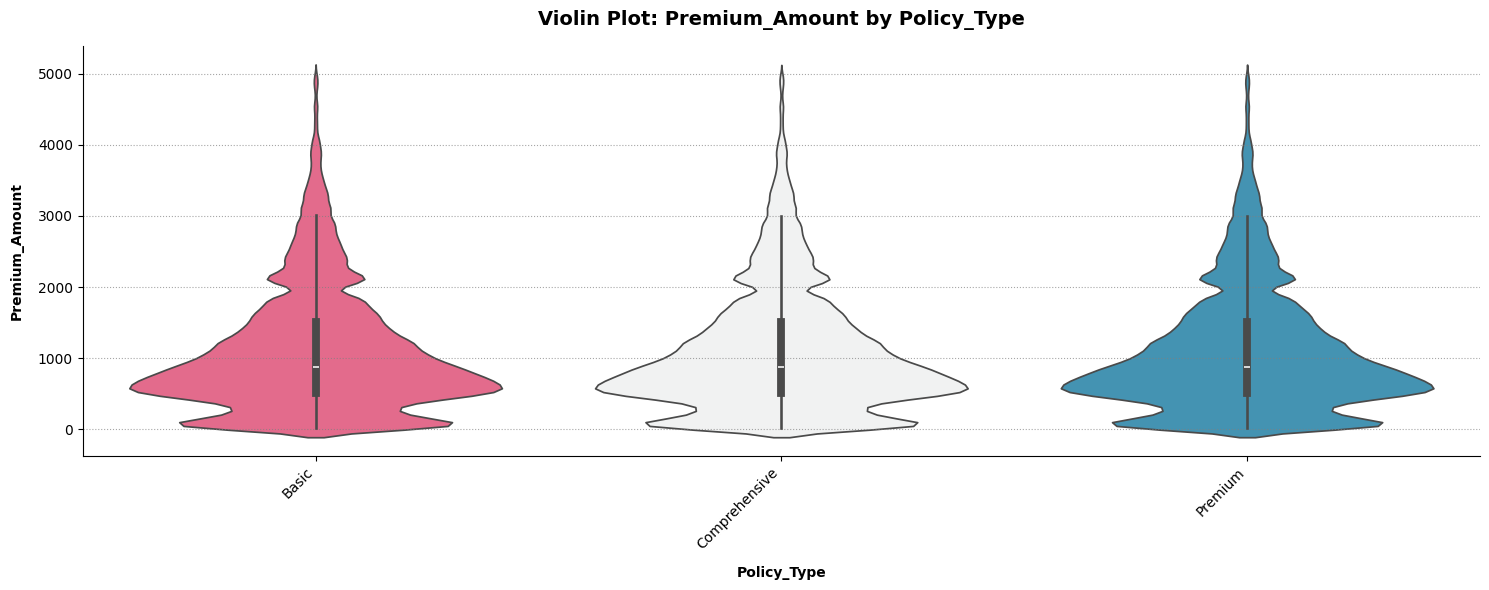

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Smoking_Status' grpo
num__num
 Group: No (num__num = 598127)
  Statistic : 116159.442
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Yes (num__num = 601873)
  Statistic : 117775.583
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Mann–Whitney U Test for 'Premium_Amount' by 'Smoking_Status'
um__num
H₀: The distributions are equal.
H₁: The distributions are different.
um__num
U statistic : 179920076580.0
p-value     : 0.6803462465593562

num__num Result: No statistically significant difference between the two groups (Fails to reject H₀).


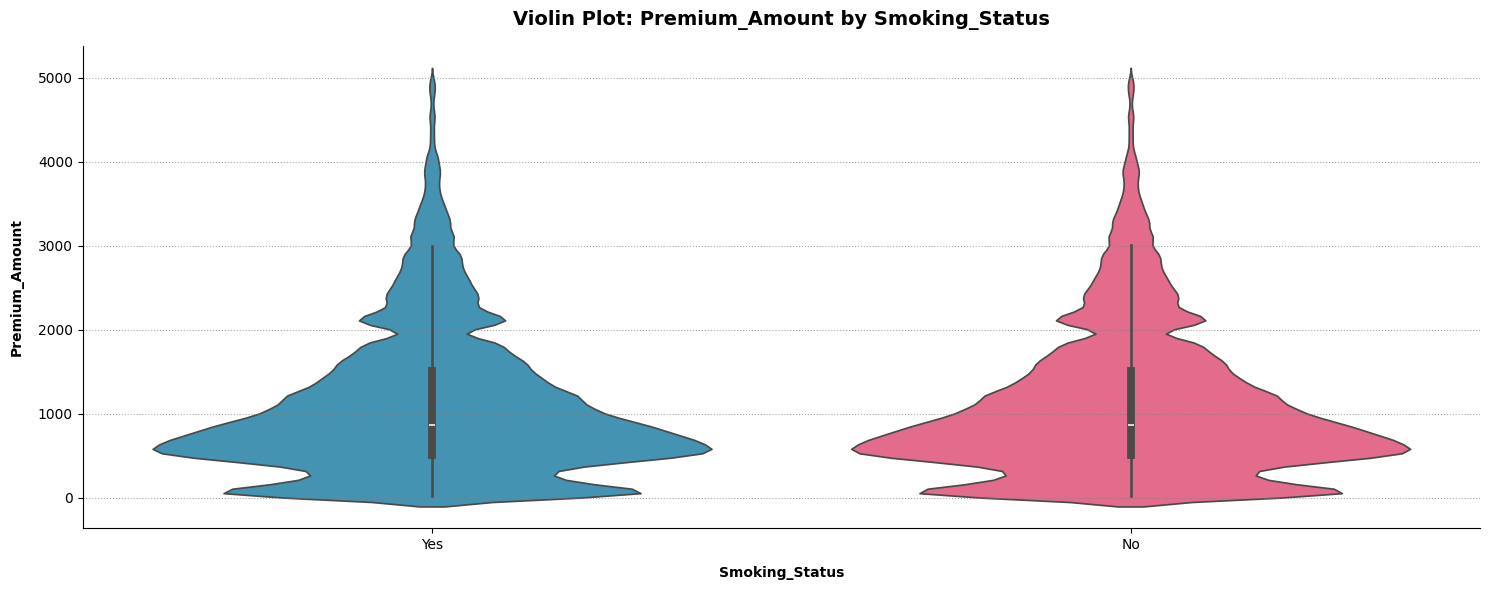

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Exercise_Frequency' grpo
num__num
 Group: Weekly (num__num = 306179)
  Statistic : 60159.303
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Monthly (num__num = 299830)
  Statistic : 58723.200
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Daily (num__num = 294571)
  Statistic : 56573.534
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Rarely (num__num = 299420)
  Statistic : 58483.913
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Exercise_Frequency
Kruskal-Wallis H-statistic: 2.756
p-value: 0.4307232862526176

um__num No significant difference found (p >= 0.05)


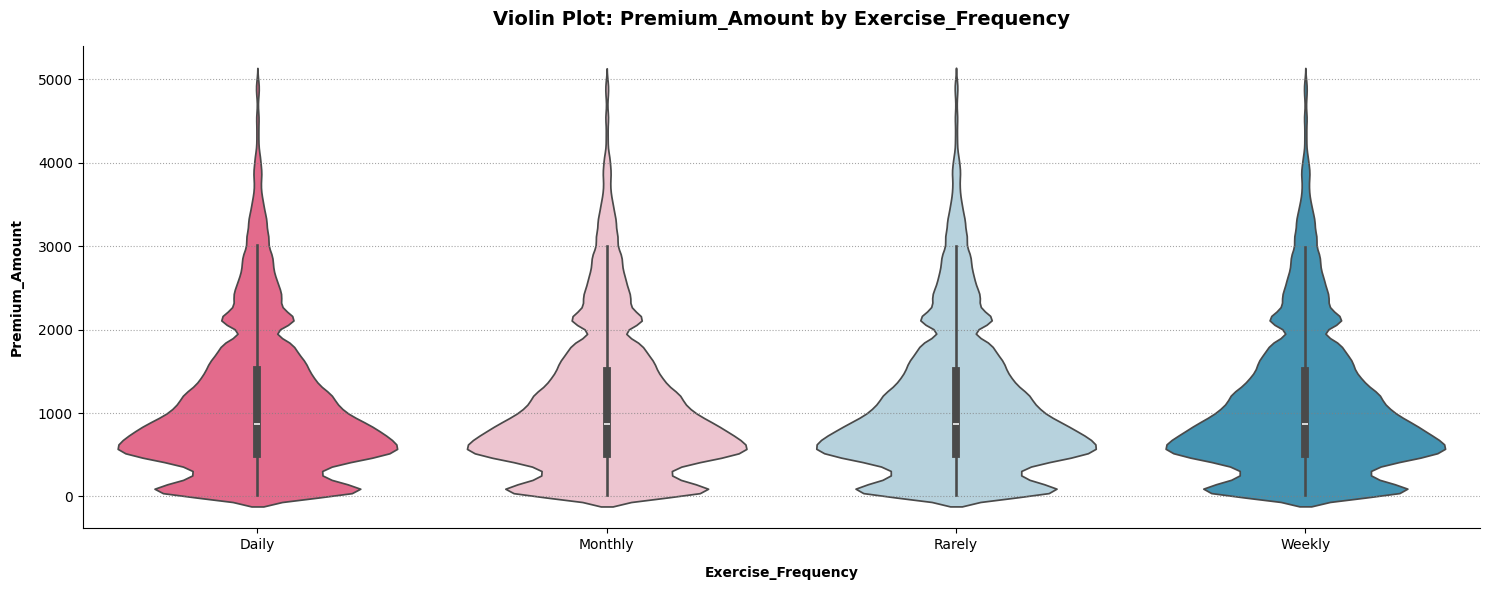

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Property_Type' grpo
num__num
 Group: House (num__num = 400349)
  Statistic : 78409.295
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Apartment (num__num = 399978)
  Statistic : 78164.931
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Condo (num__num = 399673)
  Statistic : 77361.483
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Property_Type
Kruskal-Wallis H-statistic: 1.738
p-value: 0.41927803353272053

um__num No significant difference found (p >= 0.05)


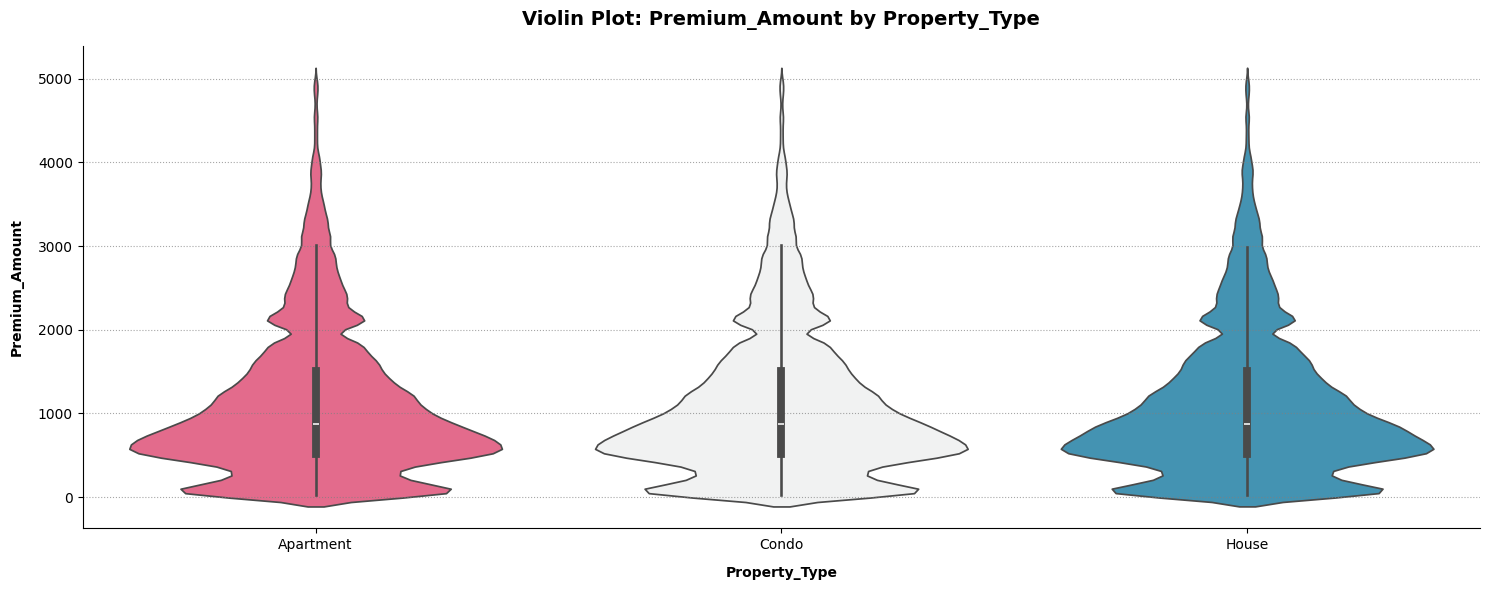

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Customer_Feedback' grpo
num__num
 Group: Poor (num__num = 375518)
  Statistic : 74444.393
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Average (num__num = 377905)
  Statistic : 74425.997
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Good (num__num = 368753)
  Statistic : 72947.567
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Customer_Feedback
Kruskal-Wallis H-statistic: 4.409
p-value: 0.11027980656876069

um__num No significant difference found (p >= 0.05)


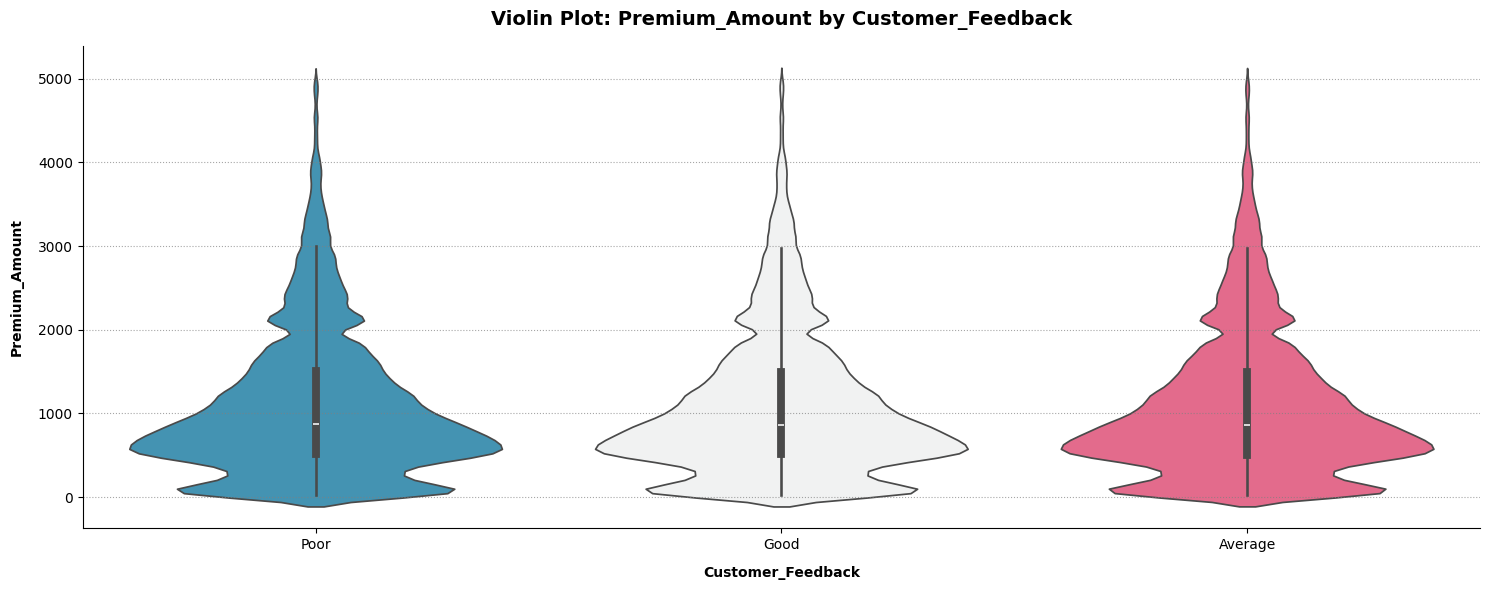

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Number_of_Dependents' grpo
num__num
 Group: 1.0 (num__num = 215076)
  Statistic : 41964.544
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 3.0 (num__num = 221475)
  Statistic : 42820.891
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 2.0 (num__num = 215313)
  Statistic : 41943.316
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 0.0 (num__num = 218124)
  Statistic : 43369.468
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 4.0 (num__num = 220340)
  Statistic : 44082.616
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Number_of_Dependents
Kruskal-Wallis H-statis

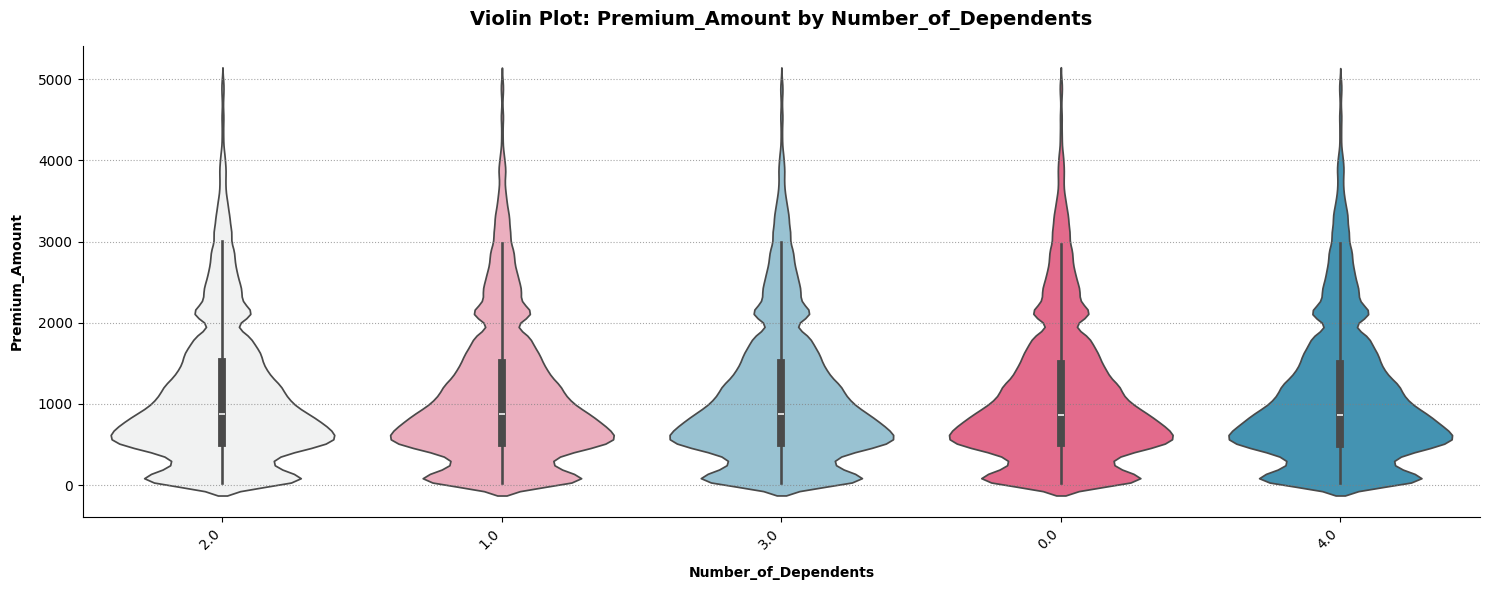

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Previous_Claims' grpo
num__num
 Group: 2.0 (num__num = 167661)
  Statistic : 27262.339
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 1.0 (num__num = 300811)
  Statistic : 60598.868
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 0.0 (num__num = 305433)
  Statistic : 62533.762
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 3.0 (num__num = 49011)
  Statistic : 7399.832
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 4.0 (num__num = 10668)
  Statistic : 1393.449
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 5.0 (num__num = 2018)
  Statistic : 300.055
  p-value   : 0.00000
  : Interpretation: Data d

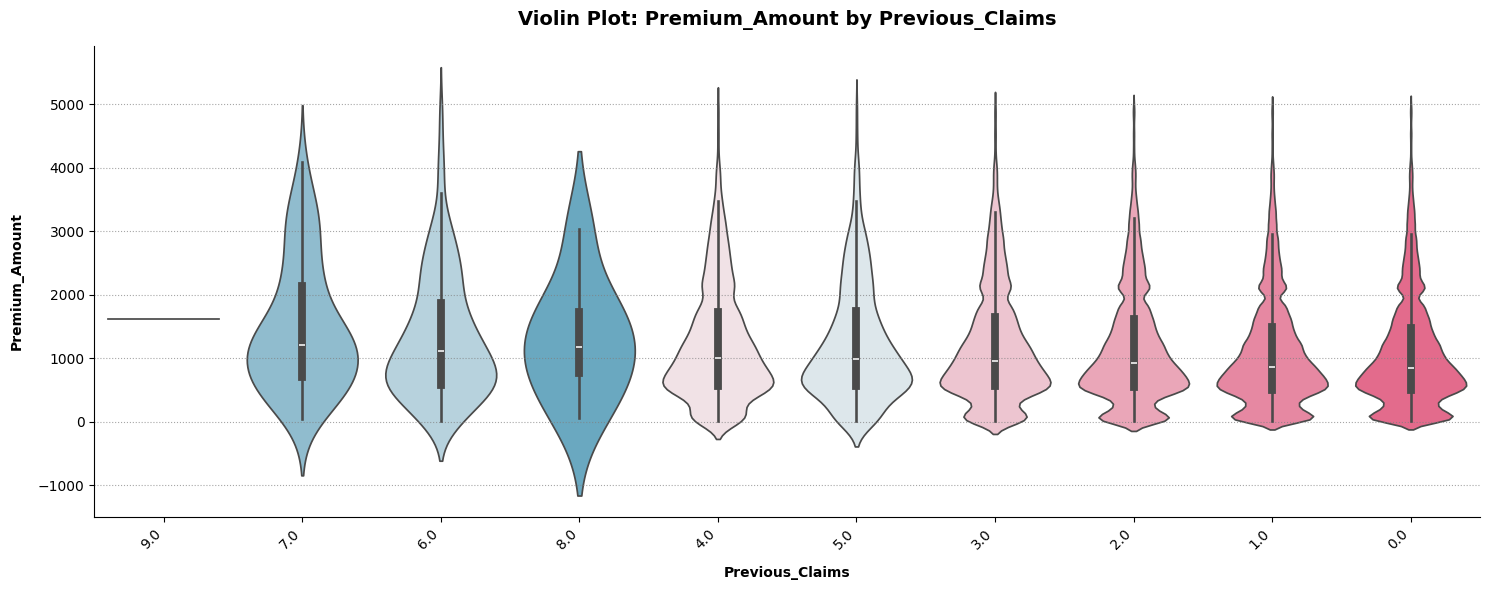

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Insurance_Duration' grpo
num__num
 Group: 5.0 (num__num = 132253)
  Statistic : 25642.819
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 2.0 (num__num = 131160)
  Statistic : 24948.017
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 3.0 (num__num = 132018)
  Statistic : 25683.122
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 1.0 (num__num = 135072)
  Statistic : 25922.933
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 4.0 (num__num = 132182)
  Statistic : 26271.797
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 6.0 (num__num = 132141)
  Statistic : 25967.103
  p-value   : 0.00000
  : Interpretat

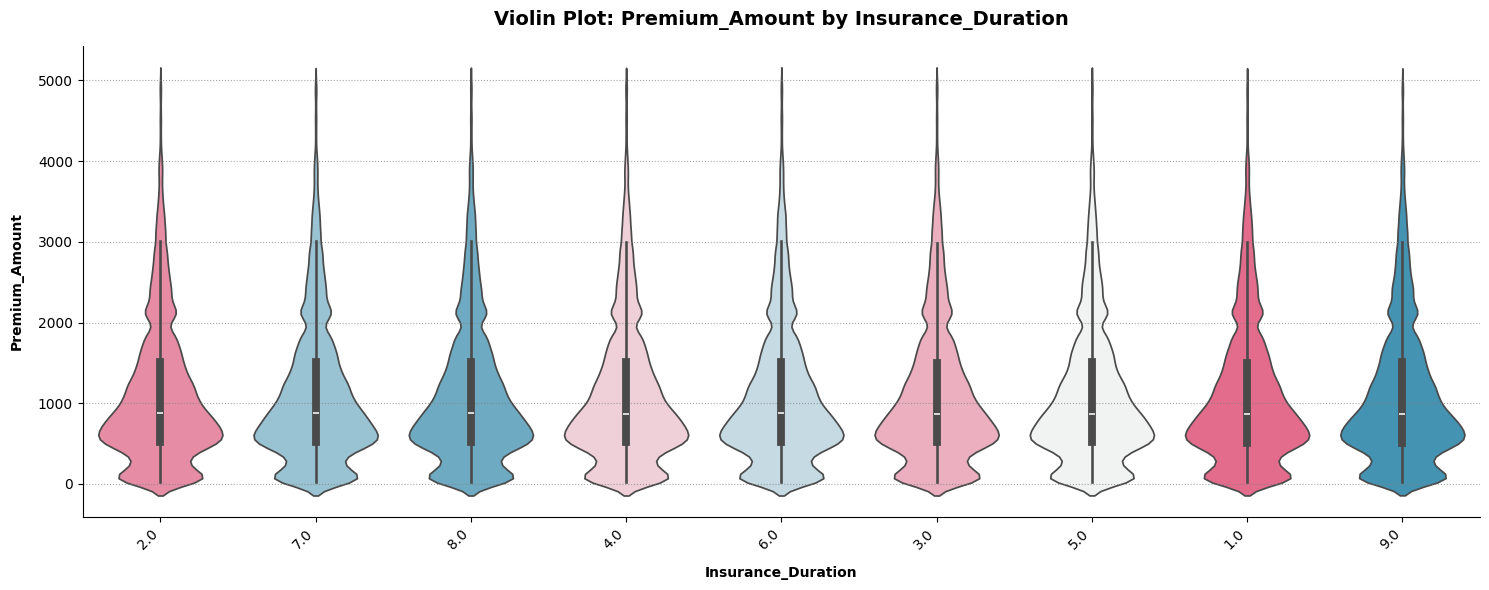

In [45]:
from IPython.core.display import HTML
import matplotlib.pyplot as plut
import seaborn as seasalt

def p_stat_tes(total_categories, feat, training_dta=training_dta, target_feature="Premium_Amount"):
    # Ensure these helper functions (calc_normaltest, etc.) are defined in your notebook
    calc_normaltest(cat_feature=feat, num_feature=target_feature, df=training_dta)
    if total_categories == 2:
        cal_manwhi(dataframe=training_dta, categorical_feature=feat, num_feature=target_feature)
    else:
        perform_kruskal_test(df=training_dta, categorical_feature=feat, numeric_feature=target_feature)

def p_cat_d_prem_amoun(feat, training_dta=training_dta, target_feature="Premium_Amount"):
    # 1. Create Summary Data
    d_sum_f = training_dta.groupby(by=feat, as_index=False).agg(
        Count=(target_feature, "count"),
        Mean_Premium_Amount=(target_feature, "mean"),
        Median_Premium_Amount=(target_feature, "median"),
        Std_Premium_Amount=(target_feature, "std")
    )
    
    # Sort by Mean Premium for better analysis
    d_sum_f = d_sum_f.sort_values(by="Mean_Premium_Amount", ascending=False)
    
    # Extract the sorted order for the plot
    sorted_order = d_sum_f[feat].tolist()

    # 2. Display Summary Table
    d_sum = [
        ("Total Categories", f"{d_sum_f.shape[0]}"),
        ("Overall Target Mean", f"{training_dta[target_feature].mean():.2f}")
    ]
    html_sum = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in d_sum]) + "</ul>"
    display(HTML(html_sum))

    # Improved Table Styling: Adds bars to visualize magnitude
    display(d_sum_f.style.format("{:.2f}", subset=["Mean_Premium_Amount", "Median_Premium_Amount", "Std_Premium_Amount"])
            .bar(subset=["Count"], color='#d65f5f')
            .background_gradient(subset=["Mean_Premium_Amount"], cmap="Reds")
            .set_table_attributes('style="width:80%; margin:auto;"')
            .hide(axis='index'))

    # 3. Run Statistical Tests
    p_stat_tes(total_categories=d_sum_f.shape[0], feat=feat, training_dta=training_dta, target_feature=target_feature)

    # 4. Plot Distribution (Violin Plot)
    fuga1, ax = plut.subplots(figsize=(15, 6)) # Slightly taller for labels
    
    # Use the 'sorted_order' so the plot matches the table
    seasalt.violinplot(x=feat, y=target_feature, data=training_dta, 
                       hue=feat, legend=False,  # legend=False removes warning in new seaborn
                       order=sorted_order,      # SYNC ORDER WITH TABLE
                       palette=color(n_colors=training_dta[feat].nunique()), 
                       ax=ax)

    ax.set_title(f"Violin Plot: {target_feature} by {feat}", pad=15, weight="bold", fontsize=14)
    ax.set_xlabel(feat, labelpad=10, weight="bold")
    ax.set_ylabel(target_feature, labelpad=10, weight="bold")
    
    # Auto-rotate labels if there are many categories to prevent overlap
    if len(sorted_order) > 4 or any(len(str(x)) > 10 for x in sorted_order):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # FIX: changed ax="y" to axis="y"
    plut.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    seasalt.despine(left=False, bottom=False, ax=ax)

    plut.tight_layout()
    plut.show()

# Execution Loop
for feat in cat_features:
    display(HTML(f"<div style='background-color:#f4f4f4; padding:10px; border-radius:5px; margin-top:20px;'>"
                 f"<h2 style='text-align:center; color:#2c3e50; margin:0;'>Distribution of Premium Amount by {feat}</h2>"
                 f"</div>"))
    p_cat_d_prem_amoun(feat=feat)

## now to the business question

In [46]:
train_df_ma = training_dta.copy()

In [47]:
bins = [0, 25, 35, 45, 55, norepo.inf]
labels = ["<25", "25–34", "35–44", "45–54", ">55"]
train_df_ma["Age_Group"] = pagedo.cut(train_df_ma["Age"], bins=bins, labels=labels, right=False)

In [48]:
med_age_group = train_df_ma.groupby("Age_Group")["Premium_Amount"].median().reset_index()
med_age_group.columns = ["Age_Group", "Median_Premium"]
show(med_age_group)

  Age_Group  Median_Premium
0       <25           872.0
1     25–34           876.0
2     35–44           873.0
3     45–54           870.0
4       >55           870.0


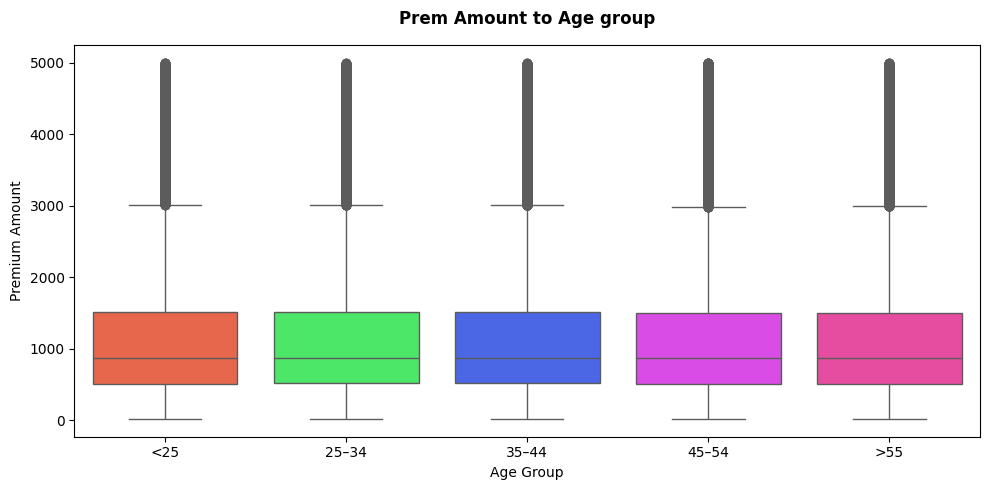

In [49]:
# Define your custom colors
my_custom_colors = ["#FF5733", "#33FF57", "#3357FF", "#F033FF", "#FF33A1"]

plut.figure(figsize=(10, 5))
ax = seasalt.boxplot(data=train_df_ma, y="Premium_Amount", x="Age_Group",
                     palette=my_custom_colors)

plut.title("Prem Amount to Age group", pad=15, weight="bold")
plut.xlabel("Age Group")
plut.ylabel("Premium Amount")
plut.tight_layout()
plut.show()

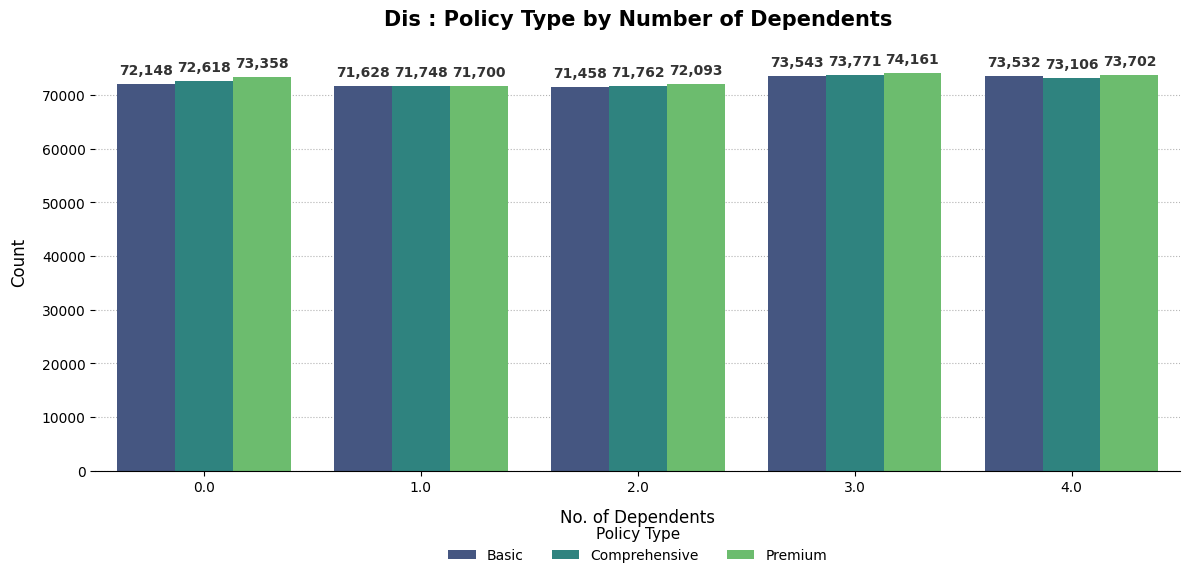

In [50]:
import matplotlib.pyplot as plut
import seaborn as seasalt

plut.figure(figsize=(12, 6))

# 1. Plot with a high-contrast palette
ax = seasalt.countplot(data=train_df_ma, x="Number_of_Dependents", hue="Policy_Type",
                       palette="viridis") 

# 2. Add Titles and Labels
plut.title("Dis : Policy Type by Number of Dependents", pad=20, weight="bold", fontsize=15)
plut.xlabel("No. of Dependents", fontsize=12, labelpad=10)
plut.ylabel("Count", fontsize=12, labelpad=10)

# 3. Add Grid and Clean Borders
ax.grid(axis='y', linestyle=':', alpha=0.6, color='gray') 
ax.set_axisbelow(True) 
seasalt.despine(left=True) 

# 4. Add Value Annotations (Fixed: Removed 'pagedo' dependency)
for p in ax.patches:
    height = p.get_height()
    # "height > 0" automatically handles NaNs (NaN > 0 is False)
    if height > 0:
        ax.annotate(f'{int(height):,}',  
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    fontsize=10, fontweight='bold', color='#333333',
                    xytext=(0, 5), textcoords='offset points')

# 5. Improved Legend
plut.legend(title='Policy Type', title_fontsize='11', loc='lower center', 
            bbox_to_anchor=(0.5, -0.25), ncol=3, frameon=False)

plut.tight_layout()
plut.show()


um__num ChiSquare Test for Ind. : 'Number_of_Dependents' vs. 'Policy_Type'
ChiSq Stats: 7.504
DOF : 8
PValue: 0.483385
 When Pvalue is greater than or equal to 0.05 , we fail to reject Ho:
→ No significant association between 'Number_of_Dependents' and 'Policy_Type'.

um__num Reisduals ( Standardization ):
Policy_Type           Basic  Comprehensive  Premium
Number_of_Dependents                               
0.0                   -1.24          -0.01     1.24
1.0                    0.60           0.53    -1.13
2.0                   -0.33           0.29     0.04
3.0                   -0.19           0.13     0.06
4.0                    1.16          -0.93    -0.23


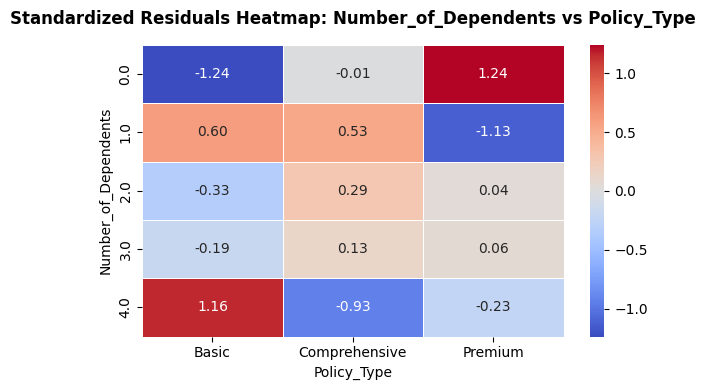

In [51]:
cs_test(cat_feature="Number_of_Dependents", target_feature="Policy_Type", df=train_df_ma, show_residuals=True)

In [52]:
med_occ = train_df_ma.groupby("Occupation")["Annual_Income"].median().reset_index()
med_occ.columns = ["Occupation", "Median_Income"]
show(med_occ)

      Occupation  Median_Income
0       Employed        23961.0
1  Self-Employed        23961.0
2     Unemployed        23962.0


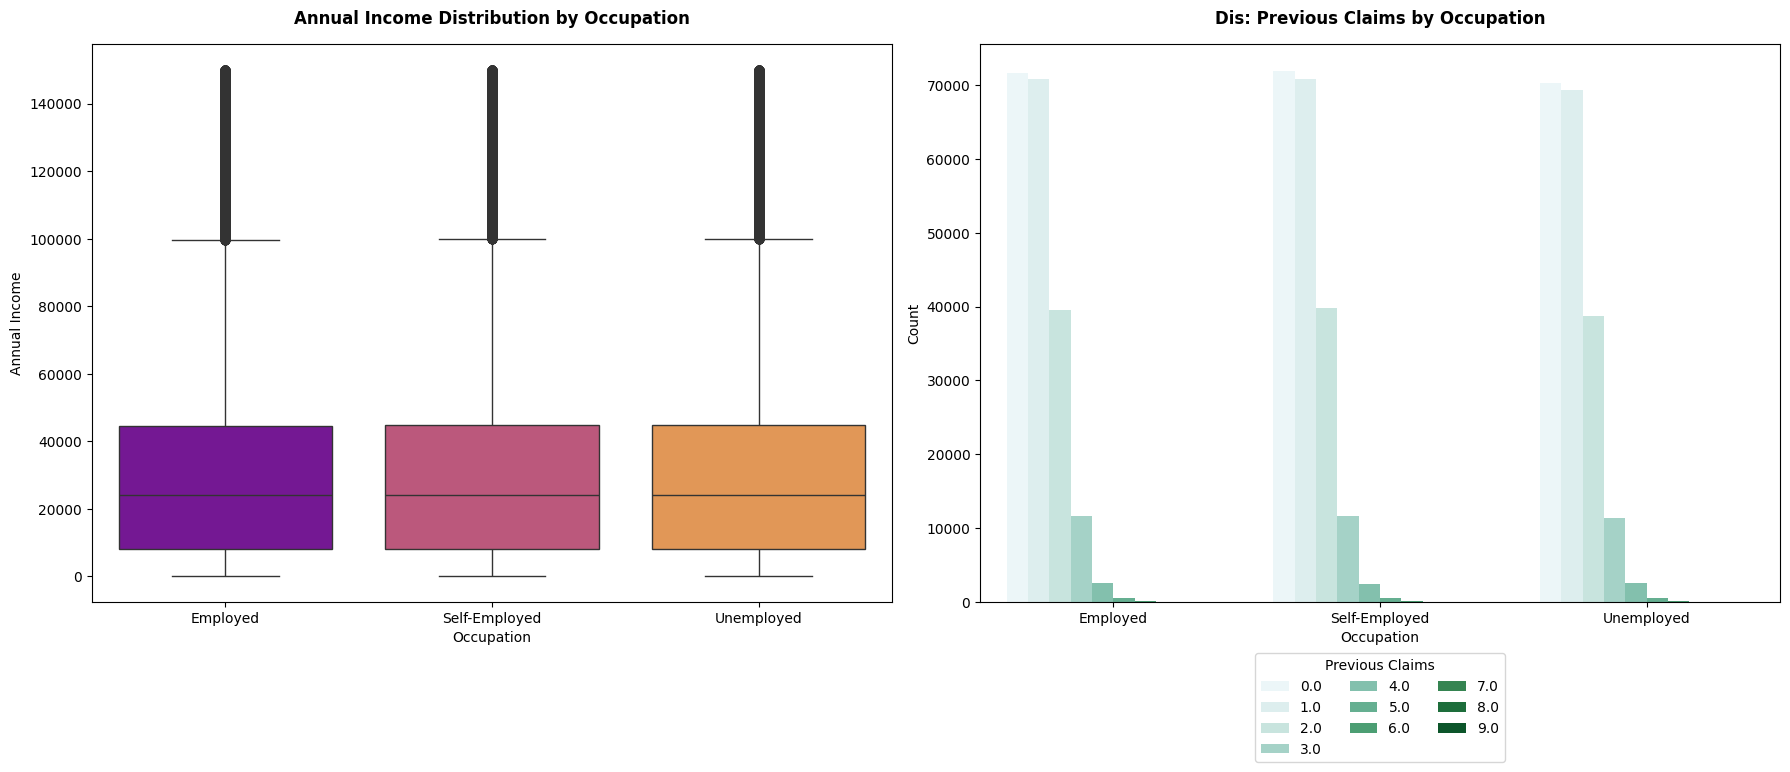

In [53]:
fuga1, ax = plut.subplots(1, 2, figsize=(18, 8))

seasalt.boxplot(
    data=train_df_ma,
    y="Annual_Income",
    x="Occupation",
    ax=ax[0],
    palette=seasalt.color_palette("plasma", n_colors=train_df_ma["Occupation"].nunique())
)
ax[0].set_xlabel("Occupation")
ax[0].set_ylabel("Annual Income")
ax[0].set_title("Annual Income Distribution by Occupation", pad=15, weight = "bold")

seasalt.countplot(
    data=train_df_ma,
    x="Occupation",
    hue="Previous_Claims",
    ax=ax[1],
    palette="BuGn"
)
ax[1].set_xlabel("Occupation")
ax[1].set_ylabel("Count")
ax[1].set_title("Dis: Previous Claims by Occupation", pad=15, weight = "bold")
ax[1].legend(title="Previous Claims", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

plut.tight_layout()
plut.show()


um__num ChiSquare Test for Ind. : 'Occupation' vs. 'Previous_Claims'
ChiSq Stats: 25.313
DOF : 16
PValue: 0.064496
 When Pvalue is greater than or equal to 0.05 , we fail to reject Ho:
→ No significant association between 'Occupation' and 'Previous_Claims'.

um__num Reisduals ( Standardization ):
Previous_Claims   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0
Occupation                                                           
Employed        -0.23  0.22 -0.32  0.60  0.17 -1.27  2.00  1.10 -1.53
Self-Employed    0.21 -0.32  0.48  0.10 -1.43  0.23 -0.87 -0.98 -0.88
Unemployed       0.02  0.10 -0.17 -0.72  1.27  1.05 -1.14 -0.12  2.44


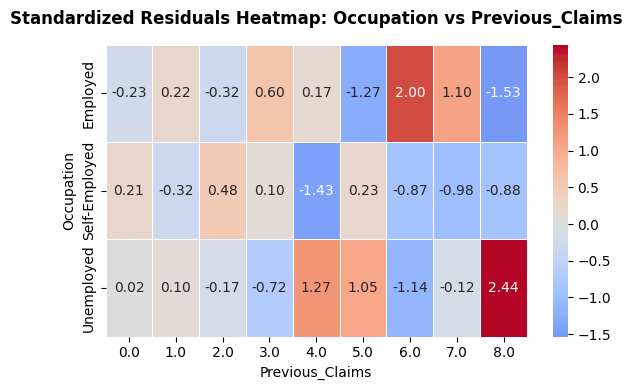

In [54]:
cs_test(cat_feature="Occupation", target_feature="Previous_Claims", df=train_df_ma, show_residuals=True)

In [55]:
med_pol_t = train_df_ma.groupby("Policy_Type")["Annual_Income"].median().reset_index()
med_pol_t.columns = ["Policy_Type", "Median_Income"]
show(med_pol_t)

     Policy_Type  Median_Income
0          Basic        23897.0
1  Comprehensive        23891.0
2        Premium        23981.0


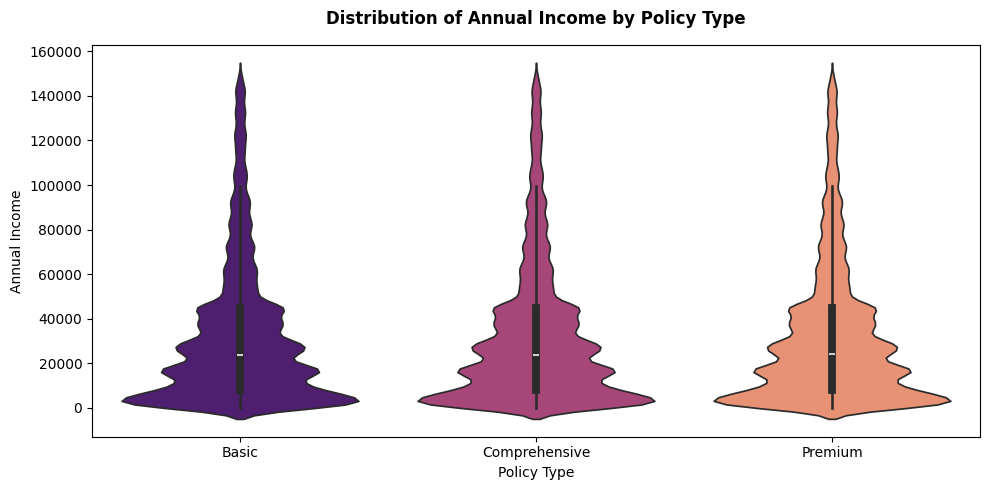

In [56]:
plut.figure(figsize=(10, 5))

ax = seasalt.violinplot(data=train_df_ma, y="Annual_Income", x="Policy_Type",
                        palette="magma") 

plut.title("Distribution of Annual Income by Policy Type", pad=15, weight="bold")
plut.xlabel("Policy Type")
plut.ylabel("Annual Income")
plut.tight_layout()
plut.show()

In [57]:
p_stat_tes(total_categories=3, feat="Policy_Type", training_dta=train_df_ma, target_feature="Annual_Income")

 D’Agostino and Pearson Normality Test for 'Annual_Income' across 'Policy_Type' grpo
num__num
 Group: Premium (num__num = 386621)
  Statistic : 94068.634
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Comprehensive (num__num = 384657)
  Statistic : 93807.576
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Basic (num__num = 383773)
  Statistic : 93472.278
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Annual_Income ~ Policy_Type
Kruskal-Wallis H-statistic: 3.353
p-value: 0.18700395743693182

um__num No significant difference found (p >= 0.05)


In [58]:
train_df_ma["Credit_Score_Group"] = pagedo.qcut(train_df_ma["Credit_Score"], q=4, labels=["Low", "Medium", "High", "Very High"])

In [59]:
med_cre_score_g = train_df_ma.groupby("Credit_Score_Group")["Premium_Amount"].median().reset_index()
med_cre_score_g.columns = ["Credit_Score_Group", "Median_Amount"]
show(med_cre_score_g)

  Credit_Score_Group  Median_Amount
0                Low          938.0
1             Medium          867.0
2               High          832.0
3          Very High          844.0


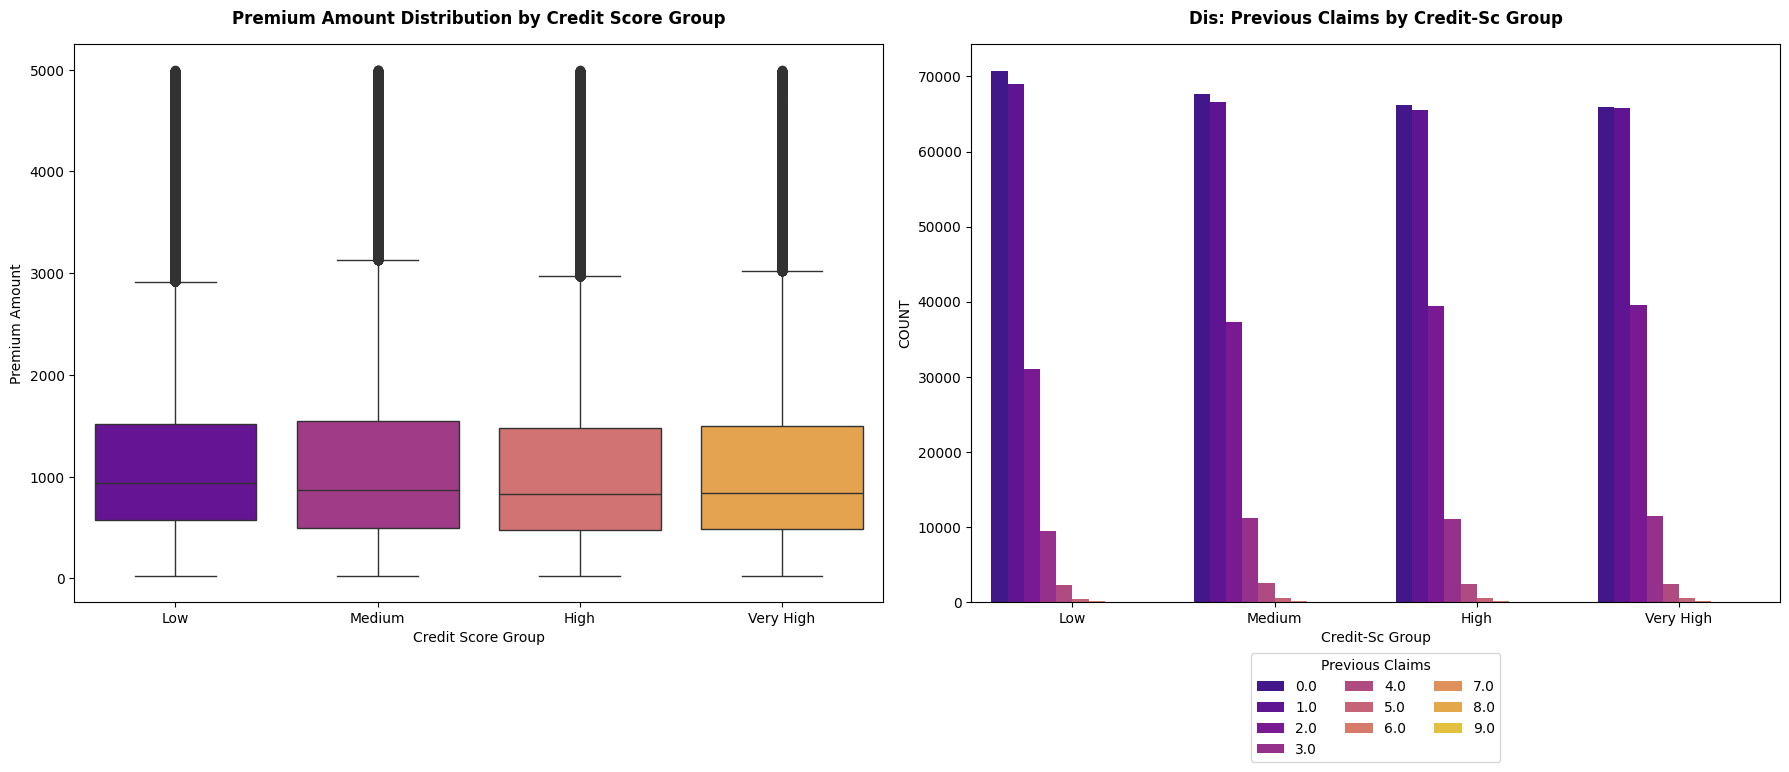

In [60]:
fuga1, ax = plut.subplots(1, 2, figsize=(18, 8))

seasalt.boxplot(
    data=train_df_ma,
    y="Premium_Amount",
    x="Credit_Score_Group",
    ax=ax[0],
    palette=seasalt.color_palette("plasma", n_colors=train_df_ma["Credit_Score_Group"].nunique())
)
ax[0].set_xlabel("Credit Score Group")
ax[0].set_ylabel("Premium Amount")
ax[0].set_title("Premium Amount Distribution by Credit Score Group", pad=15, weight = "bold")

seasalt.countplot(
    data=train_df_ma,
    x="Credit_Score_Group",
    hue="Previous_Claims",
    ax=ax[1],
    palette="plasma"
)
ax[1].set_xlabel("Credit-Sc Group")
ax[1].set_ylabel("COUNT")
ax[1].set_title("Dis: Previous Claims by Credit-Sc Group", pad=15, weight = "bold")
ax[1].legend(title="Previous Claims", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

plut.tight_layout()
plut.show()

In [61]:
p_stat_tes(total_categories=4, feat="Credit_Score_Group", training_dta=train_df_ma, target_feature="Premium_Amount")

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Credit_Score_Group' grpo
num__num
 Group: Low (num__num = 266534)
  Statistic : 57529.378
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: High (num__num = 265311)
  Statistic : 53038.831
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Very High (num__num = 264685)
  Statistic : 50278.420
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Medium (num__num = 265588)
  Statistic : 48669.393
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Credit_Score_Group
Kruskal-Wallis H-statistic: 2750.080
p-value: 0.0
 Significant difference found. Running Dunn's Post-Hoc Test...
                     Low         Medium          High     Very Hi


um__num ChiSquare Test for Ind. : 'Credit_Score_Group' vs. 'Previous_Claims'
ChiSq Stats: 1856.520
DOF : 24
PValue: 0.000000
   When Pvalue is less than 0.05 , we reject the null hypothesis (H₀): 
-> There is a significant association between 'Credit_Score_Group' and 'Previous_Claims'.

um__num Reisduals ( Standardization ):
Previous_Claims       0.0    1.0    2.0    3.0   4.0   5.0   6.0   7.0   8.0
Credit_Score_Group                                                          
Low                 14.68  11.47 -28.36 -11.47 -2.46 -1.57  0.27  0.46 -0.70
Medium              -1.35  -1.92   1.52   3.56  3.24  0.96  0.76  0.69 -0.01
High                -5.70  -4.75  13.01   2.19 -0.61  0.86 -0.93  0.42 -0.00
Very High           -7.54  -4.73  13.64   5.64 -0.19 -0.25 -0.10 -1.57  0.70


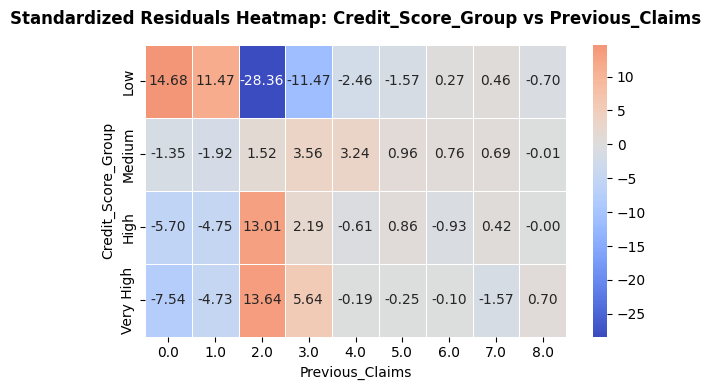

In [62]:
cs_test(cat_feature="Credit_Score_Group", target_feature="Previous_Claims", df=train_df_ma, show_residuals=True)

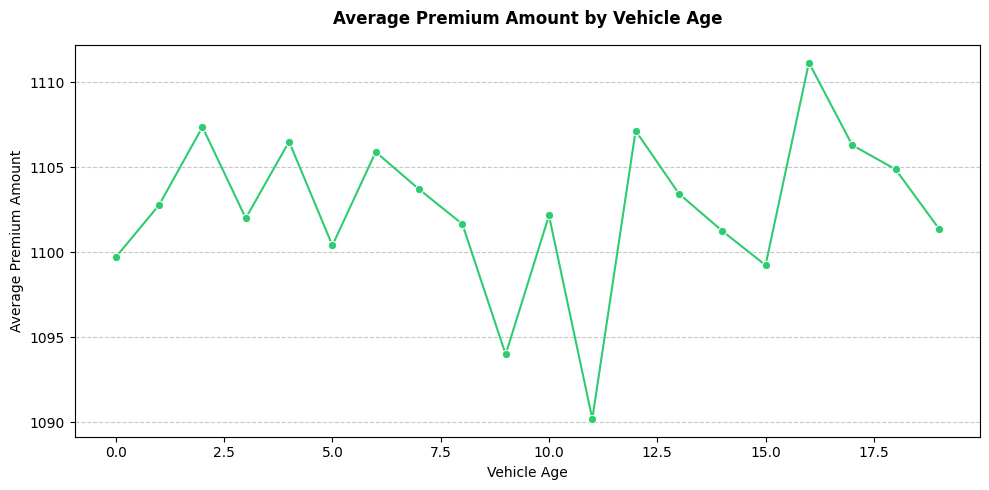

In [63]:

av_p_ag = train_df_ma.groupby("Vehicle_Age")["Premium_Amount"].mean().reset_index()

# 2. Plot the graph
plut.figure(figsize=(10, 5))

# Emerald Green Line Plot
seasalt.lineplot(data=av_p_ag, x="Vehicle_Age", y="Premium_Amount", 
                 marker="o", color="#2ecc71")

plut.title("Average Premium Amount by Vehicle Age", pad=15, weight="bold")
plut.xlabel("Vehicle Age")
plut.ylabel("Average Premium Amount")
plut.grid(axis="y", linestyle="--", alpha=0.7)
plut.tight_layout()
plut.show()

In [64]:

from tabulate import tabulate
premium_stats = train_df_ma.groupby("Policy_Type")["Premium_Amount"].agg(
    Mean_Premium="mean",
    Median_Premium="median",
    Customer_Count="count"
)
train_df_ma["Previous_Claims"] = pagedo.to_numeric(train_df_ma["Previous_Claims"], errors="coerce")
claims_by_policy = train_df_ma.groupby("Policy_Type")["Previous_Claims"].sum().rename("Total_Claims")
financial_perf = premium_stats.merge(claims_by_policy, on="Policy_Type")
financial_perf["Avg_Claims_per_Customer"] = financial_perf["Total_Claims"] / financial_perf["Customer_Count"]
show(tabulate(financial_perf.reset_index(), headers="keys", tablefmt="fancy_grid", showindex=False))

╒═══════════════╤════════════════╤══════════════════╤══════════════════╤════════════════╤═══════════════════════════╕
│ Policy_Type   │   Mean_Premium │   Median_Premium │   Customer_Count │   Total_Claims │   Avg_Claims_per_Customer │
╞═══════════════╪════════════════╪══════════════════╪══════════════════╪════════════════╪═══════════════════════════╡
│ Basic         │        1103.45 │              874 │           398554 │         279514 │                  0.70132  │
├───────────────┼────────────────┼──────────────────┼──────────────────┼────────────────┼───────────────────────────┤
│ Comprehensive │        1102.61 │              873 │           399600 │         279427 │                  0.699267 │
├───────────────┼────────────────┼──────────────────┼──────────────────┼────────────────┼───────────────────────────┤
│ Premium       │        1101.58 │              870 │           401846 │         279278 │                  0.694988 │
╘═══════════════╧════════════════╧══════════════════╧═══

In [65]:
train_df_ma["Policy_Month"] = train_df_ma["Policy_Start_Date"].dt.month
train_df_ma["Policy_Weekday"] = train_df_ma["Policy_Start_Date"].dt.day_name()

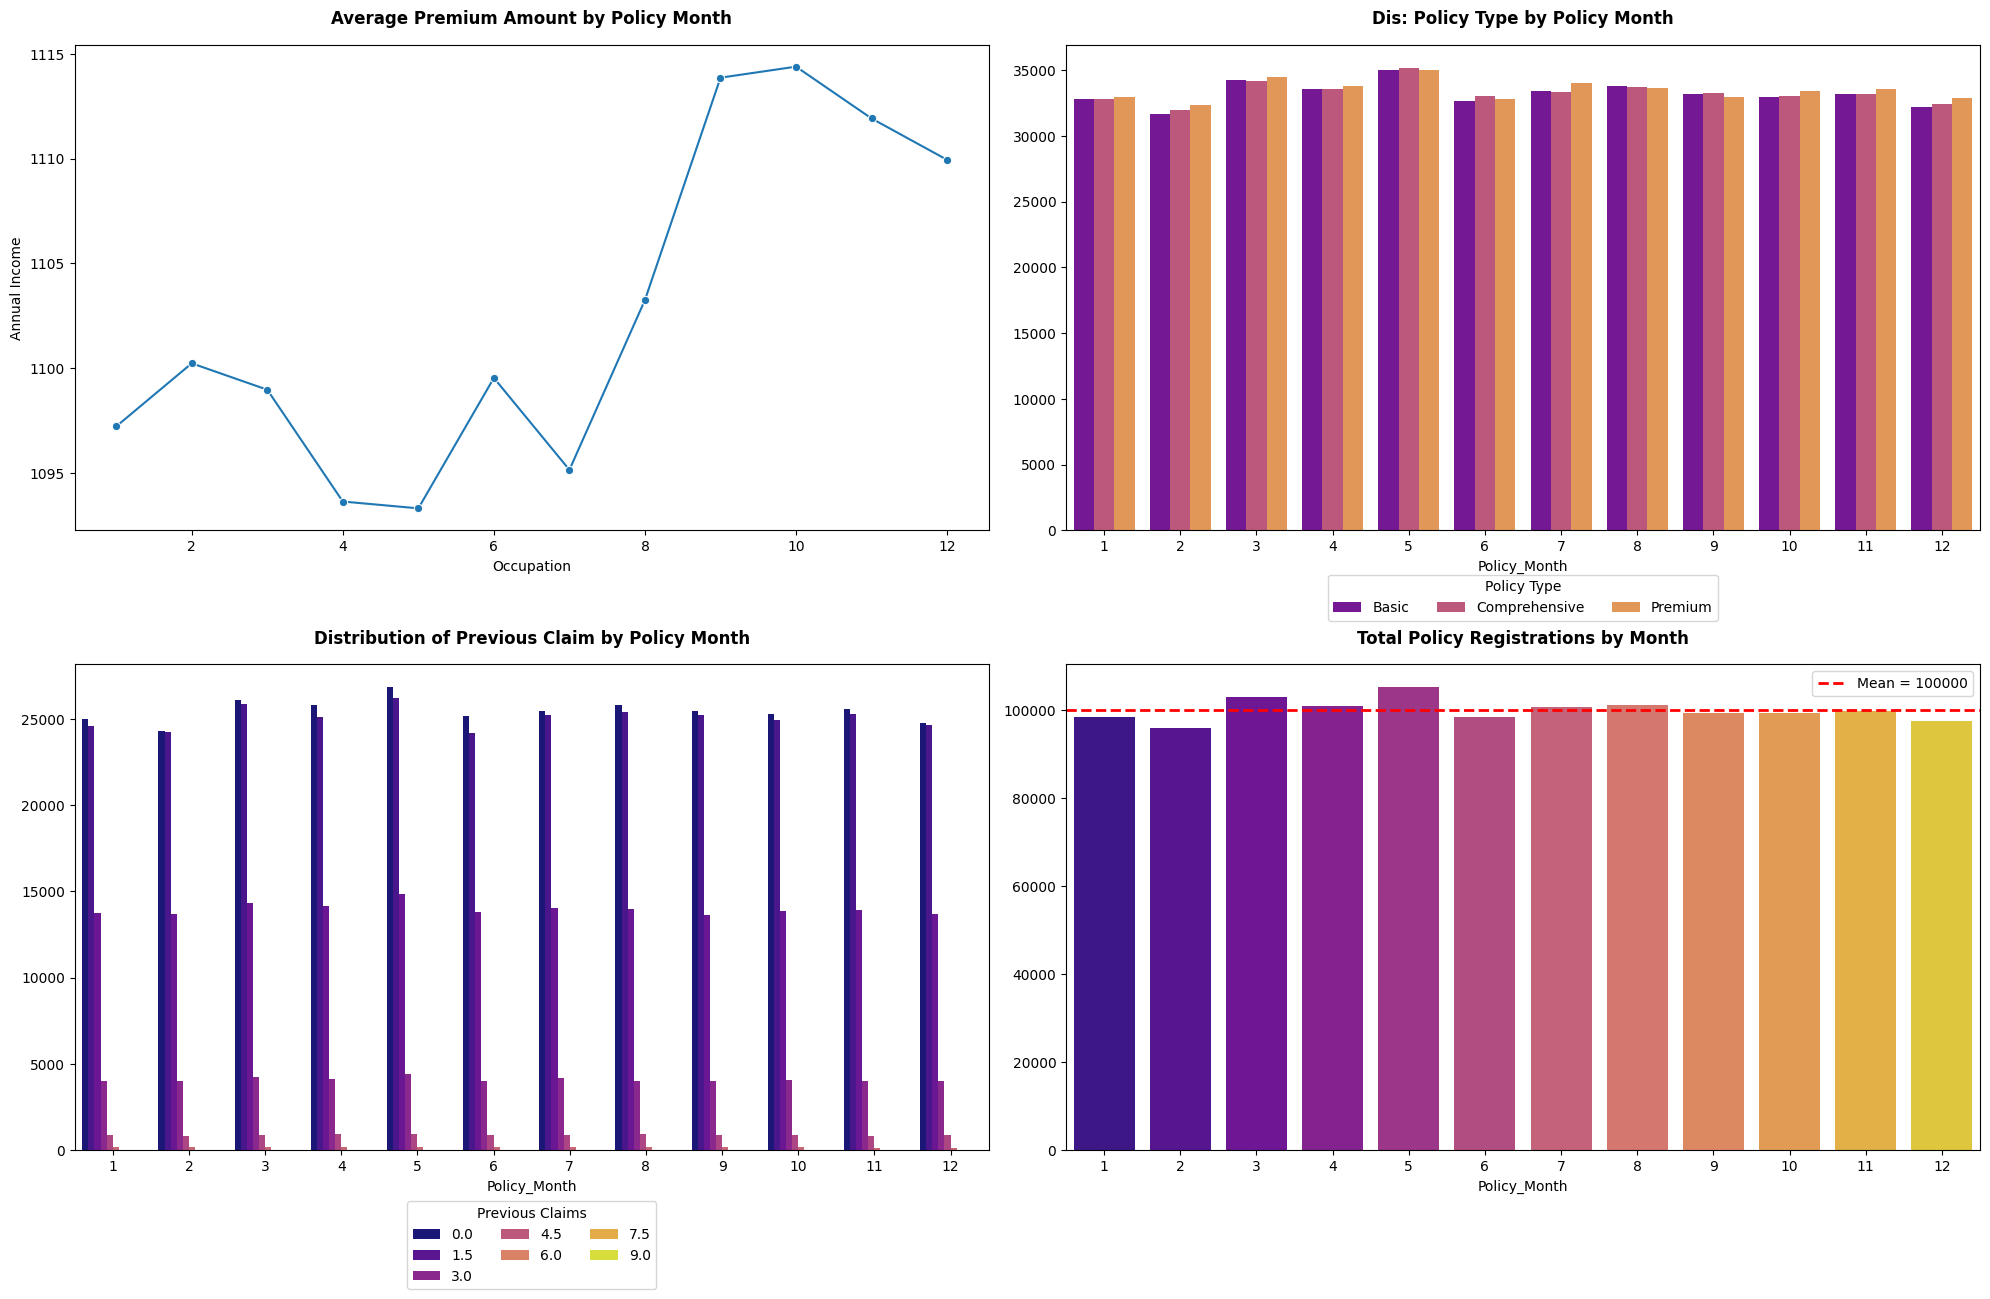

In [66]:
fuga1, ax = plut.subplots(2, 2, figsize=(20, 13))
av_p_mo = train_df_ma.groupby("Policy_Month")["Premium_Amount"].mean().reset_index()
seasalt.lineplot(
    data=av_p_mo,
    y="Premium_Amount",
    x="Policy_Month",
    ax=ax[0, 0],
    marker="o"
)
ax[0, 0].set_xlabel("Occupation")
ax[0, 0].set_ylabel("Annual Income")
ax[0, 0].set_title("Average Premium Amount by Policy Month", pad=15, weight = "bold")

seasalt.countplot(
    data=train_df_ma,
    x="Policy_Month",
    hue="Policy_Type",
    ax=ax[0, 1],
    palette="plasma"
)
ax[0, 1].set_xlabel("Policy_Month")
ax[0, 1].set_ylabel("")
ax[0, 1].set_title("Dis: Policy Type by Policy Month", pad=15, weight = "bold")
ax[0, 1].legend(title="Policy Type", loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3)

seasalt.countplot(
    data=train_df_ma,
    x="Policy_Month",
    hue="Previous_Claims",
    ax=ax[1, 0],
    palette="plasma"
)
ax[1, 0].set_xlabel("Policy_Month")
ax[1, 0].set_ylabel("")
ax[1, 0].set_title("Distribution of Previous Claim by Policy Month", pad=15, weight = "bold")
ax[1, 0].legend(title="Previous Claims", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

seasalt.countplot(
    data=train_df_ma,
    x="Policy_Month",
    ax=ax[1, 1],
    palette="plasma"
)

m_coun = train_df_ma["Policy_Month"].value_counts().sort_index()
mean_c = m_coun.mean()

ax[1, 1].axhline(mean_c, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_c:.0f}")
ax[1, 1].legend(loc="upper right")

ax[1, 1].set_xlabel("Policy_Month")
ax[1, 1].set_ylabel("")
ax[1, 1].set_title("Total Policy Registrations by Month", pad=15, weight="bold")

plut.tight_layout()
plut.show()

In [67]:
train_df_ma["Health_Score_Group"] = pagedo.qcut(
    train_df_ma["Health_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

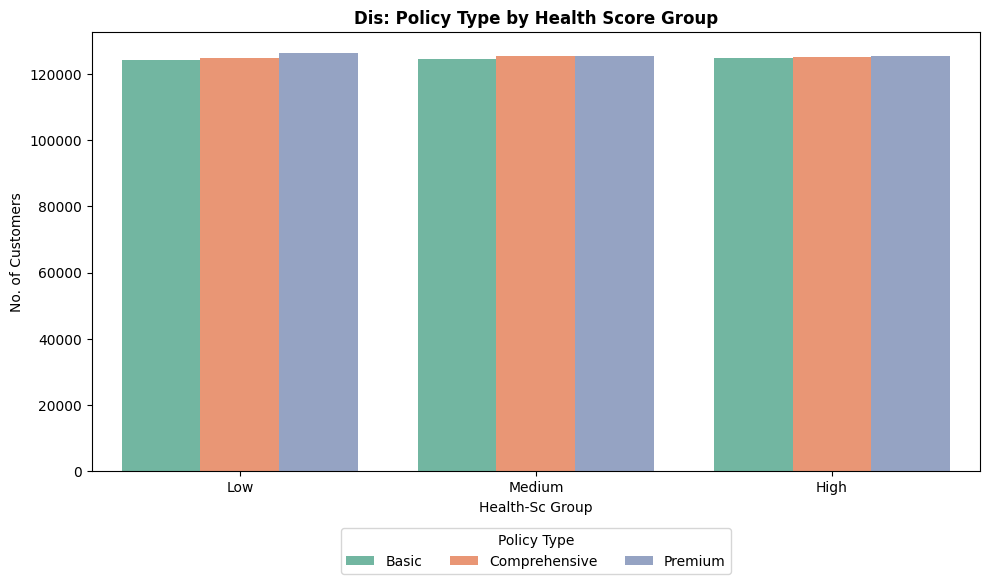

In [68]:
plut.figure(figsize=(10, 6))

seasalt.countplot(data=train_df_ma, x="Health_Score_Group", hue="Policy_Type", 
                  palette="Set2")

plut.title("Dis: Policy Type by Health Score Group", weight="bold")
plut.xlabel("Health-Sc Group")
plut.ylabel("No. of Customers")
plut.legend(title="Policy Type", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plut.tight_layout()
plut.show()


um__num ChiSquare Test for Ind. : 'Health_Score_Group' vs. 'Policy_Type'
ChiSq Stats: 7.548
DOF : 4
PValue: 0.109610
 When Pvalue is greater than or equal to 0.05 , we fail to reject Ho:
→ No significant association between 'Health_Score_Group' and 'Policy_Type'.

um__num Reisduals ( Standardization ):
Policy_Type         Basic  Comprehensive  Premium
Health_Score_Group                               
Low                 -0.93          -0.74     1.66
Medium              -0.19           0.80    -0.61
High                 1.12          -0.06    -1.05


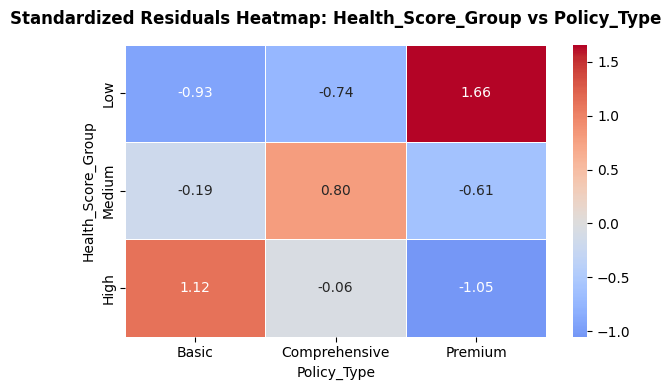

In [69]:
cs_test(cat_feature="Health_Score_Group", target_feature="Policy_Type", df=train_df_ma, show_residuals=True)

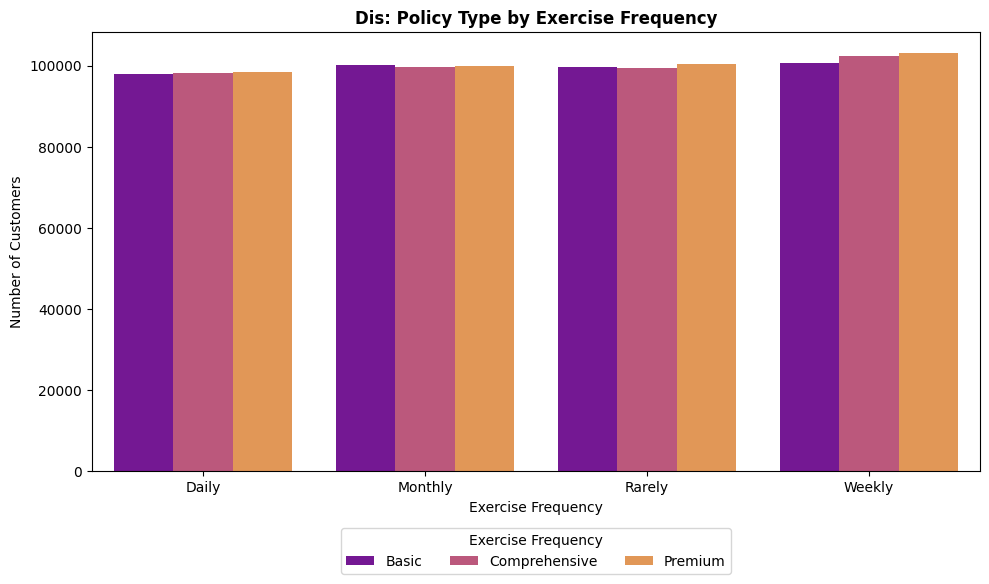

In [70]:
plut.figure(figsize=(10, 6))
seasalt.countplot(data=train_df_ma, x="Exercise_Frequency", hue="Policy_Type", palette="plasma")
plut.title("Dis: Policy Type by Exercise Frequency", weight="bold")
plut.xlabel("Exercise Frequency")
plut.ylabel("Number of Customers")
plut.legend(title="Exercise Frequency", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plut.tight_layout()
plut.show()


um__num ChiSquare Test for Ind. : 'Exercise_Frequency' vs. 'Policy_Type'
ChiSq Stats: 22.514
DOF : 6
PValue: 0.000977
   When Pvalue is less than 0.05 , we reject the null hypothesis (H₀): 
-> There is a significant association between 'Exercise_Frequency' and 'Policy_Type'.

um__num Reisduals ( Standardization ):
Policy_Type         Basic  Comprehensive  Premium
Exercise_Frequency                               
Daily                0.22           0.14    -0.36
Monthly              2.26          -0.51    -1.74
Rarely               0.48          -0.65     0.17
Weekly              -2.93           1.01     1.91


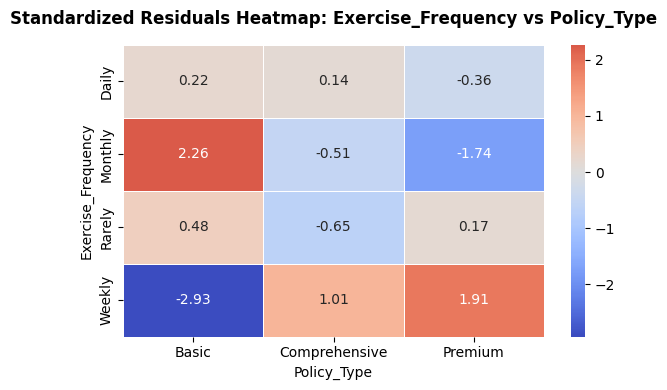

In [71]:
cs_test(cat_feature="Exercise_Frequency", target_feature="Policy_Type", df=train_df_ma, show_residuals=True)

##### CUSTOMER FEEDBACK VERSUS GENDER 

In [72]:
trai_d_m_poor = train_df_ma[train_df_ma["Customer_Feedback"] == "Poor"]
trai_d_m_poor["Gender"].value_counts(normalize=True) * 100

Gender
Male      50.192268
Female    49.807732
Name: proportion, dtype: float64

##### CUSTOMER FEEDBACK VERSUS OCCUPATION

In [73]:
trai_d_m_poor["Occupation"].value_counts(normalize=True) * 100

Occupation
Self-Employed    33.678221
Employed         33.632607
Unemployed       32.689172
Name: proportion, dtype: float64

##### CUSTOMER FEEDBACK VERSUS LOCATION

In [74]:
trai_d_m_poor["Location"].value_counts(normalize=True) * 100

Location
Suburban    33.562173
Rural       33.472430
Urban       32.965397
Name: proportion, dtype: float64

##### Customer_Feedback vs Credit_Score

Median Scores:
   Customer_Feedback  Median_Score
0           Average         594.5
1              Good         594.0
2              Poor         595.0


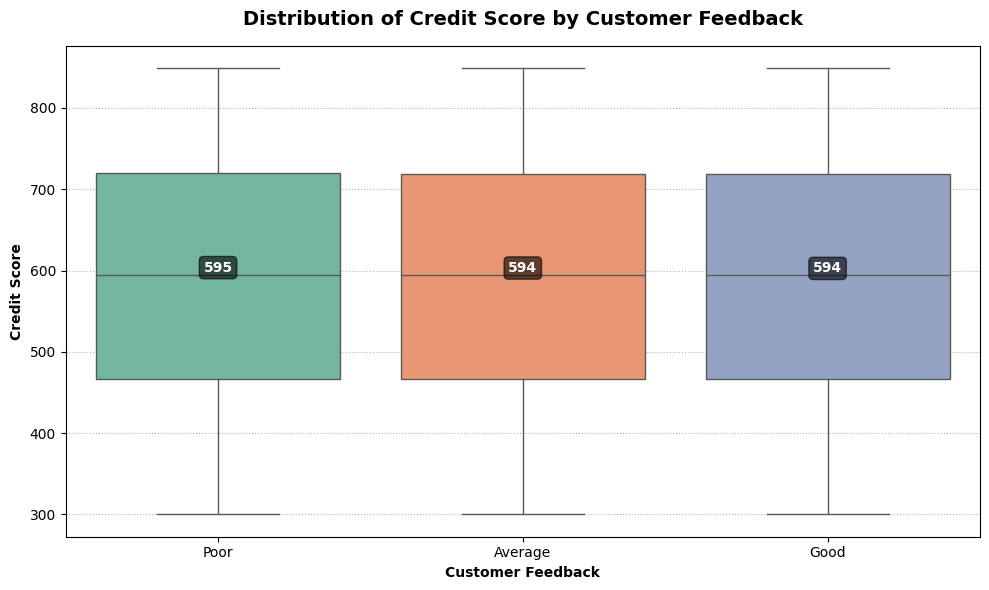

 D’Agostino and Pearson Normality Test for 'Credit_Score' across 'Customer_Feedback' grpo
num__num
 Group: Poor (num__num = 332138)
  Statistic : 133512.214
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Average (num__num = 334834)
  Statistic : 134899.964
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Good (num__num = 326861)
  Statistic : 132108.620
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Credit_Score ~ Customer_Feedback
Kruskal-Wallis H-statistic: 2.338
p-value: 0.31067927752170943

um__num No significant difference found (p >= 0.05)


In [75]:
import matplotlib.pyplot as plut
import seaborn as seasalt

medi_cf = train_df_ma.groupby("Customer_Feedback")["Credit_Score"].median().reset_index()
medi_cf.columns = ["Customer_Feedback", "Median_Score"]
show("Median Scores:\n", medi_cf)

order = ["Poor", "Average", "Good"]

plut.figure(figsize=(10, 6))

ax = seasalt.boxplot(data=train_df_ma, y="Credit_Score", x="Customer_Feedback", 
                     order=order, palette="Set2")

plut.title("Distribution of Credit Score by Customer Feedback", pad=15, weight="bold", fontsize=14)
plut.xlabel("Customer Feedback", weight="bold")
plut.ylabel("Credit Score", weight="bold")
ax.grid(axis='y', linestyle=':', alpha=0.6, color='gray') 

for i, category in enumerate(order):
    median_val = medi_cf.loc[medi_cf["Customer_Feedback"] == category, "Median_Score"].values[0]
    
    ax.text(i, median_val, f'{int(median_val)}', 
            ha='center', va='bottom', 
            fontweight='bold', color='white', fontsize=10,
            bbox=dict(facecolor='black', alpha=0.6, pad=2, boxstyle='round,pad=0.3'))

plut.tight_layout()
plut.show()

p_stat_tes(total_categories=3, feat="Customer_Feedback", training_dta=train_df_ma, target_feature="Credit_Score")

##### Customer_Feedback vs Health_Score

  Customer_Feedback  Median_Score
0           Average     24.579971
1              Good     24.611790
2              Poor     24.505968


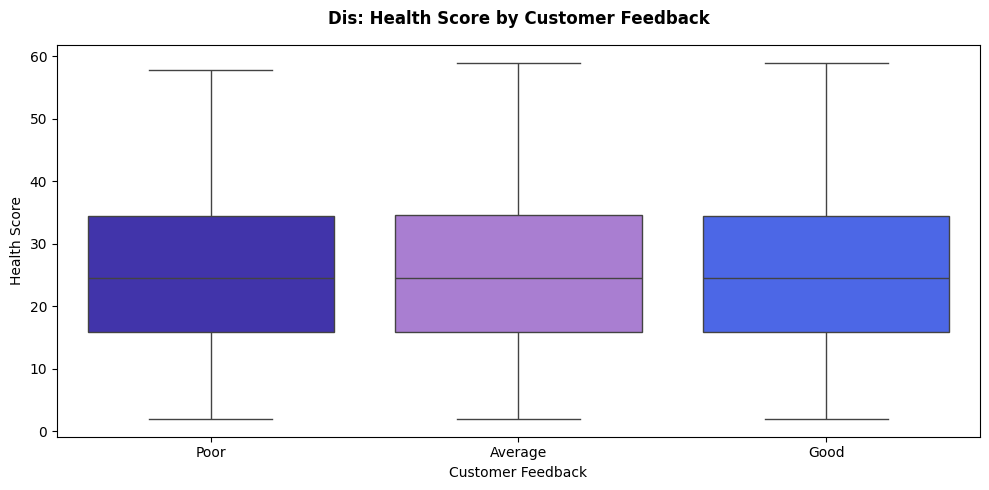

 D’Agostino and Pearson Normality Test for 'Health_Score' across 'Customer_Feedback' grpo
num__num
 Group: Poor (num__num = 352512)
  Statistic : 32201.048
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Average (num__num = 354399)
  Statistic : 33161.857
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Good (num__num = 346075)
  Statistic : 30563.668
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Health_Score ~ Customer_Feedback
Kruskal-Wallis H-statistic: 2.078
p-value: 0.35378171343425624

um__num No significant difference found (p >= 0.05)


In [76]:
medi_cf_hs = train_df_ma.groupby("Customer_Feedback")["Health_Score"].median().reset_index()
medi_cf_hs.columns = ["Customer_Feedback", "Median_Score"]
show(medi_cf_hs)
my_custom_colors = ["#3220BE", "#A970DF", "#3357FF"]

plut.figure(figsize=(10, 5))
ax = seasalt.boxplot(data=train_df_ma, y = "Health_Score", x = "Customer_Feedback", order=order,
                   palette=my_custom_colors)
plut.title("Dis: Health Score by Customer Feedback", pad=15, weight = "bold")
plut.xlabel("Customer Feedback")
plut.ylabel("Health Score")
plut.tight_layout()
plut.show()

p_stat_tes(total_categories=3, feat="Customer_Feedback", training_dta=train_df_ma, target_feature="Health_Score")

##### Customer_Feedback vs Policy_Type

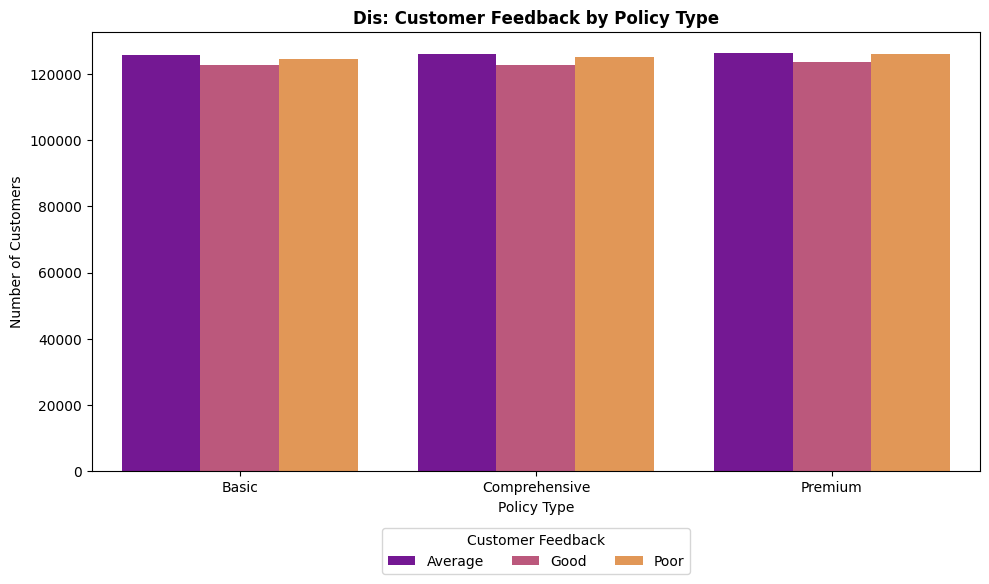


um__num ChiSquare Test for Ind. : 'Customer_Feedback' vs. 'Policy_Type'
ChiSq Stats: 2.977
DOF : 4
PValue: 0.561762
 When Pvalue is greater than or equal to 0.05 , we fail to reject Ho:
→ No significant association between 'Customer_Feedback' and 'Policy_Type'.

um__num Reisduals ( Standardization ):
Policy_Type        Basic  Comprehensive  Premium
Customer_Feedback                               
Average             0.62           0.16    -0.77
Good                0.33          -0.65     0.32
Poor               -0.95           0.49     0.46


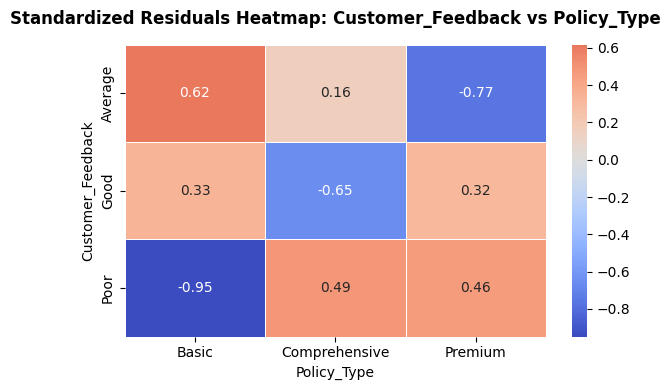

In [77]:
plut.figure(figsize=(10, 6))
seasalt.countplot(data=train_df_ma, x="Policy_Type", hue="Customer_Feedback", palette="plasma")
plut.title("Dis: Customer Feedback by Policy Type", weight="bold")
plut.xlabel("Policy Type")
plut.ylabel("Number of Customers")
plut.legend(title="Customer Feedback", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plut.tight_layout()
plut.show()

cs_test(cat_feature="Customer_Feedback", target_feature="Policy_Type", df=train_df_ma, show_residuals=True)

##### CUSTOMER FEEDBACK VS PREVIOUS CLAIMS 

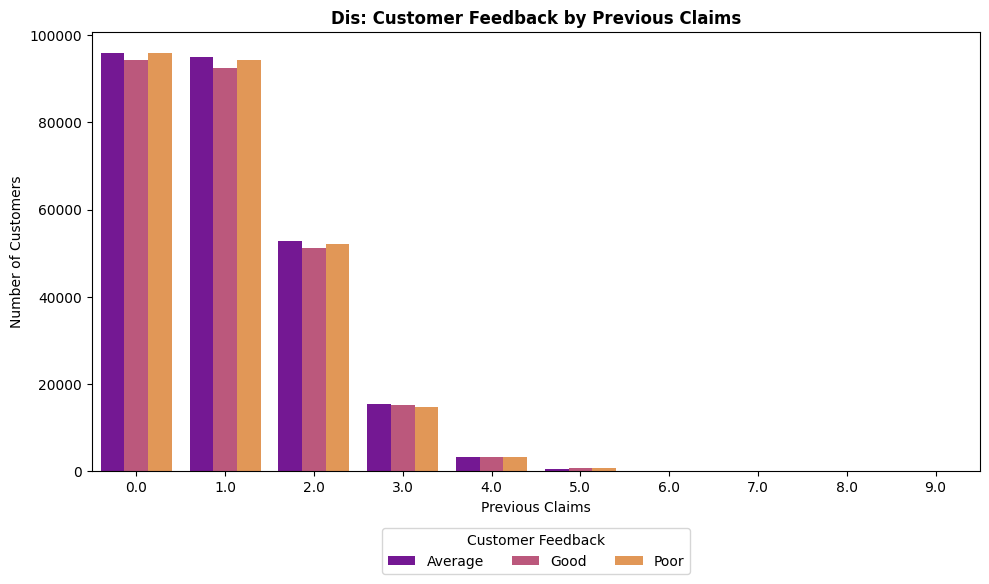


um__num ChiSquare Test for Ind. : 'Customer_Feedback' vs. 'Previous_Claims'
ChiSq Stats: 37.766
DOF : 18
PValue: 0.004159
   When Pvalue is less than 0.05 , we reject the null hypothesis (H₀): 
-> There is a significant association between 'Customer_Feedback' and 'Previous_Claims'.

um__num Reisduals ( Standardization ):
Previous_Claims     0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0
Customer_Feedback                                                            
Average           -1.31  0.52  1.10  0.37 -0.17 -2.29  1.05  0.66  1.72 -0.58
Good               0.41 -1.01 -0.73  2.17  0.86  1.89 -0.93 -0.66 -0.20 -0.57
Poor               0.91  0.49 -0.38 -2.53 -0.68  0.43 -0.12 -0.01 -1.53  1.15


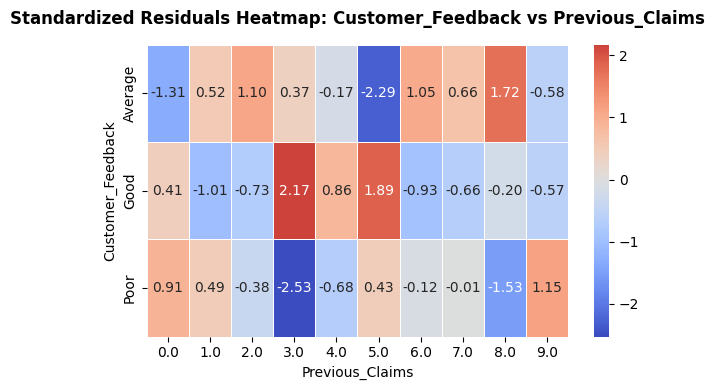

In [78]:
plut.figure(figsize=(10, 6))
seasalt.countplot(data=train_df_ma, x="Previous_Claims", hue="Customer_Feedback", palette="plasma")
plut.title("Dis: Customer Feedback by Previous Claims", weight="bold")
plut.xlabel("Previous Claims")
plut.ylabel("Number of Customers")
plut.legend(title="Customer Feedback", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)
plut.tight_layout()
plut.show()

cs_test(cat_feature="Customer_Feedback", target_feature="Previous_Claims", df=train_df_ma, show_residuals=True)

#### Which location contributes the most to total premium revenue? Which area poses the highest risk?

   Location  Median_Income
0     Rural        23937.0
1  Suburban        23981.0
2     Urban        23891.0


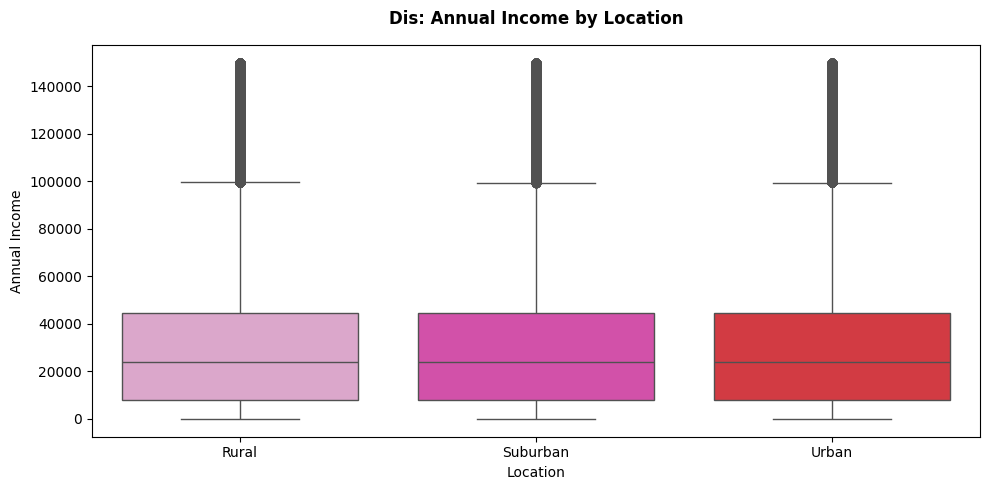

 D’Agostino and Pearson Normality Test for 'Annual_Income' across 'Location' grpo
num__num
 Group: Urban (num__num = 382599)
  Statistic : 93285.690
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Rural (num__num = 386109)
  Statistic : 94308.602
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Suburban (num__num = 386343)
  Statistic : 93760.507
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Annual_Income ~ Location
Kruskal-Wallis H-statistic: 0.515
p-value: 0.7731742778600299

um__num No significant difference found (p >= 0.05)


In [79]:
mbi = train_df_ma.groupby("Location")["Annual_Income"].median().reset_index()
mbi.columns = ["Location", "Median_Income"]
show(mbi)
my_custom_colors = ["#E49ECE", "#E73CB1", "#EB222C"]
plut.figure(figsize=(10, 5))
ax = seasalt.boxplot(data=train_df_ma, y = "Annual_Income", x = "Location",
                   palette=my_custom_colors)
plut.title("Dis: Annual Income by Location", pad=15, weight = "bold")
plut.xlabel("Location")
plut.ylabel("Annual Income")
plut.tight_layout()
plut.show()

p_stat_tes(total_categories=3, feat="Location", training_dta=train_df_ma, target_feature="Annual_Income")

## Handling Missing Value

In [80]:
for col in numerical_feats:
    training_dta[col] = training_dta[col].fillna(training_dta[col].median())
    testing_dta[col] = testing_dta[col].fillna(testing_dta[col].median())

In [81]:

cat_numeric_cols = ["Number_of_Dependents", "Previous_Claims", "Insurance_Duration"]

for col in cat_numeric_cols:
    mode_v = training_dta[col].mode(dropna=True)[0] 
    training_dta[col] = training_dta[col].fillna(mode_v)
    mode_v = testing_dta[col].mode(dropna=True)[0]  
    testing_dta[col] = testing_dta[col].fillna(mode_v)

In [82]:
cat_cols = ["Marital_Status", "Occupation", "Customer_Feedback"]

for col in cat_cols:
    if pagedo.api.types.is_categorical_dtype(training_dta[col]):
        training_dta[col] = training_dta[col].cat.add_categories("Unknown")
        testing_dta[col] = testing_dta[col].cat.add_categories("Unknown")

    training_dta[col] = training_dta[col].fillna("Unknown")
    testing_dta[col] = testing_dta[col].fillna("Unknown")

In [83]:
def print_missing_summary(df, dataset_name=None):
  row_tot = len(df)

  miss_d = df.isnull().sum().reset_index()
  miss_d.columns = ["Feature", "Missing_Count"]
  miss_d = miss_d[miss_d["Missing_Count"] > 0]
  miss_d["Missing_%"] = (miss_d["Missing_Count"] / row_tot * 100).round(2)
  miss_d = miss_d.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

  total_missing = miss_d["Missing_Count"].sum()

  show("^" * 40)
  if dataset_name:
      show(f" Summary for missing vals: {dataset_name}")
  else:
      show(" Summary missing vals:")
  show("^" * 40)

  if total_missing == 0:
      show(f"   There are no missing values in  {row_tot:,} rows.")
  else:
      try:
          from tabulate import tabulate
          show(tabulate(miss_d, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
      except ImportError:
          show(miss_d.to_string(index=False))

      show(f"\nnum__num  Total missing values: {total_missing:,} out of {row_tot:,} rows.")

show("Training Data missing values : ")
print_missing_summary(training_dta, dataset_name="Train Set")

show("\nTesting Data missing values : ")
print_missing_summary(testing_dta, dataset_name="Test Set")

Training Data missing values : 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 Summary for missing vals: Train Set
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
   There are no missing values in  1,200,000 rows.

Testing Data missing values : 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 Summary for missing vals: Test Set
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
   There are no missing values in  800,000 rows.


## Feature Engineering

In [84]:

training_dta["Previous_Claims"] = pagedo.to_numeric(training_dta["Previous_Claims"], errors="coerce")
testing_dta["Previous_Claims"] = pagedo.to_numeric(testing_dta["Previous_Claims"], errors="coerce")
training_dta["Number_of_Dependents"] = pagedo.to_numeric(training_dta["Number_of_Dependents"], errors="coerce")
testing_dta["Number_of_Dependents"] = pagedo.to_numeric(testing_dta["Number_of_Dependents"], errors="coerce")
training_dta["Insurance_Duration"] = pagedo.to_numeric(training_dta["Insurance_Duration"], errors="coerce")
testing_dta["Insurance_Duration"] = pagedo.to_numeric(testing_dta["Insurance_Duration"], errors="coerce")

In [85]:

training_dta["Income_Group"] = pagedo.qcut(training_dta["Annual_Income"], q=4, labels=["Low Income", "Mid-Low", "Mid-High", "High Income"])
testing_dta["Income_Group"] = pagedo.qcut(testing_dta["Annual_Income"], q=4, labels=["Low Income", "Mid-Low", "Mid-High", "High Income"])

training_dta["Age_Group"] = pagedo.cut(training_dta["Age"], bins=[0, 25, 35, 45, 55, 100], labels=["<25", "25–35", "35–45", "45–55", ">55"])
testing_dta["Age_Group"] = pagedo.cut(testing_dta["Age"], bins=[0, 25, 35, 45, 55, 100], labels=["<25", "25–35", "35–45", "45–55", ">55"])

training_dta["Health_Risk_Level"] = pagedo.qcut(training_dta["Health_Score"], q=3, labels=["High Risk", "Medium Risk", "Low Risk"])
testing_dta["Health_Risk_Level"] = pagedo.qcut(testing_dta["Health_Score"], q=3, labels=["High Risk", "Medium Risk", "Low Risk"])

training_dta["Has_Claimed"] = (training_dta["Previous_Claims"] > 0).astype(int)
testing_dta["Has_Claimed"] = (testing_dta["Previous_Claims"] > 0).astype(int)

training_dta["Is_Smoker_At_Risk"] = ((training_dta["Smoking_Status"] == "Yes") & (training_dta["Health_Score"] < training_dta["Health_Score"].median())).astype(int)
testing_dta["Is_Smoker_At_Risk"] = ((testing_dta["Smoking_Status"] == "Yes") & (testing_dta["Health_Score"] < testing_dta["Health_Score"].median())).astype(int)
def mmseaso(month):
    if month in [12, 1, 2]: return "Winter"
    if month in [3, 4, 5]: return "Spring"
    if month in [6, 7, 8]: return "Summer"
    return "Autumn"
training_dta["Policy_Month"] = training_dta["Policy_Start_Date"].dt.month
training_dta["Policy_Season"] = training_dta["Policy_Month"].apply(mmseaso)

testing_dta["Policy_Month"] = testing_dta["Policy_Start_Date"].dt.month
testing_dta["Policy_Season"] = testing_dta["Policy_Month"].apply(mmseaso)

training_dta["Dependents_per_Year"] = training_dta["Number_of_Dependents"] / (training_dta["Insurance_Duration"] + 1)
testing_dta["Dependents_per_Year"] = testing_dta["Number_of_Dependents"] / (testing_dta["Insurance_Duration"] + 1)

training_dta["Is_Negative_Feedback"] = training_dta["Customer_Feedback"].apply(lambda x: x == "Poor")
testing_dta["Is_Negative_Feedback"] = testing_dta["Customer_Feedback"].apply(lambda x: x == "Poor")

training_dta["Age_Health"] = training_dta["Age"] * training_dta["Health_Score"]
testing_dta["Age_Health"] = testing_dta["Age"] * testing_dta["Health_Score"]

training_dta["Income_Credit"] = training_dta["Annual_Income"] * training_dta["Credit_Score"]
testing_dta["Income_Credit"] = testing_dta["Annual_Income"] * testing_dta["Credit_Score"]

training_dta["Dependents_Duration"] = training_dta["Number_of_Dependents"] * training_dta["Insurance_Duration"]
testing_dta["Dependents_Duration"] = testing_dta["Number_of_Dependents"] * testing_dta["Insurance_Duration"]

training_dta["VehicleAge_Claims"] = training_dta["Vehicle_Age"] * training_dta["Previous_Claims"]
testing_dta["VehicleAge_Claims"] = testing_dta["Vehicle_Age"] * testing_dta["Previous_Claims"]

training_dta["Health_Claims"] = training_dta["Health_Score"] * training_dta["Previous_Claims"]
testing_dta["Health_Claims"] = testing_dta["Health_Score"] * testing_dta["Previous_Claims"]

In [86]:
list_feature_convert = ["Previous_Claims", "Number_of_Dependents", "Insurance_Duration", "Policy_Season"]
catu_convo(df=training_dta, cat_features=list_feature_convert)
catu_convo(df=testing_dta, cat_features=list_feature_convert)
training_dta.drop(columns="Policy_Start_Date", axis=1, inplace=True)
testing_dta.drop(columns="Policy_Start_Date", axis=1, inplace=True)

In [87]:
training_dta["Smoking_Status"] = training_dta["Smoking_Status"].map({"Yes": 1, "No": 0}).astype(bool)
testing_dta["Smoking_Status"] = testing_dta["Smoking_Status"].map({"Yes": 1, "No": 0}).astype(bool)
bool_cols = ["Has_Claimed", "Is_Smoker_At_Risk", "Is_Negative_Feedback"]
for col in bool_cols:
    training_dta[col] = training_dta[col].astype(bool)
    testing_dta[col] = testing_dta[col].astype(bool)
show("Train_data :")
training_dta.info()
show("\nTest_data:")
testing_dta.info()

Train_data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 33 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Age                   1200000 non-null  float64 
 1   Gender                1200000 non-null  category
 2   Annual_Income         1200000 non-null  float64 
 3   Marital_Status        1200000 non-null  category
 4   Number_of_Dependents  1200000 non-null  category
 5   Education_Level       1200000 non-null  category
 6   Occupation            1200000 non-null  category
 7   Health_Score          1200000 non-null  float64 
 8   Location              1200000 non-null  category
 9   Policy_Type           1200000 non-null  category
 10  Previous_Claims       1200000 non-null  category
 11  Vehicle_Age           1200000 non-null  float64 
 12  Credit_Score          1200000 non-null  float64 
 13  Insurance_Duration    1200000 non-null  category
 14  Custo

In [88]:
cat_features = training_dta.select_dtypes(include=["category"]).columns.tolist()
cat_features.extend(["Is_Smoker_At_Risk", "Is_Negative_Feedback", "Has_Claimed"])
cat_features

['Gender',
 'Marital_Status',
 'Number_of_Dependents',
 'Education_Level',
 'Occupation',
 'Location',
 'Policy_Type',
 'Previous_Claims',
 'Insurance_Duration',
 'Customer_Feedback',
 'Exercise_Frequency',
 'Property_Type',
 'Income_Group',
 'Age_Group',
 'Health_Risk_Level',
 'Policy_Season',
 'Is_Smoker_At_Risk',
 'Is_Negative_Feedback',
 'Has_Claimed']

In [89]:
numerical_feats = training_dta.select_dtypes(exclude=["category"]).columns.tolist()
numerical_feats.remove("Is_Negative_Feedback")
numerical_feats.remove("Is_Smoker_At_Risk")
numerical_feats.remove("Has_Claimed")
numerical_feats

['Age',
 'Annual_Income',
 'Health_Score',
 'Vehicle_Age',
 'Credit_Score',
 'Smoking_Status',
 'Premium_Amount',
 'Policy_Month',
 'Dependents_per_Year',
 'Age_Health',
 'Income_Credit',
 'Dependents_Duration',
 'VehicleAge_Claims',
 'Health_Claims']

### New-cat features by prem_amount 

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Income_Group' grpo
num__num
 Group: Mid-Low (num__num = 322471)
  Statistic : 77143.217
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Mid-High (num__num = 277575)
  Statistic : 68537.835
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: High Income (num__num = 299946)
  Statistic : 46008.768
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Low Income (num__num = 300008)
  Statistic : 47956.597
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Income_Group
Kruskal-Wallis H-statistic: 6517.099
p-value: 0.0
 Significant difference found. Running Dunn's Post-Hoc Test...
                Low Income        Mid-Low       Mid-High  High 

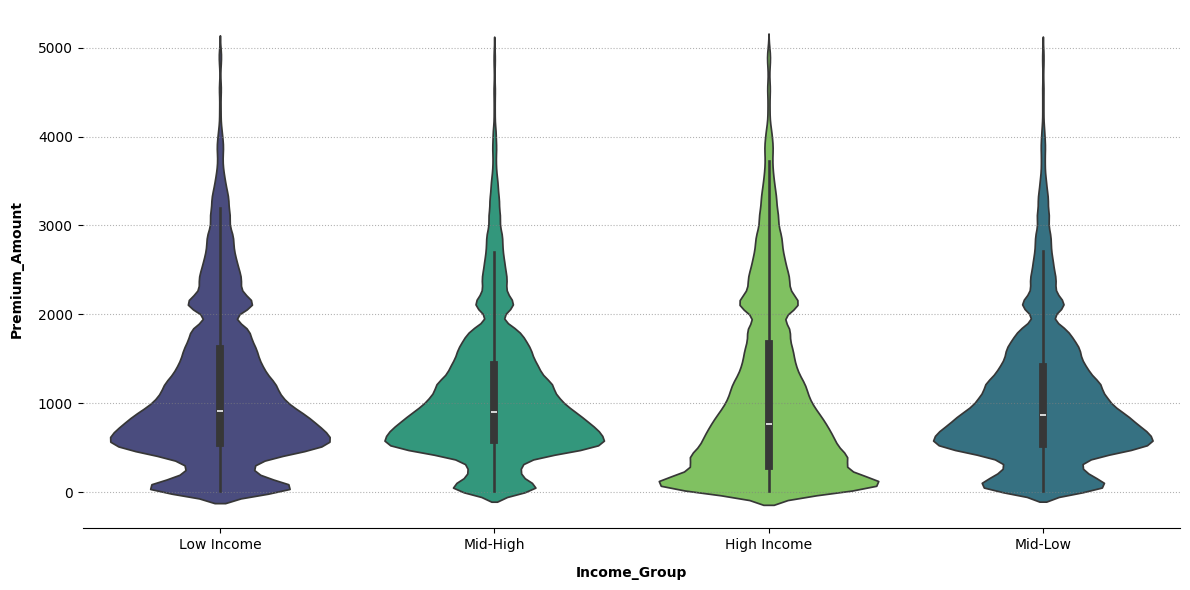

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Age_Group' grpo
num__num
 Group: <25 (num__num = 196616)
  Statistic : 37805.862
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 35–45 (num__num = 270925)
  Statistic : 53114.431
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 25–35 (num__num = 250429)
  Statistic : 48398.738
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: 45–55 (num__num = 252959)
  Statistic : 49736.945
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: >55 (num__num = 229071)
  Statistic : 44900.486
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Age_Group
Kruskal-Wallis H-statistic: 12.303
p-va

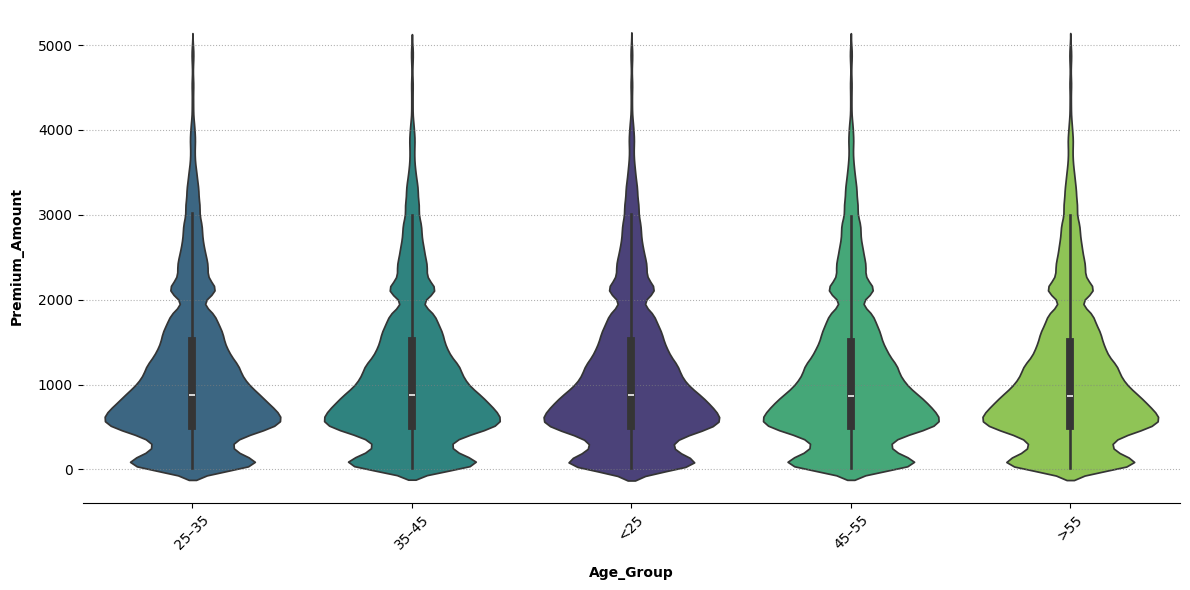

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Health_Risk_Level' grpo
num__num
 Group: Medium Risk (num__num = 399992)
  Statistic : 81261.712
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: High Risk (num__num = 400008)
  Statistic : 77949.061
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Low Risk (num__num = 400000)
  Statistic : 74798.519
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Health_Risk_Level
Kruskal-Wallis H-statistic: 242.930
p-value: 1.772016570637472e-53
 Significant difference found. Running Dunn's Post-Hoc Test...
                High Risk   Medium Risk      Low Risk
High Risk    1.000000e+00  2.612894e-08  3.515161e-53
Medium Risk  2.612894e-08  1.000000e+00  1.244892e-21
Low Risk     3.515161e-53  1.244892e-21 

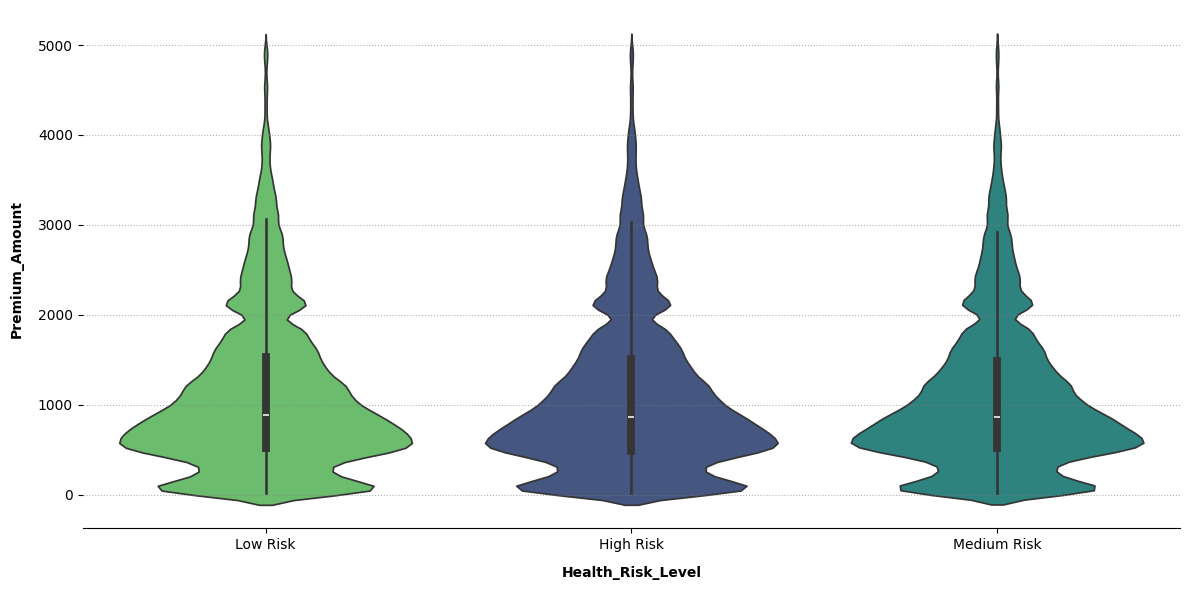

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Has_Claimed' grpo
num__num
 Group: True (num__num = 530538)
  Statistic : 96384.308
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: False (num__num = 669462)
  Statistic : 137904.278
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Mann–Whitney U Test for 'Premium_Amount' by 'Has_Claimed'
um__num
H₀: The distributions are equal.
H₁: The distributions are different.
um__num
U statistic : 183769300552.0
p-value     : 5.61898311257737e-236

num__num  Result: Significant difference between the two groups (Rejecting H₀).
  Group 'True' has a higher median 'Premium_Amount' than Group 'False'.


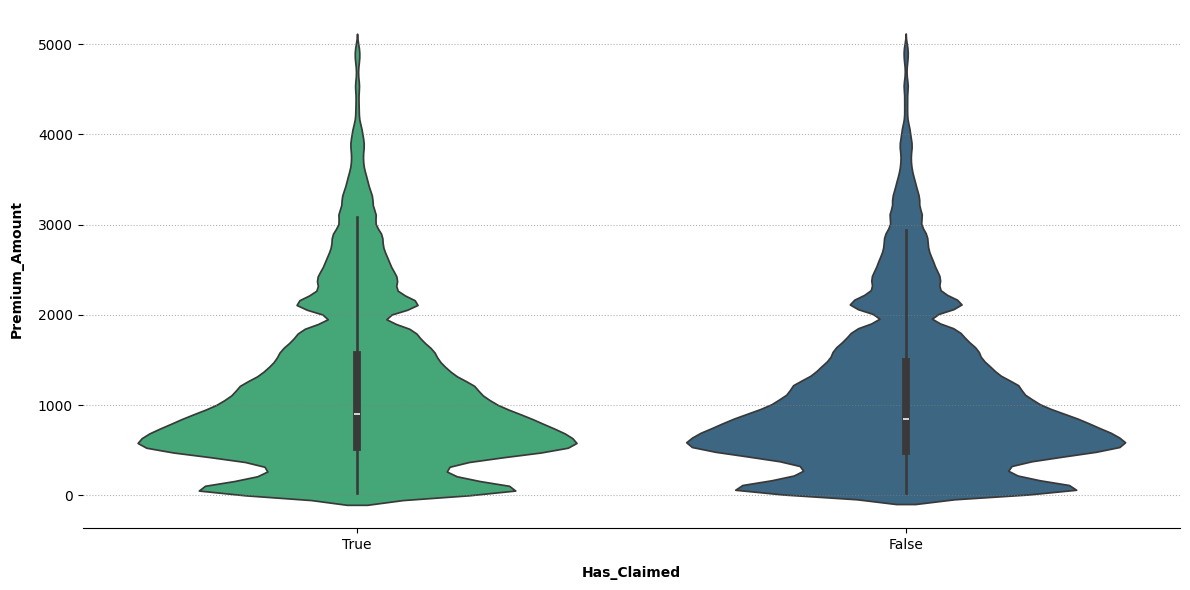

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Is_Smoker_At_Risk' grpo
num__num
 Group: False (num__num = 917784)
  Statistic : 178125.465
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: True (num__num = 282216)
  Statistic : 55857.144
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Mann–Whitney U Test for 'Premium_Amount' by 'Is_Smoker_At_Risk'
um__num
H₀: The distributions are equal.
H₁: The distributions are different.
um__num
U statistic : 131461581048.5
p-value     : 5.9547967748576855e-34

num__num  Result: Significant difference between the two groups (Rejecting H₀).
  Group 'False' has a higher median 'Premium_Amount' than Group 'True'.


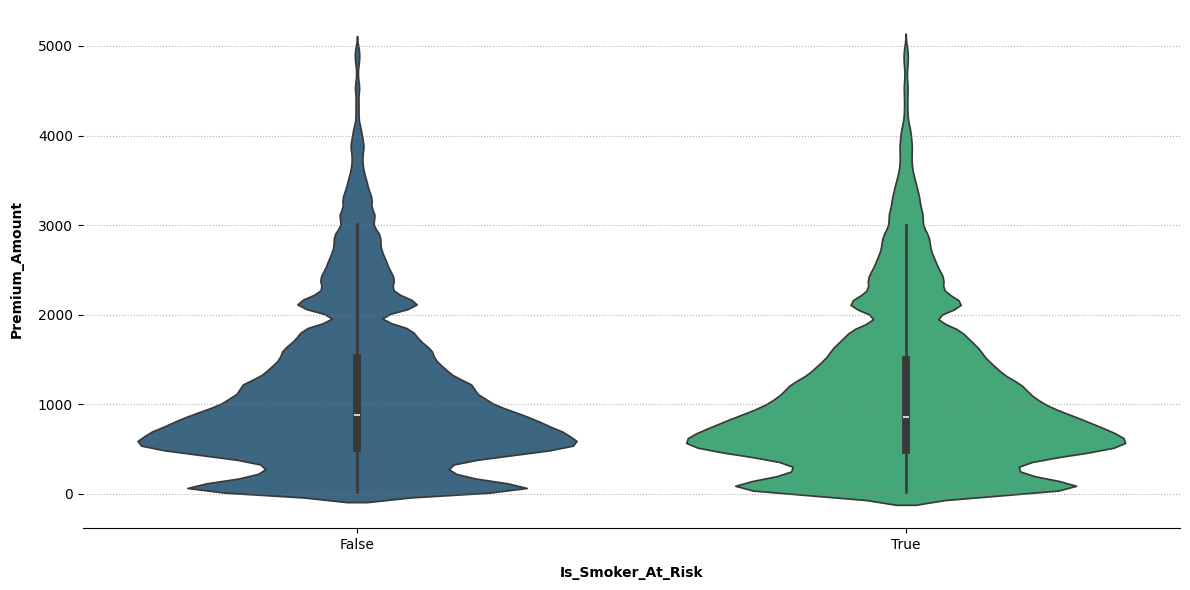

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Policy_Season' grpo
num__num
 Group: Winter (num__num = 291981)
  Statistic : 57167.322
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Summer (num__num = 300349)
  Statistic : 58970.200
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Autumn (num__num = 298679)
  Statistic : 56459.901
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: Spring (num__num = 308991)
  Statistic : 61358.371
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num

um__num Kruskal-Wallis Test: Premium_Amount ~ Policy_Season
Kruskal-Wallis H-statistic: 53.012
p-value: 1.822366354153851e-11
 Significant difference found. Running Dunn's Post-Hoc Test...
              Autumn        Spring        Summer    Winte

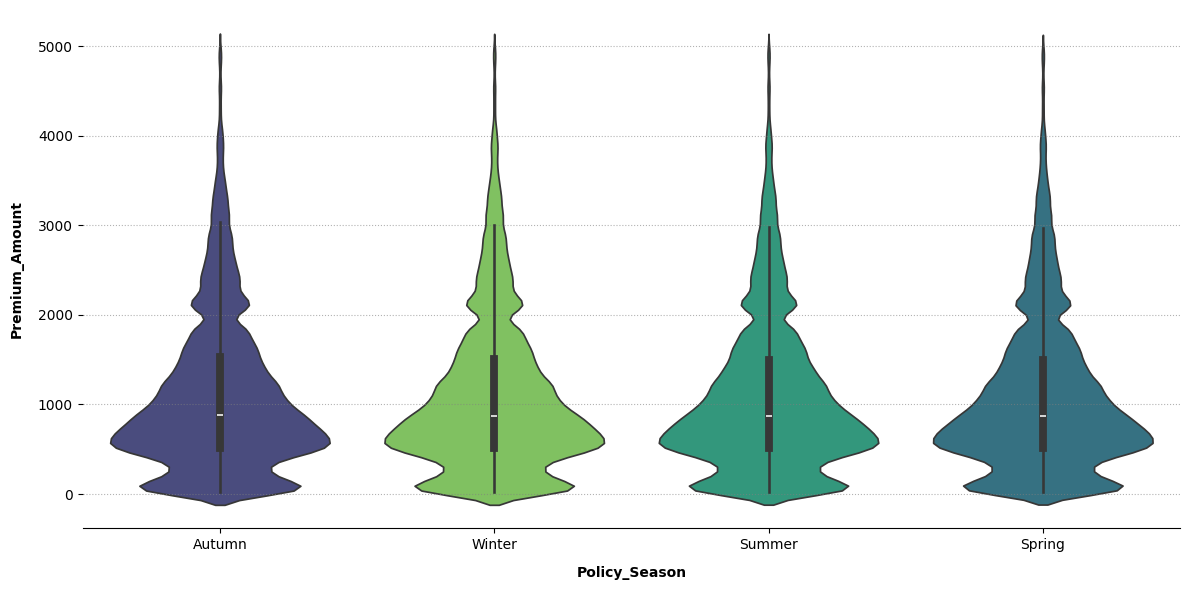

 D’Agostino and Pearson Normality Test for 'Premium_Amount' across 'Is_Negative_Feedback' grpo
num__num
 Group: True (num__num = 375518)
  Statistic : 74444.393
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Group: False (num__num = 824482)
  Statistic : 159495.032
  p-value   : 0.00000
  : Interpretation: Data does not appear to follow a normal distribution.
num__num
 Mann–Whitney U Test for 'Premium_Amount' by 'Is_Negative_Feedback'
um__num
H₀: The distributions are equal.
H₁: The distributions are different.
um__num
U statistic : 154140916438.5
p-value     : 0.00016458197242940527

num__num  Result: Significant difference between the two groups (Rejecting H₀).
  Group 'False' has a higher median 'Premium_Amount' than Group 'True'.


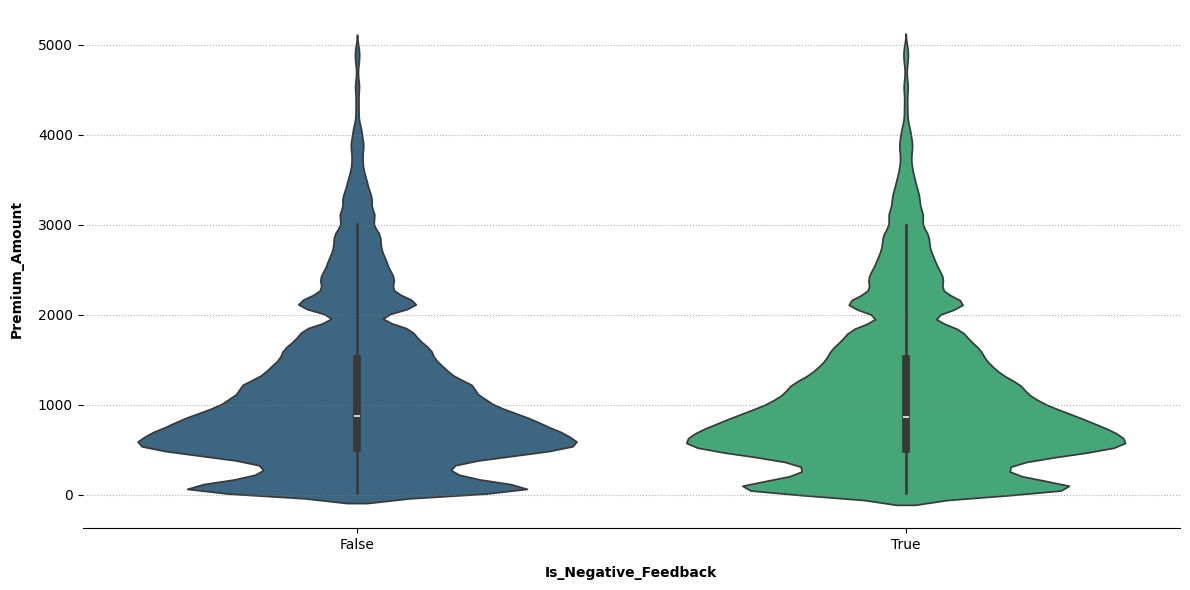

In [90]:

def p_stat_tes(total_categories, feat, training_dta=training_dta, target_feature="Premium_Amount"):
    try:
        calc_normaltest(cat_feature=feat, num_feature=target_feature, df=training_dta)
        if total_categories == 2:
            cal_manwhi(dataframe=training_dta, categorical_feature=feat, num_feature=target_feature)
        else:
            perform_kruskal_test(df=training_dta, categorical_feature=feat, numeric_feature=target_feature)
    except NameError as e:
        show(f"  (Note: Statistical function missing: {e}. Skipping test for now.)")
def p_cat_d_prem_amoun(feat, training_dta=training_dta, target_feature="Premium_Amount"):
    if feat not in training_dta.columns:
        show(f"Skipping '{feat}': Feature not found in training_dta.")
        return
    d_sum_f = training_dta.groupby(by=feat, as_index=False).agg(
        Count=(target_feature, "count"),
        Mean_Premium=(target_feature, "mean"),
        Median_Premium=(target_feature, "median"),
        Std_Premium=(target_feature, "std")
    ).sort_values(by="Mean_Premium", ascending=False)
    
    d_sum = [
        ("Total Categories", f"{d_sum_f.shape[0]}"),
        ("Overall Target Mean", f"{training_dta[target_feature].mean():.2f}")
    ]
    html_sum = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in d_sum]) + "</ul>"
    display(HTML(html_sum))

    display(d_sum_f.style.format("{:.2f}", subset=["Mean_Premium", "Median_Premium", "Std_Premium"])
            .bar(subset=["Count"], color="#376cd6")
            .background_gradient(subset=["Mean_Premium"], cmap="Reds")
            .hide(axis='index')
            .set_table_attributes('style="width:80%; margin:auto; margin-bottom:20px;"'))

    p_stat_tes(total_categories=d_sum_f.shape[0], feat=feat, 
               training_dta=training_dta, target_feature=target_feature)

    fuga1, ax = plut.subplots(figsize=(12, 6))
    
    order = d_sum_f[feat].tolist()
    
    seasalt.violinplot(x=feat, y=target_feature, data=training_dta, 
                       order=order, hue=feat, legend=False,
                       palette="viridis", ax=ax)

    ax.set_xlabel(feat, fontweight='bold', labelpad=10)
    ax.set_ylabel(target_feature, fontweight='bold', labelpad=10)

    ax.grid(axis="y", linestyle=":", alpha=0.6, color="gray")
    seasalt.despine(left=True)
    
    if len(order) > 4:
        ax.tick_params(axis='x', rotation=45)

    plut.tight_layout()
    plut.show()

new_features = ["Income_Group", "Age_Group", "Health_Risk_Level", "Has_Claimed", 
                "Is_Smoker_At_Risk", "Policy_Season", "Is_Negative_Feedback"]

for feat in new_features:
    display(HTML(f"<div style='background-color:#e8f4f8; padding:10px; border-left:5px solid blue; margin-top:30px; margin-bottom:10px;'>"
                 f"<h2 style='text-align:center; font-size:22px; color:#2c3e50; margin:0;'>"
                 f"<b>Distribution of Premium Amount by {feat}</b></h2></div>"))
    
    p_cat_d_prem_amoun(feat=feat)

### Correlation Analysis of Numerical Features

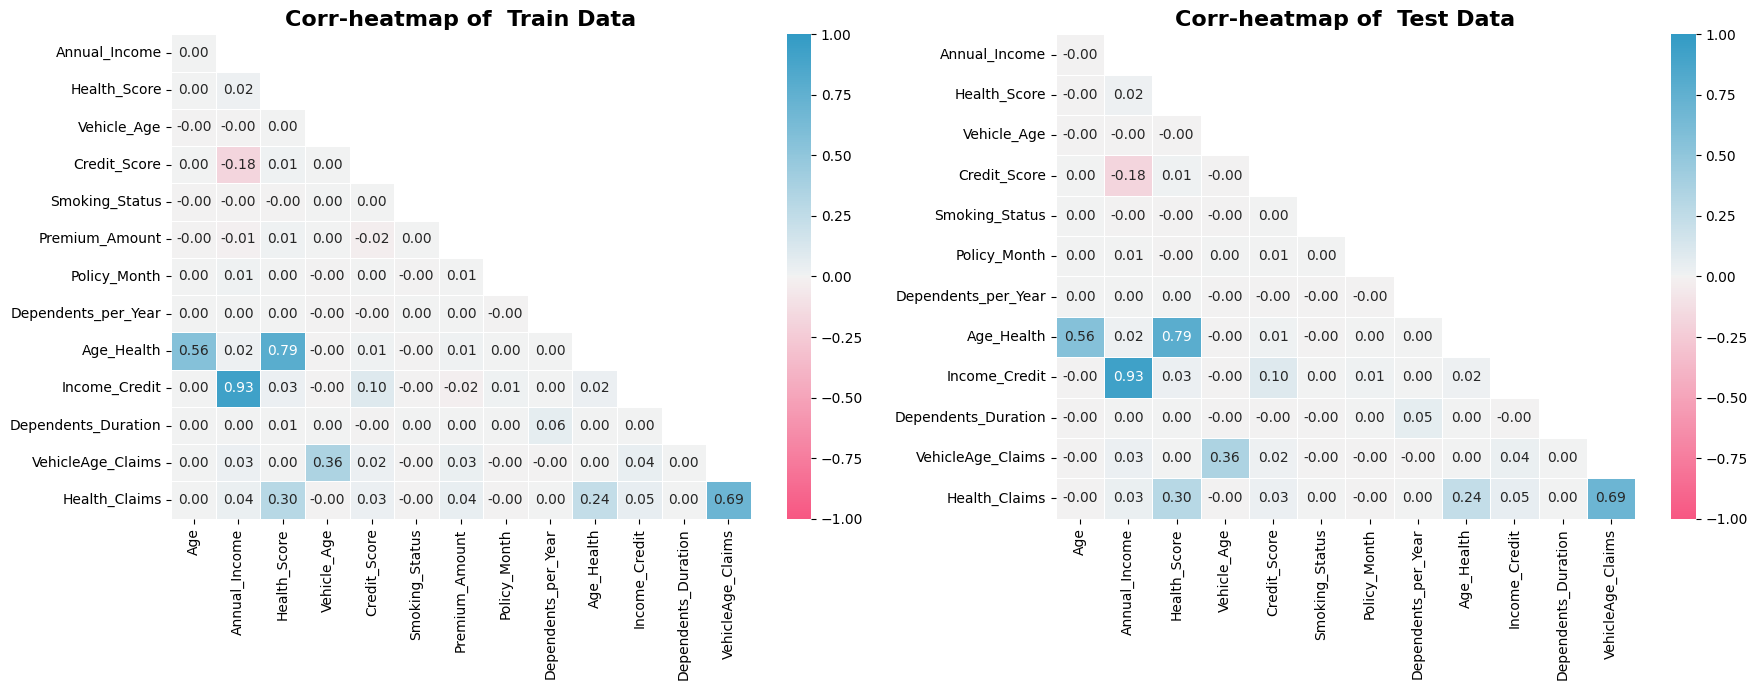

In [91]:
def pl_Corr_new(features, training_dta, testing_dta, train_name="Train Data", test_name="Test Data"):
    ctrai = training_dta[features].corr()
    if "Premium_Amount" in features:
        features.remove("Premium_Amount")
    ctes = testing_dta[features].corr()

    mk_tra = norepo.triu(norepo.ones_like(ctrai, dtype=bool))
    ad_mk_tra = mk_tra[1:, :-1]
    ad_cereal_cr_trai = ctrai.iloc[1:, :-1]

    mk_tes = norepo.triu(norepo.ones_like(ctes, dtype=bool))
    ad_mk_tes = mk_tes[1:, :-1]
    ad_cereal_cr_tes = ctes.iloc[1:, :-1]

    cmap = seasalt.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fuga1, ax = plut.subplots(1, 2, figsize=(18, 7))

    seasalt.heatmap(data=ad_cereal_cr_trai, mask=ad_mk_tra,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Corr-heatmap of  {train_name}", fontsize=16, weight="bold")

    seasalt.heatmap(data=ad_cereal_cr_tes, mask=ad_mk_tes,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Corr-heatmap of  {test_name}", fontsize=16, weight="bold")

    plut.tight_layout()
    plut.show()

pl_Corr_new(features=numerical_feats,training_dta=training_dta, testing_dta=testing_dta)

## SKEWNESS HANDLING HERE 

In [92]:
numerical_feats.append("Premium_Amount")
sk_fea_tra, sk_d_tra = check_skewness(data=training_dta, dataset_name="Train Data", numerical_features=numerical_feats)


num__num Skewness for Train Data:
**********************************************************************
Feature                   | Skewness   | Remark
**********************************************************************
VehicleAge_Claims         |   +2.2644 | Highly skewed
Health_Claims             |   +2.1595 | Highly skewed
Income_Credit             |   +1.8142 | Highly skewed
Annual_Income             |   +1.5230 | Highly skewed
Dependents_per_Year       |   +1.5139 | Highly skewed
Premium_Amount            |   +1.2409 | Highly skewed
Age_Health                |   +0.8735 | Moderately skewed
Dependents_Duration       |   +0.8162 | Moderately skewed
Health_Score              |   +0.3073 | Approximately symmetric
Credit_Score              |   -0.1258 | Approximately symmetric
Vehicle_Age               |   -0.0204 | Approximately symmetric
Age                       |   -0.0121 | Approximately symmetric
Policy_Month              |   +0.0065 | Approximately symmetric
Smoking_Status 

In [93]:
numerical_feats.remove("Premium_Amount")
sk_fea_tes, sk_d_tes = check_skewness(data=testing_dta, dataset_name="Test Data", numerical_features=numerical_feats)


num__num Skewness for Test Data:
**********************************************************************
Feature                   | Skewness   | Remark
**********************************************************************
VehicleAge_Claims         |   +2.2843 | Highly skewed
Health_Claims             |   +2.1555 | Highly skewed
Income_Credit             |   +1.8007 | Highly skewed
Dependents_per_Year       |   +1.5174 | Highly skewed
Annual_Income             |   +1.5168 | Highly skewed
Age_Health                |   +0.8782 | Moderately skewed
Dependents_Duration       |   +0.8167 | Moderately skewed
Health_Score              |   +0.3078 | Approximately symmetric
Credit_Score              |   -0.1261 | Approximately symmetric
Vehicle_Age               |   -0.0199 | Approximately symmetric
Age                       |   -0.0097 | Approximately symmetric
Smoking_Status            |   -0.0093 | Approximately symmetric
Policy_Month              |   +0.0068 | Approximately symmetric
------

In [94]:
from sklearn.preprocessing import PowerTransformer as ppto

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    numerical_feats=None,
    exclude_cols=None,
    dataset="Train data"

):

    df = df.copy()
    if numerical_feats is None:
        raise ValueError("`numerical_feats` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    num_col = [c for c in numerical_feats if c not in exclude_cols]

    # 2) detect ultra‑sparse
    z_r = (df[num_col] == 0).sum() / len(df)
    topzero_col = z_r[z_r > zero_threshold].index.tolist()

    skew_vals = df[num_col].apply(lambda s: skew(s.dropna()))
    skew_auto = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(skew_auto))

    transformed_cols = []
    dropped_cols     = []
    pt_dict          = {}

    for col in to_transform:
        if col in topzero_col:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: norepo.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        elif df[col].nunique() <= 5:
            continue
        else:
            pt = ppto(method="yeo-johnson")
            arr = df[[col]].values  # shape (num__num,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            pt_dict[col] = pt
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, topzero_col, skew_auto, pt_dict

In [95]:

proc_trai_df, transformed_columns, sparse_columns, skewed_columns, pt_dict_train = handle_skewed_features(
    df=training_dta, 
    numerical_feats=sk_fea_tra
)

base_features = [
    "Age", "Annual_Income", "Health_Score", "Vehicle_Age", "Credit_Score", 
    "Policy_Month", "Dependents_per_Year", "Age_Health", "Income_Credit",
    "Dependents_Duration", "VehicleAge_Claims", "Health_Claims", "Premium_Amount"
]

final_features_train = []

for feat in base_features:
    if f"PT_{feat}" in proc_trai_df.columns:
        final_features_train.append(f"PT_{feat}")
    elif f"Log_{feat}" in proc_trai_df.columns:
        final_features_train.append(f"Log_{feat}")
    elif feat in proc_trai_df.columns:
        final_features_train.append(feat)
    else:
        show(f"Warning: Could not find any version of feature '{feat}'")

sk_fea_tra, sk_d_tra = check_skewness(
    data=proc_trai_df, 
    numerical_features=final_features_train,
    dataset_name="Train data"
)


num__num Skewness for Train data:
**********************************************************************
Feature                   | Skewness   | Remark
**********************************************************************
PT_VehicleAge_Claims      |   +0.4546 | Approximately symmetric
Health_Score              |   +0.3073 | Approximately symmetric
PT_Health_Claims          |   +0.3066 | Approximately symmetric
PT_Dependents_Duration    |   -0.1347 | Approximately symmetric
Credit_Score              |   -0.1258 | Approximately symmetric
PT_Dependents_per_Year    |   +0.0795 | Approximately symmetric
PT_Annual_Income          |   -0.0719 | Approximately symmetric
PT_Income_Credit          |   -0.0693 | Approximately symmetric
PT_Premium_Amount         |   -0.0578 | Approximately symmetric
PT_Age_Health             |   -0.0332 | Approximately symmetric
Vehicle_Age               |   -0.0204 | Approximately symmetric
Age                       |   -0.0121 | Approximately symmetric
Policy_

In [96]:

processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test, pt_dict_test = handle_skewed_features(
    df=testing_dta, 
    numerical_feats=sk_fea_tes, 
    dataset="Test data"
)

base_features_test = [
    "Age", "Annual_Income", "Health_Score", "Vehicle_Age", "Credit_Score", 
    "Policy_Month", "Dependents_per_Year", "Age_Health", "Income_Credit",
    "Dependents_Duration", "VehicleAge_Claims", "Health_Claims"
]

final_features_test = []

for feat in base_features_test:
    if f"PT_{feat}" in processed_test_df.columns:
        final_features_test.append(f"PT_{feat}")
    elif f"Log_{feat}" in processed_test_df.columns:
        final_features_test.append(f"Log_{feat}")
    elif feat in processed_test_df.columns:
        final_features_test.append(feat)
    else:
        show(f"Warning: Feature '{feat}' not found in any form.")

sk_fea_tes, sk_d_tes = check_skewness(
    data=processed_test_df, 
    numerical_features=final_features_test,
    dataset_name="Test data"
)


num__num Skewness for Test data:
**********************************************************************
Feature                   | Skewness   | Remark
**********************************************************************
PT_VehicleAge_Claims      |   +0.4512 | Approximately symmetric
Health_Score              |   +0.3078 | Approximately symmetric
PT_Health_Claims          |   +0.3039 | Approximately symmetric
PT_Dependents_Duration    |   -0.1347 | Approximately symmetric
Credit_Score              |   -0.1261 | Approximately symmetric
PT_Dependents_per_Year    |   +0.0793 | Approximately symmetric
PT_Annual_Income          |   -0.0728 | Approximately symmetric
PT_Income_Credit          |   -0.0706 | Approximately symmetric
PT_Age_Health             |   -0.0327 | Approximately symmetric
Vehicle_Age               |   -0.0199 | Approximately symmetric
Age                       |   -0.0097 | Approximately symmetric
Policy_Month              |   +0.0068 | Approximately symmetric
--------

Features found for correlation: ['Age', 'PT_Annual_Income', 'Health_Score', 'Vehicle_Age', 'Credit_Score', 'Policy_Month', 'PT_Dependents_per_Year', 'PT_Age_Health', 'PT_Income_Credit', 'PT_Dependents_Duration', 'PT_VehicleAge_Claims', 'PT_Health_Claims']


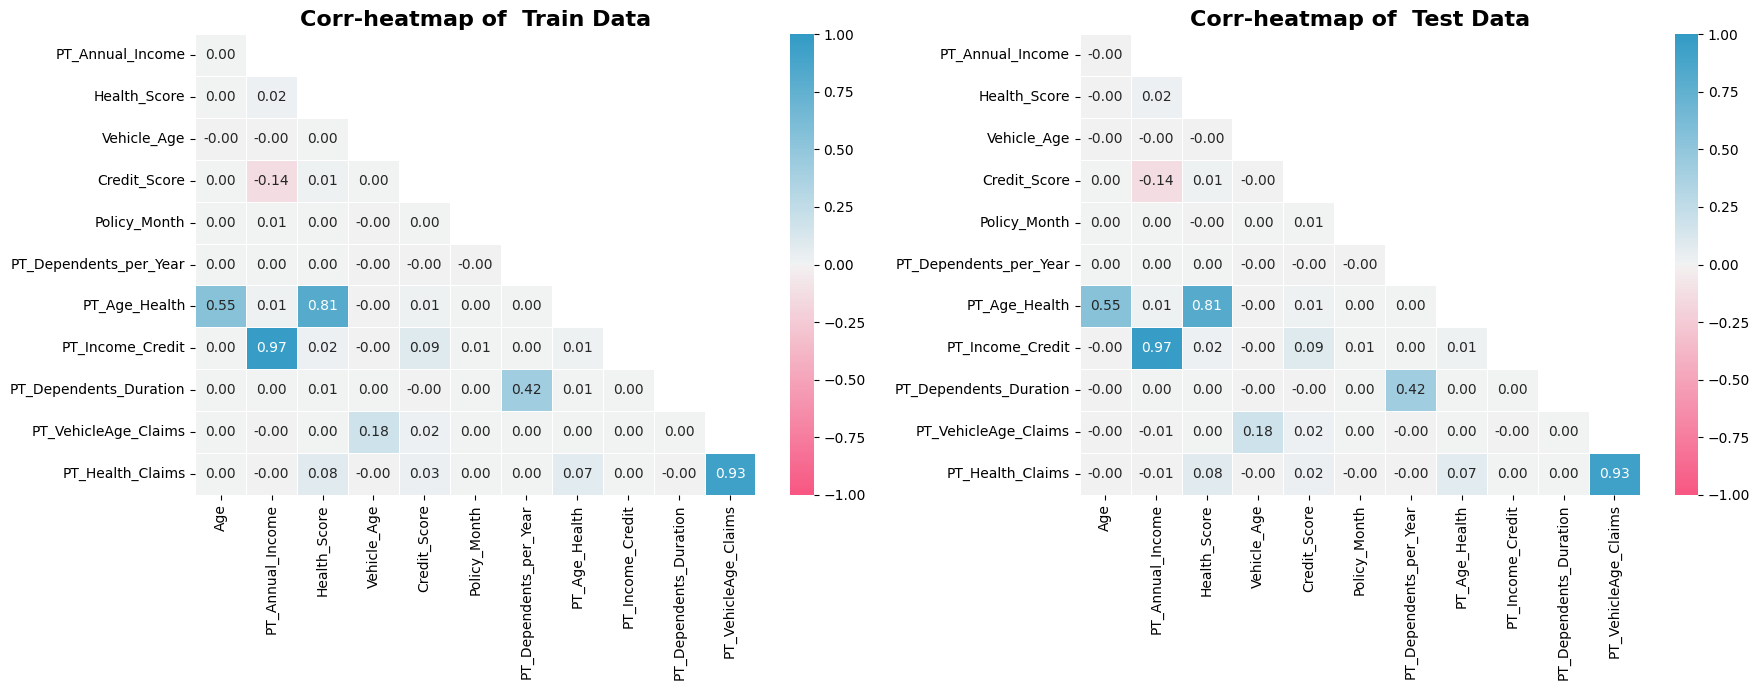

In [97]:

possible_features = [
    "Age", "Annual_Income", "Health_Score", "Vehicle_Age", "Credit_Score", 
    "Policy_Month", "Dependents_per_Year", "Age_Health", "Income_Credit",
    "Dependents_Duration", "VehicleAge_Claims", "Health_Claims", "Premium_Amount"
]

num_features_cor = []

for feat in possible_features:
    if f"PT_{feat}" in proc_trai_df.columns:
        num_features_cor.append(f"PT_{feat}")
    elif f"Log_{feat}" in proc_trai_df.columns:
        num_features_cor.append(f"Log_{feat}")
    elif feat in proc_trai_df.columns:
        num_features_cor.append(feat)

target_variants = ["Premium_Amount", "Log_Premium_Amount", "PT_Premium_Amount"]
num_features_cor = [f for f in num_features_cor if f not in target_variants]

show("Features found for correlation:", num_features_cor)

pl_Corr_new(features=num_features_cor, training_dta=proc_trai_df, testing_dta=processed_test_df)

## Create Test Set


In [98]:
# We need convert bool column to int8 to avoid to error "SimpleImputer does not support data with dtype bool".
l_f_c_in = ["Smoking_Status", "Is_Negative_Feedback", "Is_Smoker_At_Risk", "Has_Claimed"]
for col in l_f_c_in:
    if proc_trai_df[col].dtype == "bool":
        proc_trai_df[col] = proc_trai_df[col].astype("int8")
    if processed_test_df[col].dtype == "bool":
        processed_test_df[col] = processed_test_df[col].astype("int8")

# Display information about the DataFrames
show("Info-TrainData :")
proc_trai_df.info()

show("\nInfo-TestData:")
processed_test_df.info()

Info-TrainData :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   Age                     1200000 non-null  float64 
 1   Gender                  1200000 non-null  category
 2   Marital_Status          1200000 non-null  category
 3   Number_of_Dependents    1200000 non-null  category
 4   Education_Level         1200000 non-null  category
 5   Occupation              1200000 non-null  category
 6   Health_Score            1200000 non-null  float64 
 7   Location                1200000 non-null  category
 8   Policy_Type             1200000 non-null  category
 9   Previous_Claims         1200000 non-null  category
 10  Vehicle_Age             1200000 non-null  float64 
 11  Credit_Score            1200000 non-null  float64 
 12  Insurance_Duration      1200000 non-null  category
 13  Customer_Feedback       1

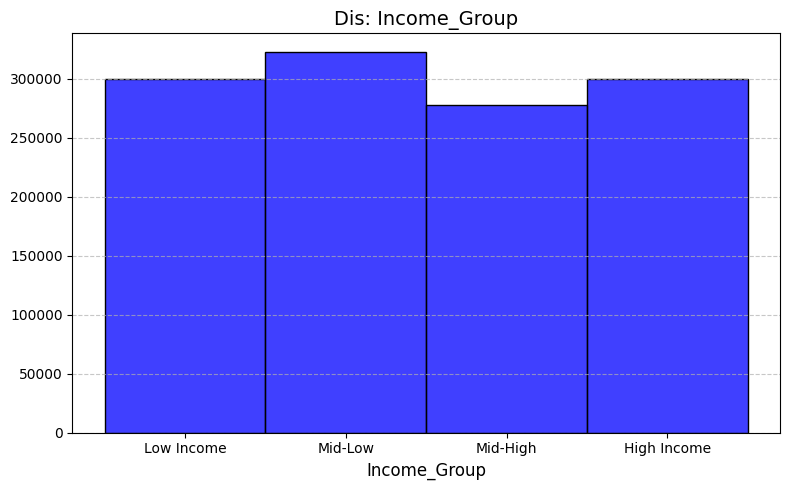

In [99]:
plut.figure(figsize=(8, 5))
seasalt.histplot(data=proc_trai_df, x="Income_Group", color="blue", edgecolor="black")

plut.title("Dis: Income_Group", fontsize=14)
plut.xlabel("Income_Group", fontsize=12)
plut.ylabel("")
plut.grid(axis="y", linestyle="--", alpha=0.7)
plut.tight_layout()
plut.show()

In [100]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(proc_trai_df, proc_trai_df["Income_Group"]):
    s_trai_set = proc_trai_df.iloc[train_index]
    s_tes_set = proc_trai_df.iloc[test_index]

## Scaling

In [101]:
train_df_new = s_trai_set.drop("PT_Premium_Amount", axis=1)
train_df_label_new = s_trai_set["PT_Premium_Amount"].copy()

In [102]:
list_feature_num_robust = ["PT_Annual_Income", "PT_Age_Health", "PT_Income_Credit"]
list_feature_num_stand = ["Age", "Health_Score", "Vehicle_Age", "Credit_Score",
                          "Policy_Month", "PT_Dependents_per_Year", "PT_Dependents_Duration", "PT_VehicleAge_Claims", "PT_Health_Claims"]
list_feature_cat_onehot = ["Gender", "Marital_Status", "Number_of_Dependents", "Education_Level", "Occupation", "Location", "Policy_Type", "Previous_Claims", "Insurance_Duration",
                           "Customer_Feedback", "Exercise_Frequency", "Property_Type", "Income_Group", "Age_Group", "Health_Risk_Level", "Policy_Season"]
list_feature_cat_keep = ["Smoking_Status", "Is_Negative_Feedback", "Is_Smoker_At_Risk", "Has_Claimed"]

In [103]:
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(train_df_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['PT_Annual_Income', 'PT_Age_Health',
                                  'PT_Income_Credit']),
                                ('num_standard',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Health_Score', 'Vehicle_Age',
                                  'Credit_Score', 'Policy_Month',
                                  'PT_Dependents_per_Year',
                                  'PT_Dependents_Duration',
                                  'PT_VehicleAge_Claims', 'P...
                                  'Occupation', 'Location', 'Policy_Type',
                                  'Previous_Claims', 'Insurance_Duration',
                                  'Customer_Feedback', 'Exercise_Frequency',
                                  'Property_Type', 'Income_Group', 'Age_Group',
                                  'Health_Risk_Level', 'Policy_Season']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Smoking_Status', 'Is_Negative_Feedback',
                                  'Is_Smoker_At_Risk', 'Has_Claimed'])])

In [104]:
train_df_new_prepared = preprocessor.transform(train_df_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_Annual_Income',
 'num_robust__PT_Age_Health',
 'num_robust__PT_Income_Credit',
 'num_standard__Age',
 'num_standard__Health_Score',
 'num_standard__Vehicle_Age',
 'num_standard__Credit_Score',
 'num_standard__Policy_Month',
 'num_standard__PT_Dependents_per_Year',
 'num_standard__PT_Dependents_Duration',
 'num_standard__PT_VehicleAge_Claims',
 'num_standard__PT_Health_Claims',
 'cat_onehot__Gender_Female',
 'cat_onehot__Gender_Male',
 'cat_onehot__Marital_Status_Divorced',
 'cat_onehot__Marital_Status_Married',
 'cat_onehot__Marital_Status_Single',
 'cat_onehot__Marital_Status_Unknown',
 'cat_onehot__Number_of_Dependents_0.0',
 'cat_onehot__Number_of_Dependents_1.0',
 'cat_onehot__Number_of_Dependents_2.0',
 'cat_onehot__Number_of_Dependents_3.0',
 'cat_onehot__Number_of_Dependents_4.0',
 "cat_onehot__Education_Level_Bachelor's",
 'cat_onehot__Education_Level_High School',
 "cat_onehot__Education_Level_Master's",
 'cat_onehot__Education_Level_PhD',
 'cat_onehot__Occupa

In [105]:
def safe_rmsle(y_true, y_pred):
    y_true = norepo.maximum(0, y_true) + 1
    y_pred = norepo.maximum(0, y_pred) + 1
    return norepo.sqrt(norepo.mean(norepo.square(norepo.log1p(y_pred) - norepo.log1p(y_true))))

rmsle_scorer = make_scorer(safe_rmsle, greater_is_better=False)

In [106]:
!pip install catboost --quiet


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
# We use some models to compare performance.
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

seed = 42
max_iter = 50000
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

models = [
    CatBoostRegressor(random_seed=seed, verbose=False),
    Lasso(alpha=0.0005, max_iter=max_iter, random_state=seed),
    Ridge(alpha=10, max_iter=max_iter, random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=seed, verbosity=0),
    LGBMRegressor(random_state=seed, verbosity=-1)
]

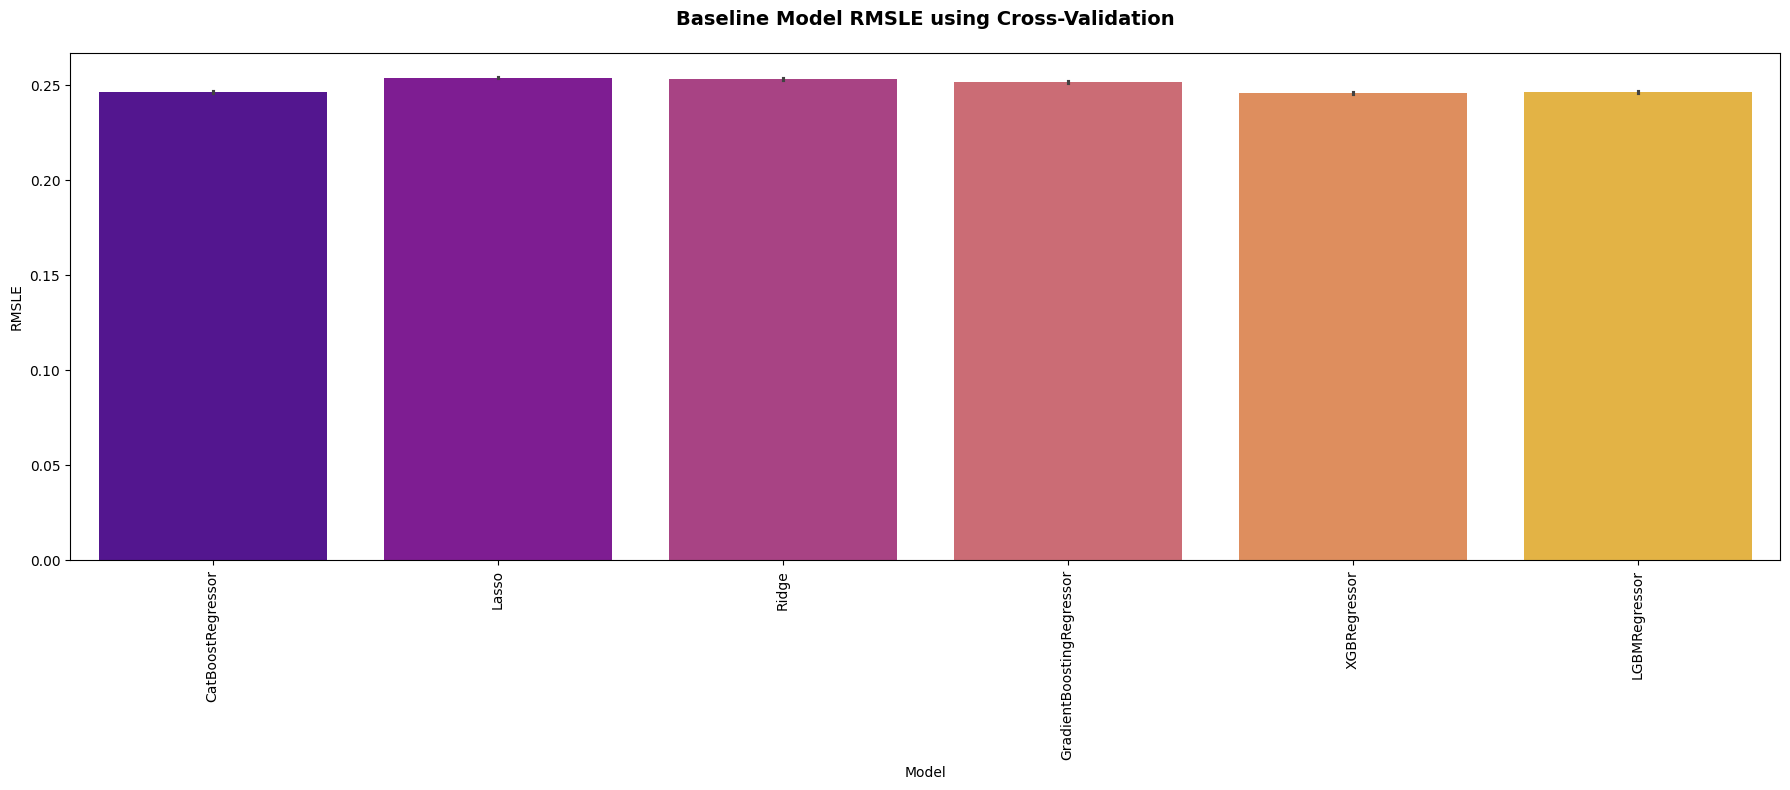

Mean  Standard Deviation
model_name                                             
XGBRegressor               0.246089            0.000604
LGBMRegressor              0.246432            0.000643
CatBoostRegressor          0.246439            0.000586
GradientBoostingRegressor  0.251867            0.000665
Ridge                      0.253088            0.000661
Lasso                      0.253921            0.000533

In [ ]:
def generate_baseline_results(models=models, X=train_df_new_prepared, y=train_df_label_new,
                              metric=rmsle_scorer, cv=kfold, plot_result=False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, -score))  

    cv_df = pagedo.DataFrame(entries, columns=["model_name", "fold_id", "rmsle_score"])

    mean = cv_df.groupby("model_name")["rmsle_score"].mean()
    std = cv_df.groupby("model_name")["rmsle_score"].std()

    baseline_result = pagedo.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    baseline_result.sort_values(by="Mean", ascending=True, inplace=True)

    if plot_result:
        plut.figure(figsize=(18, 8))
        seasalt.barplot(x="model_name", y="rmsle_score", data=cv_df, palette="plasma")
        plut.title("Baseline Model RMSLE using Cross-Validation", fontsize=14, weight="bold", pad=20)
        plut.xlabel("Model")
        plut.ylabel("RMSLE")
        plut.xticks(rotation=90)
        plut.tight_layout()
        plut.show()

    return baseline_result

generate_baseline_results(plot_result=True)

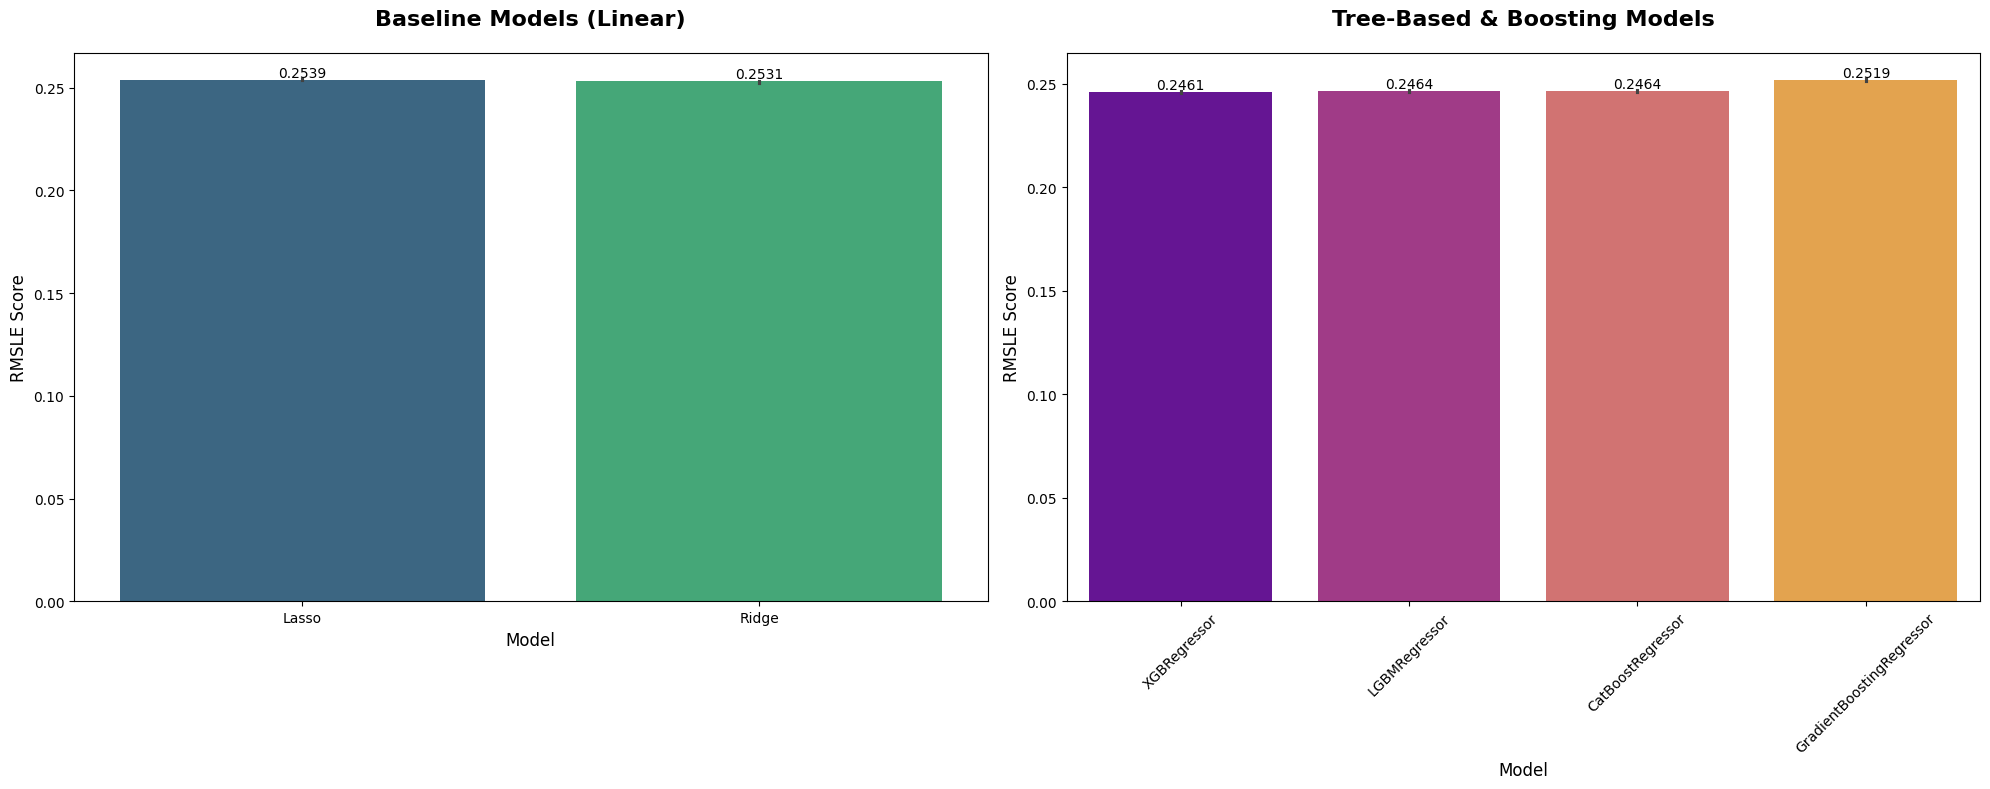

Mean  Standard Deviation
model_name                                             
XGBRegressor               0.246089            0.000604
LGBMRegressor              0.246432            0.000643
CatBoostRegressor          0.246439            0.000586
GradientBoostingRegressor  0.251867            0.000665
Ridge                      0.253088            0.000661
Lasso                      0.253918            0.000377

In [114]:
def generate_baseline_results(models=models, X=train_df_new_prepared, y=train_df_label_new,
                              metric=rmsle_scorer, cv=kfold, plot_result=False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, -score))  # negate the score here

    cv_df = pagedo.DataFrame(entries, columns=["model_name", "fold_id", "rmsle_score"])

    mean = cv_df.groupby("model_name")["rmsle_score"].mean()
    std = cv_df.groupby("model_name")["rmsle_score"].std()

    baseline_result = pagedo.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    baseline_result.sort_values(by="Mean", ascending=True, inplace=True)

    if plot_result:
        baseline_names = ["Ridge", "Lasso"]

        cv_df_baseline = cv_df[cv_df["model_name"].isin(baseline_names)]
        cv_df_others = cv_df[~cv_df["model_name"].isin(baseline_names)]

        fig, axes = plut.subplots(1, 2, figsize=(20, 8))

        if not cv_df_baseline.empty:
            seasalt.barplot(x="model_name", y="rmsle_score", data=cv_df_baseline, 
                            palette="viridis", ax=axes[0])
            axes[0].set_title("Baseline Models (Linear)", fontsize=16, weight="bold", pad=20)
            axes[0].set_xlabel("Model", fontsize=12)
            axes[0].set_ylabel("RMSLE Score", fontsize=12)
            
            for p in axes[0].patches:
                 axes[0].annotate(f"{p.get_height():.4f}", 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha='center', va='bottom', fontsize=10, color='black')
        else:
            axes[0].set_visible(False) 

        if not cv_df_others.empty:
            order = cv_df_others.groupby("model_name")["rmsle_score"].mean().sort_values().index
            
            seasalt.barplot(x="model_name", y="rmsle_score", data=cv_df_others, 
                            palette="plasma", ax=axes[1], order=order)
            axes[1].set_title("Tree-Based & Boosting Models", fontsize=16, weight="bold", pad=20)
            axes[1].set_xlabel("Model", fontsize=12)
            axes[1].set_ylabel("RMSLE Score", fontsize=12)
            axes[1].tick_params(axis='x', rotation=45)

            # Add value labels
            for p in axes[1].patches:
                 axes[1].annotate(f"{p.get_height():.4f}", 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha='center', va='bottom', fontsize=10, color='black')

        plut.tight_layout()
        plut.show()

    return baseline_result

generate_baseline_results(plot_result=True)

In [109]:
def shap_plot(model, X_test, list_feature):
  if hasattr(X_test, "toarray"):
    X_test = X_test.toarray()
  X_test_sample = pagedo.DataFrame(X_test, columns=list_feature)
  explainer = shap.Explainer(model.predict, X_test_sample)
  shap_values = explainer(X_test_sample)
  shap_importance = norepo.abs(shap_values.values).mean(axis=0)
  shap_df = pagedo.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
  shap_df = shap_df.sort_values("importance", ascending=False).head(30)
  plut.figure(figsize=(12, 6))
  seasalt.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="plasma", order=shap_df["feature"])
  plut.xlabel("MEAN - SHAP VALUE")
  plut.title("SHAP [ feat. importance ]", weight="bold", pad=20)
  plut.tight_layout()
  plut.show()


In [110]:
def shap_plot(model, X_test, list_feature):
  if hasattr(X_test, "toarray"):
    X_test = X_test.toarray()
  X_test_sample = pagedo.DataFrame(X_test, columns=list_feature)
  explainer = shap.Explainer(model.predict, X_test_sample)
  shap_values = explainer(X_test_sample)
  shap_importance = norepo.abs(shap_values.values).mean(ax=0)
  shap_df = pagedo.DataFrame({"feat": X_test_sample.columns, "importance": shap_importance})
  shap_df = shap_df.sort_values("importance", ascending=False).head(30)
  plut.figure(figsize=(12, 6))
  seasalt.barplot(x=shap_df["importance"], y=shap_df["feat"], palette="BuGn", order=shap_df["feat"])
  plut.xlabel("MEAN - SHAP VALUE")
  plut.title("SHAP [feat. importance]", weight="bold", pad=20)
  plut.tight_layout()
  plut.show()


## Model Development & Evaluation

In [111]:

def evaluate_model(model, X_train, X_val, y_train, y_val, pt_premium_amount=None, show_shap_plot = False):
    RESET = "\033[0m"
    BLUE = "\033[94m"
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    if pt_premium_amount is not None:
        y_real_v = pt_premium_amount.inverse_transform(y_val.values.reshape(-1, 1)).flatten()
        y_real_pred = pt_premium_amount.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    else:
        y_real_v = y_val
        y_real_pred = y_pred

    rmsle = safe_rmsle(y_real_v, y_real_pred)
    if rmsle < 0:
        rmsle = -rmsle

    show(f"Model : {model.__class__.__name__}{RESET}")
    show(f"Root Mean Squared Logarithmic Error (RMSLE) : {BLUE}{rmsle:.4f}{RESET}")
    show("^^" * 40)

    plut.figure(figsize=(7, 7))
    plut.scatter(y_real_v, y_real_pred, alpha=0.4, color=" green")
    plut.plot([y_real_v.min(), y_real_v.max()], [y_real_v.min(), y_real_v.max()], "r--", lw=2, label="Perfect Prediction (y=x)")
    plut.xlabel("Sale_price Actual values : ")
    plut.ylabel("Sale_price Predicted values : ")
    plut.title("Predicted vs. Actual Values : for validation set - ", weight="bold", pad=20)
    plut.legend()
    plut.grid(True, alpha=0.2)
    plut.tight_layout()
    plut.show()

    residuals = y_real_v - y_real_pred
    plut.figure(figsize=(7, 7))
    plut.scatter(y_real_v, residuals, alpha=0.5)
    plut.axhline(0, color="blue", linestyle="--", lw=2)
    plut.xlabel("Actual Values (SalePrice)")
    plut.ylabel("Prediction Error (Residuals)")
    plut.title("Residual Plot", weight="bold", pad=20)
    plut.tight_layout()
    plut.show()
    if show_shap_plot:
        shap_plot(model = model, X_test = X_val, list_feature = list_feature_prepared)

    return rmsle

In [112]:
X_val = s_tes_set.drop("PT_Premium_Amount", axis=1)
y_val = s_tes_set["PT_Premium_Amount"].copy()
X_val_prepared = preprocessor.transform(X_val)


Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.

Epoch 36: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-05.

Epoch 41: ReduceLROnPlateau reducing learning rate to 3.7500001781154424e-05.

Epoch 46: ReduceLROnPlateau reducing learning rate to 1.8750000890577212e-05.
Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 31.


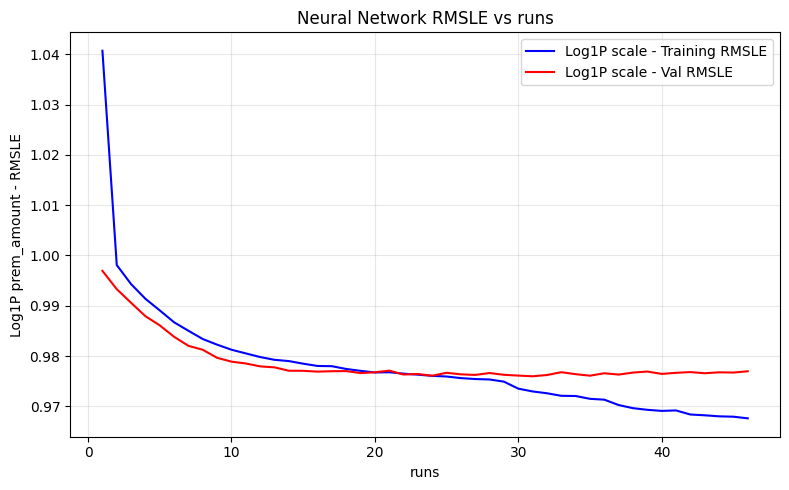

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 630us/step
Final-NeuralNet RMSLE in HOLD OUT (original Prem_Amount): 0.2478


In [113]:

from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as norepo
import matplotlib.pyplot as plut

X_train_full = train_df_new_prepared
if hasattr(X_train_full, "toarray"):
    X_train_full = X_train_full.toarray()
X_train_full = X_train_full.astype("float32")

X_val = X_val_prepared
if hasattr(X_val, "toarray"):
    X_val = X_val.toarray()
X_val = X_val.astype("float32")

pt_premium = pt_dict_train["Premium_Amount"]
y_train_pt = train_df_label_new.values.reshape(-1, 1).astype("float32")
y_train_log = y_train_pt
input_dim = X_train_full.shape[1]
nn_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(512, kernel_initializer="he_normal",
                 kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(256, kernel_initializer="he_normal",
                 kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.3),

    layers.Dense(128, kernel_initializer="he_normal",
                 kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.2),

    layers.Dense(1)  
])
nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss="mse"   
)
callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
]

history = nn_model.fit(
    X_train_full,
    y_train_log,
    validation_split=0.1,  
    epochs=50,
    batch_size=256,
    callbacks=callbacks,
    verbose=0
)

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss) + 1)
train_rmsle = norepo.sqrt(train_loss)
val_rmsle = norepo.sqrt(val_loss)
plut.figure(figsize=(8, 5))
plut.plot(epochs, train_rmsle, label="Log1P scale - Training RMSLE",color="blue")
plut.plot(epochs, val_rmsle, label="Log1P scale - Val RMSLE",color="red")
plut.xlabel("runs")
plut.ylabel("Log1P prem_amount - RMSLE")
plut.title("Neural Network RMSLE vs runs")
plut.legend() 
plut.grid(True, alpha=0.3)
plut.tight_layout()
plut.show()

y_val_pred_log = nn_model.predict(X_val).flatten()
y_val_pred_orig = norepo.expm1(y_val_pred_log)
rmsle_nn = safe_rmsle(y_val, y_val_pred_log)
show(f"Final-NeuralNet RMSLE in HOLD OUT (original Prem_Amount): {rmsle_nn:.4f}")